# 1 Imports and Dataset

In [ ]:
!pip install -Uqq ipdb

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import datetime as dt
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import seaborn
from typing import Tuple
import torch
import ipdb
import sklearn.tree as tree
from sklearn  import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


##1.2 Load Dataset

In [ ]:
df = pd.read_excel('movies.xlsx') #load datatset
df

Film  Year          Script Type  \
0                                300  2007           adaptation   
1                       3:10 to Yuma  2007               remake   
2                   30 Days of Night  2007           adaptation   
3                Across the Universe  2007  original screenplay   
4       Alien vs. Predator - Requiem  2007               sequel   
...                              ...   ...                  ...   
1397                       Wish Upon  2017  original screenplay   
1398                          Wonder  2017           adaptation   
1399                    Wonder Woman  2017           adaptation   
1400  xXx: The Return of Xander Cage  2017               sequel   
1401                      Your Name.  2017           adaptation   

     Rotten Tomatoes  critics Metacritic  critics Average critics   \
0                          60                  51               56   
1                          88                  76               82   
2                          50                  53               52   
3                          54                  56               55   
4                          14                  29               22   
...                       ...                 ...              ...   
1397                       17                  32               25   
1398                       85                  66               76   
1399                       92                  76               84   
1400                       45                  42               44   
1401                       97                  79               88   

      Rotten Tomatoes Audience  Metacritic Audience   \
0                          89.0                   71   
1                          86.0                   73   
2                          56.0                   65   
3                          82.0                   73   
4                          31.0                   45   
...                         ...                  ...   
1397                       32.0                   40   
1398                       91.0                   77   
1399                       89.0                   78   
1400                       38.0                   48   
1401                       94.0                   90   

     Rotten Tomatoes vs Metacritic  deviance Average audience   ...  \
0                                         18                80  ...   
1                                         13                80  ...   
2                                         -9                61  ...   
3                                          9                78  ...   
4                                        -14                38  ...   
...                                      ...               ...  ...   
1397                                      -8                36  ...   
1398                                      14                84  ...   
1399                                      11                84  ...   
1400                                     -10                43  ...   
1401                                       4                92  ...   

      of Gross earned abroad Budget ($million)  Budget recovered  \
0                     53.82%                65           701.64%   
1                     23.18%                50           139.56%   
2                     47.31%                32           234.67%   
3                     17.11%                45            65.26%   
4                     67.57%                40           322.21%   
...                      ...               ...               ...   
1397                   0.00%                12           119.18%   
1398                  22.16%                20           661.80%   
1399                  49.80%               149           551.52%   
1400                  87.03%                85           407.23%   
1401                  98.59%                 -                 -   

      Budget recovered opening weekend  Dis

In [ ]:
pd.set_option('display.max_columns',None) #see all the columns

# 2.Data Cleaning

### 2.0.See data type for each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Film                                     1402 non-null   object 
 1   Year                                     1402 non-null   int64  
 2   Script Type                              1402 non-null   object 
 3   Rotten Tomatoes  critics                 1401 non-null   object 
 4   Metacritic  critics                      1402 non-null   object 
 5   Average critics                          1402 non-null   object 
 6   Rotten Tomatoes Audience                 1401 non-null   float64
 7   Metacritic Audience                      1402 non-null   object 
 8   Rotten Tomatoes vs Metacritic  deviance  1402 non-null   object 
 9   Average audience                         1402 non-null   object 
 10  Audience vs Critics deviance             1402 no

In [ ]:
df.columns


Index(['Film', 'Year', 'Script Type', 'Rotten Tomatoes  critics',
       'Metacritic  critics', 'Average critics ', 'Rotten Tomatoes Audience ',
       'Metacritic Audience ', 'Rotten Tomatoes vs Metacritic  deviance',
       'Average audience ', 'Audience vs Critics deviance ', 'Primary Genre',
       'Genre', 'Opening Weekend', 'Opening weekend ($million)',
       'Domestic Gross', 'Domestic gross ($million)',
       'Foreign Gross ($million)', 'Foreign Gross', 'Worldwide Gross',
       'Worldwide Gross ($million)', ' of Gross earned abroad',
       'Budget ($million)', ' Budget recovered',
       ' Budget recovered opening weekend', 'Distributor', 'IMDb Rating',
       'IMDB vs RT disparity', 'Release Date (US)', 'Oscar Winners',
       'Oscar Detail'],
      dtype='object')

We observe teh features. We replace 2 spaces with 1 space and then the space with '_'. Then we apply lower() function in order to convert features to lower_case.

In [ ]:
#fixed type of columns
new_columns=[col.strip().replace('  ',' ').replace(' ','_').lower() for col in df.columns]
df.columns=new_columns

In [ ]:
df.columns #check if done


Index(['film', 'year', 'script_type', 'rotten_tomatoes_critics',
       'metacritic_critics', 'average_critics', 'rotten_tomatoes_audience',
       'metacritic_audience', 'rotten_tomatoes_vs_metacritic_deviance',
       'average_audience', 'audience_vs_critics_deviance', 'primary_genre',
       'genre', 'opening_weekend', 'opening_weekend_($million)',
       'domestic_gross', 'domestic_gross_($million)',
       'foreign_gross_($million)', 'foreign_gross', 'worldwide_gross',
       'worldwide_gross_($million)', 'of_gross_earned_abroad',
       'budget_($million)', 'budget_recovered',
       'budget_recovered_opening_weekend', 'distributor', 'imdb_rating',
       'imdb_vs_rt_disparity', 'release_date_(us)', 'oscar_winners',
       'oscar_detail'],
      dtype='object')

### 2.1.Remove columns

We see where do we have missing values per column.We see that``` 'Distributor','IMDb Rating', 'IMDB vs RT disparity' ```columns have all their values null so we drop them.```Primary Genre``` column has 1382/1402 lines with missing values containing not important information,so again we drop it. ``` 'Film' ```column gives the title of the moovie, which is not again an important information for the classification so we also drop it.

In [ ]:
df.isna().sum() #σsee per column how many missing values we have

film                                         0
year                                         0
script_type                                  0
rotten_tomatoes_critics                      1
metacritic_critics                           0
average_critics                              0
rotten_tomatoes_audience                     1
metacritic_audience                          0
rotten_tomatoes_vs_metacritic_deviance       0
average_audience                             0
audience_vs_critics_deviance                 0
primary_genre                             1383
genre                                        1
opening_weekend                              0
opening_weekend_($million)                   0
domestic_gross                               0
domestic_gross_($million)                    0
foreign_gross_($million)                     0
foreign_gross                                0
worldwide_gross                              0
worldwide_gross_($million)                   0
of_gross_earn

In [ ]:
df.drop(['film','primary_genre','distributor','imdb_rating','imdb_vs_rt_disparity'], axis=1, inplace=True) #drop columns

### 2.2.Handling missing values

In [ ]:
df.isnull().sum() #see where do we have null values /column

year                                         0
script_type                                  0
rotten_tomatoes_critics                      1
metacritic_critics                           0
average_critics                              0
rotten_tomatoes_audience                     1
metacritic_audience                          0
rotten_tomatoes_vs_metacritic_deviance       0
average_audience                             0
audience_vs_critics_deviance                 0
genre                                        1
opening_weekend                              0
opening_weekend_($million)                   0
domestic_gross                               0
domestic_gross_($million)                    0
foreign_gross_($million)                     0
foreign_gross                                0
worldwide_gross                              0
worldwide_gross_($million)                   0
of_gross_earned_abroad                       0
budget_($million)                            0
budget_recove

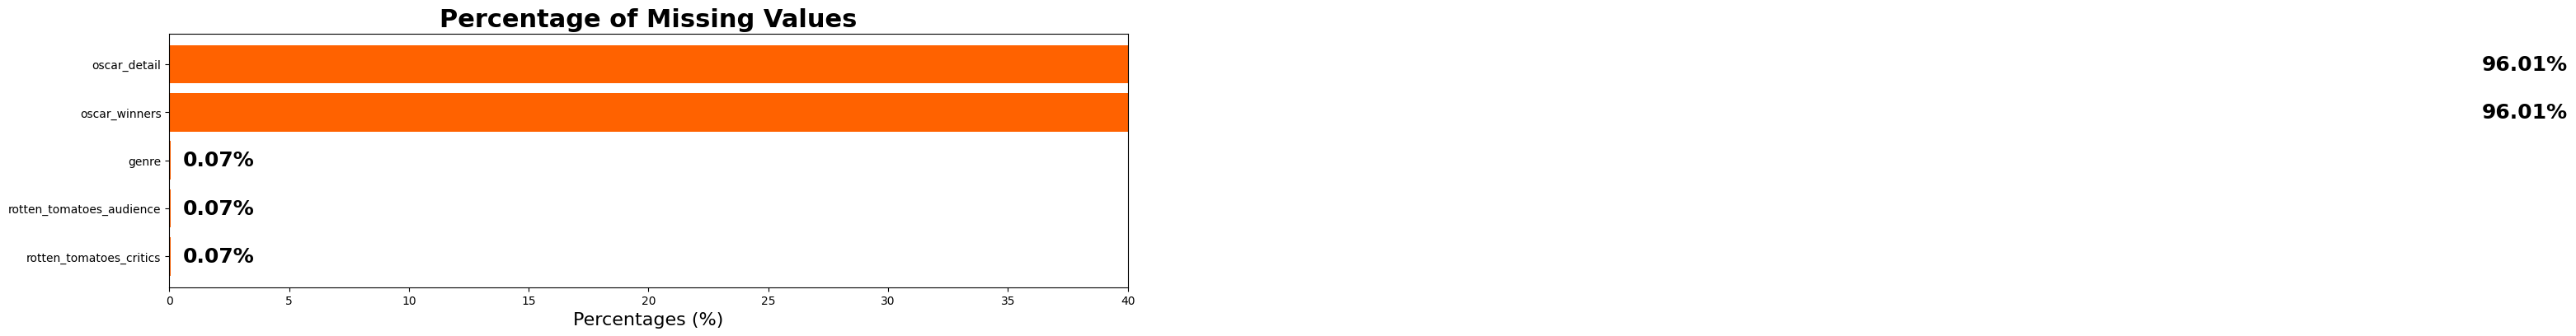

In [ ]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

We see that columns ``` 'rotten_tomatoes_critics,'rotten_tomatoes_audience','genre'``` have 1 mising value, so we drop this line from each column

In [ ]:
df[df['oscar_detail'].isnull() | df['oscar_winners'].isnull()].head() #see lines  with null values

year          script_type rotten_tomatoes_critics metacritic_critics  \
0  2007           adaptation                      60                 51   
1  2007               remake                      88                 76   
2  2007           adaptation                      50                 53   
3  2007  original screenplay                      54                 56   
4  2007               sequel                      14                 29   

  average_critics  rotten_tomatoes_audience metacritic_audience  \
0              56                      89.0                  71   
1              82                      86.0                  73   
2              52                      56.0                  65   
3              55                      82.0                  73   
4              22                      31.0                  45   

  rotten_tomatoes_vs_metacritic_deviance average_audience  \
0                                     18               80   
1                                     13               80   
2                                     -9               61   
3                                      9               78   
4                                    -14               38   

  audience_vs_critics_deviance           genre opening_weekend  \
0                          -25  period, action        70885301   
1                            3         western        14035033   
2                           -9          horror        15951902   
3                          -23         musical         3824988   
4                          -17  sci-fi, horror        10059425   

   opening_weekend_($million) domestic_gross  domestic_gross_($million)  \
0                       70.89      210614939                     210.61   
1                       14.04       53606916                      53.61   
2                       15.95       39568996                      39.57   
3                        3.82       24343673                      24.34   
4                       10.06       41797066                      41.80   

  foreign_gross_($million) foreign_gross worldwide_gross  \
0                   245.45     245453242       456068181   
1                    16.17      16173815        69780731   
2                    35.53      35526091        75095087   
3                     5.02       5023470        29367143   
4                    87.09      87086650       128883716   

   worldwide_gross_($million) of_gross_earned_abroad budget_($million)  \
0                       456.0                 53.82%                65   
1                        70.0                 23.18%                50   
2                        75.0                 47.31%                32   
3                        29.0                 17.11%                45   
4                       129.0                 67.57%                40   

  budget_recovered budget_recovered_opening_weekend release_date_(us)  \
0          701.64%                          109.05%       Mar 9, 2007   
1          139.56%                           28.07%       Sep 7, 2007   
2          234.67%                           49.85%      Oct 19, 2007   
3           65.26%                            8.50%      Oct 12, 2007   
4          322.21%                           25.15%      Dec 25, 2007   

  oscar_winners oscar_detail  
0           NaN          NaN  
1           NaN          NaN  
2           NaN          NaN  
3           NaN          NaN  
4           NaN          NaN

In [ ]:
df = df.dropna(subset=['rotten_tomatoes_critics','rotten_tomatoes_audience','genre'])
df=df.reset_index(drop=True)

In [ ]:
df.isna().sum() #check if done

year                                         0
script_type                                  0
rotten_tomatoes_critics                      0
metacritic_critics                           0
average_critics                              0
rotten_tomatoes_audience                     0
metacritic_audience                          0
rotten_tomatoes_vs_metacritic_deviance       0
average_audience                             0
audience_vs_critics_deviance                 0
genre                                        0
opening_weekend                              0
opening_weekend_($million)                   0
domestic_gross                               0
domestic_gross_($million)                    0
foreign_gross_($million)                     0
foreign_gross                                0
worldwide_gross                              0
worldwide_gross_($million)                   0
of_gross_earned_abroad                       0
budget_($million)                            0
budget_recove

### 2.3.Handling duplicates

In [ ]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [year, script_type, rotten_tomatoes_critics, metacritic_critics, average_critics, rotten_tomatoes_audience, metacritic_audience, rotten_tomatoes_vs_metacritic_deviance, average_audience, audience_vs_critics_deviance, genre, opening_weekend, opening_weekend_($million), domestic_gross, domestic_gross_($million), foreign_gross_($million), foreign_gross, worldwide_gross, worldwide_gross_($million), of_gross_earned_abroad, budget_($million), budget_recovered, budget_recovered_opening_weekend, release_date_(us), oscar_winners, oscar_detail]
Index: []


### 2.4.Handling with special characters like '-'

In the beggininhg we try to replace NA values of the columns ```'rotten_tomatoes_critics',rotten_tomatoes_audience'``` with the mean. We see that is not possible because in the data we have cells with '-' character.


In [ ]:
df.head(20) #see the type of our cells fro the first 20 lines


year            script_type rotten_tomatoes_critics metacritic_critics  \
0   2007             adaptation                      60                 51   
1   2007                 remake                      88                 76   
2   2007             adaptation                      50                 53   
3   2007    original screenplay                      54                 56   
4   2007                 sequel                      14                 29   
5   2007             adaptation                      26                 39   
6   2007  based on a true story                      80                 76   
7   2007    original screenplay                      52                 54   
8   2007    original screenplay                      71                 59   
9   2007    original screenplay                      69                 64   
10  2007  based on a true story                      82                 69   
11  2007                 sequel                       1                 13   
12  2007             adaptation                      67                 62   
13  2007    original screenplay                      27                 33   
14  2007    original screenplay                      93                 75   
15  2007    original screenplay                       2                 17   
16  2007                 sequel                      23                 37   
17  2007                 sequel                      35                 45   
18  2007             adaptation                      28                 35   
19  2007    original screenplay                       3                 19   

   average_critics  rotten_tomatoes_audience metacritic_audience  \
0               56                      89.0                  71   
1               82                      86.0                  73   
2               52                      56.0                  65   
3               55                      82.0                  73   
4               22                      31.0                  45   
5               33                      65.0                  55   
6               78                      87.0                  75   
7               53                      53.0                  64   
8               65                      50.0                  63   
9               67                      68.0                  70   
10              76                      73.0                  69   
11               7                      38.0                  19   
12              65                      77.0                  81   
13              30                      19.0                  29   
14              84                      80.0                  83   
15              10                      29.0                  21   
16              30                      52.0                  47   
17              40                      51.0                  64   
18              32                      48.0                  38   
19              11                      57.0                  41   

   rotten_tomatoes_vs_metacritic_deviance average_audience  \
0                                      18               80   
1                                      13               80   
2                                      -9               61   
3                                       9               78   
4                                     -14               38   
5                                      10               60   
6                                      12               81   
7                                     -11               59   
8                                     -13               57   
9                                      -2               69   
10                                      4               71   
11                                     19               29   
12                                     -4               79   
13                                    -10               24   
14    

Search where is the '-' character

In [ ]:
df.tail(50)

year                        script_type rotten_tomatoes_critics  \
1350  2017                         adaptation                      78   
1351  2017                original screenplay                      52   
1352  2017              based on a true story                      98   
1353  2017                original screenplay                      21   
1354  2017                         adaptation                      51   
1355  2017                         adaptation                      23   
1356  2017  adaptation, based on a true story                      55   
1357  2017                         adaptation                      16   
1358  2017                         adaptation                      16   
1359  2017  adaptation, based on a true story                      93   
1360  2017                original screenplay                       9   
1361  2017                             sequel                      67   
1362  2017                original screenplay                      95   
1363  2017                         adaptation                      61   
1364  2017              based on a true story                      83   
1365  2017  adaptation, based on a true story                      49   
1366  2017                original screenplay                      35   
1367  2017                original screenplay                      77   
1368  2017                original screenplay                      40   
1369  2017                original screenplay                      17   
1370  2017                             sequel                      91   
1371  2017                             sequel                      54   
1372  2017  adaptation, based on a true story                      87   
1373  2017  adaptation, based on a true story                      80   
1374  2017                         adaptation                      41   
1375  2017                             remake                      16   
1376  2017                             sequel                       9   
1377  2017                original screenplay                      49   
1378  2017                         adaptation                      20   
1379  2017                         adaptation                       8   
1380  2017                original screenplay                      16   
1381  2017                original screenplay                      43   
1382  2017                         adaptation                      61   
1383  2017                         adaptation                      89   
1384  2017                         adaptation                      92   
1385  2017                original screenplay                      93   
1386  2017                original screenplay                       -   
1387  2017                 sequel, adaptation                      15   
1388  2017                             sequel                       6   
1389  2017                             sequel                      20   
1390  2017                original screenplay                      25   
1391  2017                         adaptation                      49   
1392  2017              based on a true story                      65   
1393  2017                             sequel                      93   
1394  2017              based on a true story                      87   
1395  2017                original screenplay                      17   
1396  2017                         adaptation                      85   
1397  2017                         adaptation                      92   
1398  2017                             sequel                      45   
1399  2017                         adaptation                      97   

     metacritic_critics average_critics  rotten_tomatoes_audience  \
1350                 77              78                      48.0   
1351                 44              48                      40.0   
1352                 86              92                      89.0   
1353  

In [ ]:
def replace_str_with_nan(x): #function to handle '-' character
    if not np.isreal(x): #check if x is not a real value
        if x == '-': #check if is character '-'
            return np.nan #replace with nan
    return x #else return the value

In [ ]:
df.isna().sum() #check again for missisng values

year                                         0
script_type                                  0
rotten_tomatoes_critics                      0
metacritic_critics                           0
average_critics                              0
rotten_tomatoes_audience                     0
metacritic_audience                          0
rotten_tomatoes_vs_metacritic_deviance       0
average_audience                             0
audience_vs_critics_deviance                 0
genre                                        0
opening_weekend                              0
opening_weekend_($million)                   0
domestic_gross                               0
domestic_gross_($million)                    0
foreign_gross_($million)                     0
foreign_gross                                0
worldwide_gross                              0
worldwide_gross_($million)                   0
of_gross_earned_abroad                       0
budget_($million)                            0
budget_recove

In [ ]:
for col in df.columns:
    df[col]=df[col].map(replace_str_with_nan) #apply teh function to every column of the daataframe

In [ ]:
df[~df['rotten_tomatoes_critics'].apply(np.isreal) |~df['metacritic_critics'].apply(np.isreal) ] #check if done

Empty DataFrame
Columns: [year, script_type, rotten_tomatoes_critics, metacritic_critics, average_critics, rotten_tomatoes_audience, metacritic_audience, rotten_tomatoes_vs_metacritic_deviance, average_audience, audience_vs_critics_deviance, genre, opening_weekend, opening_weekend_($million), domestic_gross, domestic_gross_($million), foreign_gross_($million), foreign_gross, worldwide_gross, worldwide_gross_($million), of_gross_earned_abroad, budget_($million), budget_recovered, budget_recovered_opening_weekend, release_date_(us), oscar_winners, oscar_detail]
Index: []

In [ ]:
df.isnull().sum() #check again for na values.Here we want to have na values because we substitute '-' with na values


year                                         0
script_type                                  0
rotten_tomatoes_critics                      1
metacritic_critics                           3
average_critics                              3
rotten_tomatoes_audience                     0
metacritic_audience                          2
rotten_tomatoes_vs_metacritic_deviance       2
average_audience                             2
audience_vs_critics_deviance                 4
genre                                        0
opening_weekend                              0
opening_weekend_($million)                   0
domestic_gross                               0
domestic_gross_($million)                    0
foreign_gross_($million)                     0
foreign_gross                                0
worldwide_gross                              0
worldwide_gross_($million)                   0
of_gross_earned_abroad                       0
budget_($million)                            6
budget_recove

In [ ]:
df[~df['rotten_tomatoes_critics'].apply(lambda x: isinstance(x, (int, float)))] #check if done

Empty DataFrame
Columns: [year, script_type, rotten_tomatoes_critics, metacritic_critics, average_critics, rotten_tomatoes_audience, metacritic_audience, rotten_tomatoes_vs_metacritic_deviance, average_audience, audience_vs_critics_deviance, genre, opening_weekend, opening_weekend_($million), domestic_gross, domestic_gross_($million), foreign_gross_($million), foreign_gross, worldwide_gross, worldwide_gross_($million), of_gross_earned_abroad, budget_($million), budget_recovered, budget_recovered_opening_weekend, release_date_(us), oscar_winners, oscar_detail]
Index: []

We have to transform columns (if needed) from object to int or float.

In [ ]:
#replace dtypes of columns where is needed
columns_to_convert=[
    'rotten_tomatoes_critics',
    'metacritic_critics',
    'average_critics',
    'metacritic_audience',
    'rotten_tomatoes_vs_metacritic_deviance',
    'average_audience',
    'audience_vs_critics_deviance'
]


In [ ]:
df[columns_to_convert]=df[columns_to_convert].astype(float) #convert to float

In [ ]:
df.dtypes #see dtypes of columns

year                                        int64
script_type                                object
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                  float64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
genre                                      object
opening_weekend                            object
opening_weekend_($million)                float64
domestic_gross                             object
domestic_gross_($million)                 float64
foreign_gross_($million)                   object
foreign_gross                              object
worldwide_gross                            object
worldwide_gross_($million)                float64
of_gross_earned_abroad                     object


Replace NA values in those columns with the mean of every column

In [ ]:
for col in columns_to_convert:
  mean_col=df[col].mean() #find mean for every column
  df[col].fillna(mean_col, inplace=True) #fill na with mean

In [ ]:
df.isna().sum() #check now if we have na values (we should not)

year                                         0
script_type                                  0
rotten_tomatoes_critics                      0
metacritic_critics                           0
average_critics                              0
rotten_tomatoes_audience                     0
metacritic_audience                          0
rotten_tomatoes_vs_metacritic_deviance       0
average_audience                             0
audience_vs_critics_deviance                 0
genre                                        0
opening_weekend                              0
opening_weekend_($million)                   0
domestic_gross                               0
domestic_gross_($million)                    0
foreign_gross_($million)                     0
foreign_gross                                0
worldwide_gross                              0
worldwide_gross_($million)                   0
of_gross_earned_abroad                       0
budget_($million)                            6
budget_recove

In [ ]:
df.tail(30) #check if done

year                        script_type  rotten_tomatoes_critics  \
1370  2017                             sequel                91.000000   
1371  2017                             sequel                54.000000   
1372  2017  adaptation, based on a true story                87.000000   
1373  2017  adaptation, based on a true story                80.000000   
1374  2017                         adaptation                41.000000   
1375  2017                             remake                16.000000   
1376  2017                             sequel                 9.000000   
1377  2017                original screenplay                49.000000   
1378  2017                         adaptation                20.000000   
1379  2017                         adaptation                 8.000000   
1380  2017                original screenplay                16.000000   
1381  2017                original screenplay                43.000000   
1382  2017                         adaptation                61.000000   
1383  2017                         adaptation                89.000000   
1384  2017                         adaptation                92.000000   
1385  2017                original screenplay                93.000000   
1386  2017                original screenplay                53.288063   
1387  2017                 sequel, adaptation                15.000000   
1388  2017                             sequel                 6.000000   
1389  2017                             sequel                20.000000   
1390  2017                original screenplay                25.000000   
1391  2017                         adaptation                49.000000   
1392  2017              based on a true story                65.000000   
1393  2017                             sequel                93.000000   
1394  2017              based on a true story                87.000000   
1395  2017                original screenplay                17.000000   
1396  2017                         adaptation                85.000000   
1397  2017                         adaptation                92.000000   
1398  2017                             sequel                45.000000   
1399  2017                         adaptation                97.000000   

      metacritic_critics  average_critics  rotten_tomatoes_audience  \
1370           75.000000        83.000000                      80.0   
1371           55.000000        55.000000                      49.0   
1372           78.000000        83.000000                      57.0   
1373           60.000000        70.000000                      84.0   
1374           48.000000        45.000000                      51.0   
1375           34.000000        25.000000                      36.0   
1376           36.000000        23.000000                      44.0   
1377           49.000000        49.000000                      92.0   
1378           32.000000        26.000000                      78.0   
1379           23.000000        16.000000                      21.0   
1380           33.000000        25.000000                      55.0   
1381           42.000000        43.000000                      75.0   
1382           57.000000        59.000000                      77.0   
1383           76.000000        83.000000                      72.0   
1384           73.000000        83.000000                      88.0   
1385           87.000000        90.000000                      87.0   
1386           53.726557        53.713672                      64.0   
1387           28.000000        22.000000                      45.0   
1388           17.000000        12.000000                      42.0   
1389           23.000000        22.000000                      50.0   
1390           45.000000        35.000000                      34.0   
1391           51.000000        50.000000                      55.0   
1392           57.000000        61.000000                      71.0   
1393   

In [ ]:
df.shape #check shape of dataframe

(1400, 26)

###2.5 Handling with columns that has data with symbol %

In [ ]:
#make regex to extract ('%') of every column that has this symbol in it's values and keep only the real number without the symbol
df['of_gross_earned_abroad']=df['of_gross_earned_abroad'].str.extract(r'(\d+\.\d+)')
df['budget_recovered_opening_weekend']=df['budget_recovered_opening_weekend'].str.extract(r'(\d+\.\d+)')
df['budget_recovered']=df['budget_recovered_opening_weekend'].str.extract(r'(\d+\.\d+)')

In [ ]:
df.head(3) #check if done

year script_type  rotten_tomatoes_critics  metacritic_critics  \
0  2007  adaptation                     60.0                51.0   
1  2007      remake                     88.0                76.0   
2  2007  adaptation                     50.0                53.0   

   average_critics  rotten_tomatoes_audience  metacritic_audience  \
0             56.0                      89.0                 71.0   
1             82.0                      86.0                 73.0   
2             52.0                      56.0                 65.0   

   rotten_tomatoes_vs_metacritic_deviance  average_audience  \
0                                    18.0              80.0   
1                                    13.0              80.0   
2                                    -9.0              61.0   

   audience_vs_critics_deviance           genre opening_weekend  \
0                         -25.0  period, action        70885301   
1                           3.0         western        14035033   
2                          -9.0          horror        15951902   

   opening_weekend_($million) domestic_gross  domestic_gross_($million)  \
0                       70.89      210614939                     210.61   
1                       14.04       53606916                      53.61   
2                       15.95       39568996                      39.57   

  foreign_gross_($million) foreign_gross worldwide_gross  \
0                   245.45     245453242       456068181   
1                    16.17      16173815        69780731   
2                    35.53      35526091        75095087   

   worldwide_gross_($million) of_gross_earned_abroad budget_($million)  \
0                       456.0                  53.82                65   
1                        70.0                  23.18                50   
2                        75.0                  47.31                32   

  budget_recovered budget_recovered_opening_weekend release_date_(us)  \
0           109.05                           109.05       Mar 9, 2007   
1            28.07                            28.07       Sep 7, 2007   
2            49.85                            49.85      Oct 19, 2007   

  oscar_winners oscar_detail  
0           NaN          NaN  
1           NaN          NaN  
2           NaN          NaN

Convert the concrete columns to float

In [ ]:
#defien columsn  to convert
columns_to_convert=['of_gross_earned_abroad',
         'budget_recovered_opening_weekend',
         'budget_recovered']

In [ ]:
df[columns_to_convert] = df[columns_to_convert].astype(float)

In [ ]:
#check type of every column
df.dtypes

year                                        int64
script_type                                object
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                  float64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
genre                                      object
opening_weekend                            object
opening_weekend_($million)                float64
domestic_gross                             object
domestic_gross_($million)                 float64
foreign_gross_($million)                   object
foreign_gross                              object
worldwide_gross                            object
worldwide_gross_($million)                float64
of_gross_earned_abroad                    float64


In [ ]:
df.tail(30) #check if the conversion to float  done

year                        script_type  rotten_tomatoes_critics  \
1370  2017                             sequel                91.000000   
1371  2017                             sequel                54.000000   
1372  2017  adaptation, based on a true story                87.000000   
1373  2017  adaptation, based on a true story                80.000000   
1374  2017                         adaptation                41.000000   
1375  2017                             remake                16.000000   
1376  2017                             sequel                 9.000000   
1377  2017                original screenplay                49.000000   
1378  2017                         adaptation                20.000000   
1379  2017                         adaptation                 8.000000   
1380  2017                original screenplay                16.000000   
1381  2017                original screenplay                43.000000   
1382  2017                         adaptation                61.000000   
1383  2017                         adaptation                89.000000   
1384  2017                         adaptation                92.000000   
1385  2017                original screenplay                93.000000   
1386  2017                original screenplay                53.288063   
1387  2017                 sequel, adaptation                15.000000   
1388  2017                             sequel                 6.000000   
1389  2017                             sequel                20.000000   
1390  2017                original screenplay                25.000000   
1391  2017                         adaptation                49.000000   
1392  2017              based on a true story                65.000000   
1393  2017                             sequel                93.000000   
1394  2017              based on a true story                87.000000   
1395  2017                original screenplay                17.000000   
1396  2017                         adaptation                85.000000   
1397  2017                         adaptation                92.000000   
1398  2017                             sequel                45.000000   
1399  2017                         adaptation                97.000000   

      metacritic_critics  average_critics  rotten_tomatoes_audience  \
1370           75.000000        83.000000                      80.0   
1371           55.000000        55.000000                      49.0   
1372           78.000000        83.000000                      57.0   
1373           60.000000        70.000000                      84.0   
1374           48.000000        45.000000                      51.0   
1375           34.000000        25.000000                      36.0   
1376           36.000000        23.000000                      44.0   
1377           49.000000        49.000000                      92.0   
1378           32.000000        26.000000                      78.0   
1379           23.000000        16.000000                      21.0   
1380           33.000000        25.000000                      55.0   
1381           42.000000        43.000000                      75.0   
1382           57.000000        59.000000                      77.0   
1383           76.000000        83.000000                      72.0   
1384           73.000000        83.000000                      88.0   
1385           87.000000        90.000000                      87.0   
1386           53.726557        53.713672                      64.0   
1387           28.000000        22.000000                      45.0   
1388           17.000000        12.000000                      42.0   
1389           23.000000        22.000000                      50.0   
1390           45.000000        35.000000                      34.0   
1391           51.000000        50.000000                      55.0   
1392           57.000000        61.000000                      71.0   
1393   

##2.6 Handling with columns opening_weekend,domestic_gross,foreign_gross,worldwide_gross,budget_($million)

We observe that the columns with ($ million) are simply a rounding of the corresponding columns, so we drop them.

In [ ]:
df.drop(['opening_weekend_($million)','domestic_gross_($million)','foreign_gross_($million)','worldwide_gross_($million)'],axis=1,inplace=True)

In [ ]:
df.columns #check if done

Index(['year', 'script_type', 'rotten_tomatoes_critics', 'metacritic_critics',
       'average_critics', 'rotten_tomatoes_audience', 'metacritic_audience',
       'rotten_tomatoes_vs_metacritic_deviance', 'average_audience',
       'audience_vs_critics_deviance', 'genre', 'opening_weekend',
       'domestic_gross', 'foreign_gross', 'worldwide_gross',
       'of_gross_earned_abroad', 'budget_($million)', 'budget_recovered',
       'budget_recovered_opening_weekend', 'release_date_(us)',
       'oscar_winners', 'oscar_detail'],
      dtype='object')

We check if the columns we kept have  symbols that prevent the conversion from object to float.

In [ ]:
df[~df['opening_weekend'].map(np.isreal)]

year          script_type  rotten_tomatoes_critics  metacritic_critics  \
1115  2016  original screenplay                     82.0                76.0   

      average_critics  rotten_tomatoes_audience  metacritic_audience  \
1115             79.0                      84.0                 80.0   

      rotten_tomatoes_vs_metacritic_deviance  average_audience  \
1115                                     4.0              82.0   

      audience_vs_critics_deviance      genre opening_weekend domestic_gross  \
1115                          -3.0  Adventure      39,826,840      183637894   

     foreign_gross worldwide_gross  of_gross_earned_abroad budget_($million)  \
1115     349312609       532950503                   65.54               135   

      budget_recovered  budget_recovered_opening_weekend release_date_(us)  \
1115              29.5                              29.5       Jan 8, 2016   

     oscar_winners                                       oscar_detail  
1115  Oscar Winner  Actor in a Leading Role, Cinematography, Direc...

In [ ]:
df[~df['domestic_gross'].map(np.isreal)]

year          script_type  rotten_tomatoes_critics  metacritic_critics  \
1016  2015  original screenplay                     29.0                34.0   

      average_critics  rotten_tomatoes_audience  metacritic_audience  \
1016             32.0                      48.0                 38.0   

      rotten_tomatoes_vs_metacritic_deviance  average_audience  \
1016                                    10.0              43.0   

      audience_vs_critics_deviance   genre opening_weekend domestic_gross  \
1016                         -12.0  comedy        33803253     90,411,453   

     foreign_gross worldwide_gross  of_gross_earned_abroad budget_($million)  \
1016    21,300,000       111711453                   19.07                40   

      budget_recovered  budget_recovered_opening_weekend release_date_(us)  \
1016             84.51                             84.51      Mar 27, 2015   

     oscar_winners oscar_detail  
1016           NaN          NaN

In [ ]:
df[~df['foreign_gross'].map(np.isreal)]

year          script_type  rotten_tomatoes_critics  metacritic_critics  \
647   2012  original screenplay                     78.0                69.0   
665   2012               sequel                     79.0                60.0   
750   2012  original screenplay                     19.0                32.0   
822   2013  original screenplay                     19.0                35.0   
1016  2015  original screenplay                     29.0                34.0   
1148  2016  original screenplay                     75.0                56.0   

      average_critics  rotten_tomatoes_audience  metacritic_audience  \
647              74.0                      76.0                 72.0   
665              70.0                      73.0                 66.0   
750              26.0                      29.0                 47.0   
822              27.0                      54.0                 49.0   
1016             32.0                      48.0                 38.0   
1148             65.5                      73.0                 73.0   

      rotten_tomatoes_vs_metacritic_deviance  average_audience  \
647                                      4.0              74.0   
665                                      7.0              70.0   
750                                    -18.0              38.0   
822                                      5.0              52.0   
1016                                    10.0              43.0   
1148                                    73.0              73.0   

      audience_vs_critics_deviance                         genre  \
647                           -1.0  animation, action, adventure   
665                            0.0  animation, adventure, comedy   
750                          -13.0              horror, thriller   
822                          -25.0                 Comedy, Crime   
1016                         -12.0                        comedy   
1148                          -8.0                     Adventure   

     opening_weekend domestic_gross foreign_gross worldwide_gross  \
647         66323594      237283207   301,700,000       538983207   
665         60316738      216391482   530,529,792       746921274   
750          7955307       18119640    19,038,008        37157648   
822         34551025      134506920         39.46     173,965,010   
1016        33803253     90,411,453    21,300,000       111711453   
1148        46581142      151287892  185465084.00       151288077   

      of_gross_earned_abroad budget_($million)  budget_recovered  \
647                    55.98               185             35.85   
665                    71.03               145             41.60   
750                    51.24                 1            795.53   
822                     0.00                35             98.72   
1016                   19.07                40             84.51   
1148                    0.00               125             37.26   

      budget_recovered_opening_weekend release_date_(us) oscar_winners  \
647                              35.85      Jun 22, 2012  Oscar winner   
665                              41.60       Jun 8, 2012           NaN   
750                             795.53      May 25, 2012           NaN   
822                              98.72       Feb 8, 2013           NaN   
1016                             84.51      Mar 27, 2015           NaN   
1148                             37.26       Nov 4, 2016           NaN   

               oscar_detail  
647   Best Animated Feature  
665                     NaN  
750                     NaN  
822                     NaN  
1016                    NaN  
1148                    NaN

In [ ]:
df[~df['budget_($million)'].map(np.isreal)]

year            script_type  rotten_tomatoes_critics  \
105   2008             adaptation                     67.0   
109   2008             adaptation                     79.0   
112   2008             adaptation                     16.0   
113   2008                 sequel                     87.0   
122   2008    original screenplay                     11.0   
...    ...                    ...                      ...   
1341  2017    original screenplay                     73.0   
1355  2017             adaptation                     23.0   
1367  2017    original screenplay                     77.0   
1391  2017             adaptation                     49.0   
1392  2017  based on a true story                     65.0   

      metacritic_critics  average_critics  rotten_tomatoes_audience  \
105                 61.0             64.0                      75.0   
109                 62.0             71.0                      67.0   
112                 35.0             26.0                      50.0   
113                 78.0             83.0                      70.0   
122                 29.0             20.0                      53.0   
...                  ...              ...                       ...   
1341                62.0             68.0                      53.0   
1355                37.0             30.0                      23.0   
1367                61.0             69.0                      60.0   
1391                51.0             50.0                      55.0   
1392                57.0             61.0                      71.0   

      metacritic_audience  rotten_tomatoes_vs_metacritic_deviance  \
105                  75.0                                     0.0   
109                  66.0                                     1.0   
112                  52.0                                    -2.0   
113                  73.0                                    -3.0   
122                  44.0                                     9.0   
...                   ...                                     ...   
1341                 44.0                                     9.0   
1355                 33.0                                   -10.0   
1367                 69.0                                    -9.0   
1391                 65.0                                   -10.0   
1392                 54.0                                    17.0   

      average_audience  audience_vs_critics_deviance  \
105               75.0                         -11.0   
109               67.0                           4.0   
112               51.0                         -26.0   
113               72.0                          11.0   
122               49.0                         -29.0   
...                ...                           ...   
1341              49.0                          19.0   
1355              28.0                           2.0   
1367              65.0                           5.0   
1391              60.0                         -10.0   
1392              63.0                          -2.0   

                           genre opening_weekend domestic_gross foreign_gross  \
105     action, sci-fi, thriller        55140000      134810000     128620000   
109   adventure, family, fantasy        19000000       71200000      91640000   
112    action, adventure, sci-fi        27400000       80170000     142060000   
113   action, adventure, fantasy        34500000       75990000      84400000   
122   adventure, comedy, romance        21600000       70230000      41000000   
...                          ...             ...            ...           ...   
1341              sci-fi, action         1701785        3930990             0   
1355            horror, thriller        13501349       22395806       4271391   
1367               comedy, drama           45317        4077333             0   
1391                      sci-fi        17007624       40479370     184684740   
1392           

In [ ]:
df[~df['worldwide_gross'].map(np.isreal)]

year            script_type  rotten_tomatoes_critics  metacritic_critics  \
373  2010                 sequel                     99.0                92.0   
374  2010  based on a true story                     95.0                88.0   
375  2010    original screenplay                     88.0                79.0   
376  2010             adaptation                     89.0                71.0   
377  2010             adaptation                     52.0                53.0   
..    ...                    ...                      ...                 ...   
860  2013    original screenplay                     38.0                41.0   
861  2013             adaptation                     93.0                82.0   
862  2013    original screenplay                     10.0                20.0   
863  2013    original screenplay                     63.0                53.0   
864  2013  based on a true story                     76.0                65.0   

     average_critics  rotten_tomatoes_audience  metacritic_audience  \
373             96.0                      91.0                 91.0   
374             92.0                      93.0                 83.0   
375             84.0                      86.0                 80.0   
376             80.0                      88.0                 82.0   
377             53.0                      72.0                 55.0   
..               ...                       ...                  ...   
860             40.0                      36.0                 52.0   
861             88.0                      76.0                 81.0   
862             15.0                      51.0                 51.0   
863             58.0                      72.0                 63.0   
864             71.0                      60.0                 67.0   

     rotten_tomatoes_vs_metacritic_deviance  average_audience  \
373                                     0.0              91.0   
374                                    10.0              88.0   
375                                     6.0              83.0   
376                                     6.0              85.0   
377                                    17.0              64.0   
..                                      ...               ...   
860                                   -16.0              44.0   
861                                    -5.0              79.0   
862                                     0.0              51.0   
863                                     9.0              68.0   
864                                    -7.0              64.0   

     audience_vs_critics_deviance                                genre  \
373                           5.0         animation, adventure, comedy   
374                           4.0                   biography, history   
375                           1.0                    mystery, thriller   
376                          -5.0            animation, comedy, family   
377                         -11.0           adventure, family, fantasy   
..                            ...                                  ...   
860                          -5.0             Sci-Fi, Thriller, Horror   
861                           9.0               Drama, Comedy, Romance   
862                         -36.0                       Horror, Comedy   
863                         -10.0                  Comedy, Documentary   
864                           7.0  Biography, Drama, Thriller, Romance   

    opening_weekend domestic_gross foreign_gross worldwide_gross  \
373       110300000      415000000     648160000   1,063,160,000   
374         4400000      138790000     275410000     414,200,000   
375         8380000      106950000     222440000     329,390,000   
376        48770000      200820000     390970000     591,790,000   
377       116100000      334190000     691280000   1,025,470,000   
..              ...            ...           ...             ...   
860        34058360       6447311

We see that we have numbers with commas. So we replace commas with ''

In [ ]:
def replace_comma(x): #define function
  if np.isreal(x): #if the value is number
    return x #return x
  return x.replace(',','') #else replace ',' with nothing

In [ ]:
df['opening_weekend']=df['opening_weekend'].map(replace_comma)
df['domestic_gross']=df['domestic_gross'].map(replace_comma)
df['foreign_gross']=df['foreign_gross'].map(replace_comma)
df['worldwide_gross']=df['worldwide_gross'].map(replace_comma)


In [ ]:
df[~df['opening_weekend'].map(np.isreal)] #check if done

year          script_type  rotten_tomatoes_critics  metacritic_critics  \
1115  2016  original screenplay                     82.0                76.0   

      average_critics  rotten_tomatoes_audience  metacritic_audience  \
1115             79.0                      84.0                 80.0   

      rotten_tomatoes_vs_metacritic_deviance  average_audience  \
1115                                     4.0              82.0   

      audience_vs_critics_deviance      genre opening_weekend domestic_gross  \
1115                          -3.0  Adventure        39826840      183637894   

     foreign_gross worldwide_gross  of_gross_earned_abroad budget_($million)  \
1115     349312609       532950503                   65.54               135   

      budget_recovered  budget_recovered_opening_weekend release_date_(us)  \
1115              29.5                              29.5       Jan 8, 2016   

     oscar_winners                                       oscar_detail  
1115  Oscar Winner  Actor in a Leading Role, Cinematography, Direc...

Convert columns

In [ ]:
columns_to_convert=['opening_weekend',
                    'domestic_gross',
                    'foreign_gross',
                    'worldwide_gross',
                    'budget_($million)']

In [ ]:
df[columns_to_convert] = df[columns_to_convert].astype(float)

In [ ]:
df.dtypes #check if done

year                                        int64
script_type                                object
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                  float64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
genre                                      object
opening_weekend                           float64
domestic_gross                            float64
foreign_gross                             float64
worldwide_gross                           float64
of_gross_earned_abroad                    float64
budget_($million)                         float64
budget_recovered                          float64
budget_recovered_opening_weekend          float64
release_date_(us)                          object


## 2.7 Handling with column release_date_(us)

We observe that the format for date is not the same. We have values like
Nov 2,2007 and  November 16,2007

In [ ]:
df['release_date_(us)'].head(10)

0          Mar 9, 2007
1          Sep 7, 2007
2         Oct 19, 2007
3         Oct 12, 2007
4         Dec 25, 2007
5         Dec 14, 2007
6          Nov 2, 2007
7          Nov 2, 2007
8    November 16, 2007
9       March 30, 2007
Name: release_date_(us), dtype: object

In [ ]:
#convert to date type
df['release_date_(us)']=pd.to_datetime(df['release_date_(us)'])
df['release_date_(us)']=pd.to_datetime(df['release_date_(us)'],format="%m/%d/%Y") #convert to 'YY-MM-DD' format

In [ ]:
df['release_date_(us)'].head(10) #check if done

0   2007-03-09
1   2007-09-07
2   2007-10-19
3   2007-10-12
4   2007-12-25
5   2007-12-14
6   2007-11-02
7   2007-11-02
8   2007-11-16
9   2007-03-30
Name: release_date_(us), dtype: datetime64[ns]

In [ ]:
#keep only year because is preferable for training
df['release_date_(us)']=df['release_date_(us)'].dt.year

In [ ]:
#convert column to int
df['release_date_(us)']=df['release_date_(us)'].astype(int)

In [ ]:
#find the most frequent year
df['release_date_(us)'].mode()

0    2008
Name: release_date_(us), dtype: int64

## 2.8 Handling with column oscar_winners and oscar_details

In [ ]:
df[(~df['oscar_winners'].isnull()) | (~df['oscar_detail'].isnull())] #check where have values at 'oscar_winners' or 'oscar_detail' columns

year             script_type  rotten_tomatoes_critics  \
30    2007     original screenplay                     94.0   
36    2007     original screenplay                     90.0   
43    2007              adaptation                     95.0   
51    2007     original screenplay                     97.0   
63    2007              adaptation                     86.0   
64    2007              adaptation                     93.0   
69    2007              adaptation                     42.0   
79    2007              adaptation                     91.0   
90    2008     original screenplay                     96.0   
91    2008   based on a true story                     94.0   
92    2008              adaptation                     94.0   
237   2009     original screenplay                     98.0   
238   2009              adaptation                     65.0   
239   2009     original screenplay                     97.0   
373   2010                  sequel                     99.0   
374   2010   based on a true story                     95.0   
375   2010     original screenplay                     88.0   
508   2011     original screenplay                     88.0   
509   2011              adaptation                     75.0   
510   2011              adaptation                     89.0   
511   2011     original screenplay                     93.0   
512   2011     original screenplay                     97.0   
513   2011   based on a true story                     53.0   
514   2011   based on a true story                     84.0   
647   2012     original screenplay                     78.0   
648   2012              adaptation                     87.0   
649   2012     original screenplay                     88.0   
650   2012   based on a true story                     96.0   
651   2012              adaptation                     92.0   
752   2013              adaptation                     89.0   
753   2013     original screenplay                     97.0   
754   2013     original screenplay                     94.0   
755   2013              adaptation                     96.0   
756   2013     original screenplay                     91.0   
757   2013   based on a true story                     93.0   
865   2014              adaptation                     89.0   
866   2014  based on a true story                      73.0   
867   2014              adaptation                     92.0   
868   2014    original screenplay                      93.0   
869   2014   based on a true story                     79.0   
870   2014    original screenplay                      98.0   
871   2014    original screenplay                      95.0   
981   2015                  sequel                     64.0   
1003  2015     original screenplay                     98.0   
1039  2015   based on a true story                     46.0   
1048  2015              adaptation                     96.0   
1086  2015                  sequel                     97.0   
1090  2015     original screenplay                     92.0   
1099  2015   based on a true story                     92.0   
1100  2015   based on a true story                     96.0   
1115  2016     original screenplay                     82.0   
1166  2016   based on a true story                     88.0   
1186  2016              adaptation                     69.0   
1274  2017                  sequel                     87.0   
1279  2017     original screenplay                     97.0   
1285  2017     original screenplay                     92.0   
1292  2017     original screenplay                     99.0   
1385  2017     original screenplay                     93.0   

      metacritic_critics  average_critics  rotten_tomatoes_audience  \
30                  81.0             88.0                      88.0   
36                  82.0             86.0                      69.0   
43                  91.0             93.0                      86.0   
51  

In [ ]:
df['oscar_winners']=df['oscar_winners'].str.lower() #lower case for handling the column oscar_winners better

In [ ]:
df[(~df['oscar_winners'].isnull()) | (~df['oscar_detail'].isnull())] #check if done

year             script_type  rotten_tomatoes_critics  \
30    2007     original screenplay                     94.0   
36    2007     original screenplay                     90.0   
43    2007              adaptation                     95.0   
51    2007     original screenplay                     97.0   
63    2007              adaptation                     86.0   
64    2007              adaptation                     93.0   
69    2007              adaptation                     42.0   
79    2007              adaptation                     91.0   
90    2008     original screenplay                     96.0   
91    2008   based on a true story                     94.0   
92    2008              adaptation                     94.0   
237   2009     original screenplay                     98.0   
238   2009              adaptation                     65.0   
239   2009     original screenplay                     97.0   
373   2010                  sequel                     99.0   
374   2010   based on a true story                     95.0   
375   2010     original screenplay                     88.0   
508   2011     original screenplay                     88.0   
509   2011              adaptation                     75.0   
510   2011              adaptation                     89.0   
511   2011     original screenplay                     93.0   
512   2011     original screenplay                     97.0   
513   2011   based on a true story                     53.0   
514   2011   based on a true story                     84.0   
647   2012     original screenplay                     78.0   
648   2012              adaptation                     87.0   
649   2012     original screenplay                     88.0   
650   2012   based on a true story                     96.0   
651   2012              adaptation                     92.0   
752   2013              adaptation                     89.0   
753   2013     original screenplay                     97.0   
754   2013     original screenplay                     94.0   
755   2013              adaptation                     96.0   
756   2013     original screenplay                     91.0   
757   2013   based on a true story                     93.0   
865   2014              adaptation                     89.0   
866   2014  based on a true story                      73.0   
867   2014              adaptation                     92.0   
868   2014    original screenplay                      93.0   
869   2014   based on a true story                     79.0   
870   2014    original screenplay                      98.0   
871   2014    original screenplay                      95.0   
981   2015                  sequel                     64.0   
1003  2015     original screenplay                     98.0   
1039  2015   based on a true story                     46.0   
1048  2015              adaptation                     96.0   
1086  2015                  sequel                     97.0   
1090  2015     original screenplay                     92.0   
1099  2015   based on a true story                     92.0   
1100  2015   based on a true story                     96.0   
1115  2016     original screenplay                     82.0   
1166  2016   based on a true story                     88.0   
1186  2016              adaptation                     69.0   
1274  2017                  sequel                     87.0   
1279  2017     original screenplay                     97.0   
1285  2017     original screenplay                     92.0   
1292  2017     original screenplay                     99.0   
1385  2017     original screenplay                     93.0   

      metacritic_critics  average_critics  rotten_tomatoes_audience  \
30                  81.0             88.0                      88.0   
36                  82.0             86.0                      69.0   
43                  91.0             93.0                      86.0   
51  

We observe that there are cases where, for example, the oscar detail is 'Best Actress,' while the entry does not have an oscar_winner but null, which is incompatible. Therefore, we replace null with oscar_winners.

In [ ]:
condition = (~df['oscar_detail'].isnull()) & (df['oscar_winners'].isnull())
df.loc[condition, 'oscar_winners'] = 'oscar winner'

In [ ]:
#df[(df['oscar_detail'] == 'Best Actress') &  (df['oscar_winners'].isnull())] #check if done
print("\nRows matching the condition after changes:")
df[condition]


Rows matching the condition after changes:


year          script_type  rotten_tomatoes_critics  metacritic_critics  \
238  2009           adaptation                     65.0                53.0   
375  2010  original screenplay                     88.0                79.0   

     average_critics  rotten_tomatoes_audience  metacritic_audience  \
238             59.0                      90.0                 69.0   
375             84.0                      86.0                 80.0   

     rotten_tomatoes_vs_metacritic_deviance  average_audience  \
238                                    21.0              80.0   
375                                     6.0              83.0   

     audience_vs_critics_deviance              genre  opening_weekend  \
238                         -21.0   biography, sport       34100000.0   
375                           1.0  mystery, thriller        8380000.0   

     domestic_gross  foreign_gross  worldwide_gross  of_gross_earned_abroad  \
238     255960000.0     53240000.0      309200000.0                   17.22   
375     106950000.0    222440000.0      329390000.0                   67.53   

     budget_($million)  budget_recovered  budget_recovered_opening_weekend  \
238               29.0            117.59                            117.59   
375               13.0             64.46                             64.46   

     release_date_(us) oscar_winners  oscar_detail  
238               2009  oscar winner  Best Actress  
375               2010  oscar winner  Best Actress

Column oscar_detail has not any intrested information that will help on training so we drop it

In [ ]:
df.drop(['oscar_detail'], axis=1, inplace=True)

In [ ]:
def fillna_with_no(x): #define a function that map null values to 0 and not-null to 1
  if pd.isnull(x):
    return 0
  else:
    return 1

In [ ]:

df['oscar_winners'] = df['oscar_winners'].apply(fillna_with_no) #apply function in oscar_winners

In [ ]:
df['oscar_winners'] #check if done

0       0
1       0
2       0
3       0
4       0
       ..
1395    0
1396    0
1397    0
1398    0
1399    0
Name: oscar_winners, Length: 1400, dtype: int64

In [ ]:
df[(df['oscar_winners'].isnull())] #check again for na values.There we expect not to have null values

Empty DataFrame
Columns: [year, script_type, rotten_tomatoes_critics, metacritic_critics, average_critics, rotten_tomatoes_audience, metacritic_audience, rotten_tomatoes_vs_metacritic_deviance, average_audience, audience_vs_critics_deviance, genre, opening_weekend, domestic_gross, foreign_gross, worldwide_gross, of_gross_earned_abroad, budget_($million), budget_recovered, budget_recovered_opening_weekend, release_date_(us), oscar_winners]
Index: []

In [ ]:
#convert int to float
df['oscar_winners']=df['oscar_winners'].astype(float)

##2.9 Columns budget_($million), budget_recovered,budget_recovered_opening_weekend

Search for NA values

In [ ]:
df[df['budget_($million)'].isnull()] #see which lines in column budget_($million) are null

year                        script_type  rotten_tomatoes_critics  \
1270  2017                original screenplay                75.000000   
1323  2017              based on a true story                84.000000   
1365  2017  adaptation, based on a true story                49.000000   
1373  2017  adaptation, based on a true story                80.000000   
1386  2017                original screenplay                53.288063   
1399  2017                         adaptation                97.000000   

      metacritic_critics  average_critics  rotten_tomatoes_audience  \
1270           68.000000        72.000000                      56.0   
1323           66.000000        75.000000                      83.0   
1365           56.000000        53.000000                      74.0   
1373           60.000000        70.000000                      84.0   
1386           53.726557        53.713672                      64.0   
1399           79.000000        88.000000                      94.0   

      metacritic_audience  rotten_tomatoes_vs_metacritic_deviance  \
1270             52.00000                                4.000000   
1323             65.00000                               18.000000   
1365             63.00000                               11.000000   
1373             61.00000                               23.000000   
1386             62.89628                               -0.653791   
1399             90.00000                                4.000000   

      average_audience  audience_vs_critics_deviance      genre  \
1270         54.000000                     18.000000     comedy   
1323         74.000000                      1.000000      drama   
1365         69.000000                    -16.000000      drama   
1373         73.000000                     -3.000000      drama   
1386         62.686338                     -9.139685   thriller   
1399         92.000000                     -4.000000  animation   

      opening_weekend  domestic_gross  foreign_gross  worldwide_gross  \
1270         141959.0       7115854.0            0.0        7115854.0   
1323        3810867.0      13406883.0            0.0       13406883.0   
1365        4678548.0      17273059.0      4497986.0       21771045.0   
1373        1353297.0       4664004.0            0.0        4664004.0   
1386        1527289.0       3455267.0            0.0        3455267.0   
1399        1813781.0       5017246.0    350281024.0      355298270.0   

      of_gross_earned_abroad  budget_($million)  budget_recovered  \
1270                    0.00                NaN               NaN   
1323                    0.00                NaN               NaN   
1365                   20.66                NaN               NaN   
1373                    0.00                NaN               NaN   
1386                    0.00                NaN               NaN   
1399                   98.59                NaN               NaN   

      budget_recovered_opening_weekend  release_date_(us)  oscar_winners  
1270                               NaN               2017            0.0  
1323                               NaN               2017            0.0  
1365                               NaN               2017            0.0  
1373                               NaN               2017            0.0  
1386                               NaN               2017            0.0  
1399                               NaN               2017            0.0

Find mean of its column and replace NA values with mean

In [ ]:
mean_col=df['budget_($million)'].mean() #find mean
df['budget_($million)'].fillna(mean_col, inplace=True) #fill na with mean

In [ ]:
df[df['budget_($million)'].isnull()] #check if done

Empty DataFrame
Columns: [year, script_type, rotten_tomatoes_critics, metacritic_critics, average_critics, rotten_tomatoes_audience, metacritic_audience, rotten_tomatoes_vs_metacritic_deviance, average_audience, audience_vs_critics_deviance, genre, opening_weekend, domestic_gross, foreign_gross, worldwide_gross, of_gross_earned_abroad, budget_($million), budget_recovered, budget_recovered_opening_weekend, release_date_(us), oscar_winners]
Index: []

In [ ]:
df[df['budget_recovered'].isnull()] #the same goes with 'budget_recovered' column

year                        script_type  rotten_tomatoes_critics  \
1270  2017                original screenplay                75.000000   
1323  2017              based on a true story                84.000000   
1365  2017  adaptation, based on a true story                49.000000   
1373  2017  adaptation, based on a true story                80.000000   
1386  2017                original screenplay                53.288063   
1399  2017                         adaptation                97.000000   

      metacritic_critics  average_critics  rotten_tomatoes_audience  \
1270           68.000000        72.000000                      56.0   
1323           66.000000        75.000000                      83.0   
1365           56.000000        53.000000                      74.0   
1373           60.000000        70.000000                      84.0   
1386           53.726557        53.713672                      64.0   
1399           79.000000        88.000000                      94.0   

      metacritic_audience  rotten_tomatoes_vs_metacritic_deviance  \
1270             52.00000                                4.000000   
1323             65.00000                               18.000000   
1365             63.00000                               11.000000   
1373             61.00000                               23.000000   
1386             62.89628                               -0.653791   
1399             90.00000                                4.000000   

      average_audience  audience_vs_critics_deviance      genre  \
1270         54.000000                     18.000000     comedy   
1323         74.000000                      1.000000      drama   
1365         69.000000                    -16.000000      drama   
1373         73.000000                     -3.000000      drama   
1386         62.686338                     -9.139685   thriller   
1399         92.000000                     -4.000000  animation   

      opening_weekend  domestic_gross  foreign_gross  worldwide_gross  \
1270         141959.0       7115854.0            0.0        7115854.0   
1323        3810867.0      13406883.0            0.0       13406883.0   
1365        4678548.0      17273059.0      4497986.0       21771045.0   
1373        1353297.0       4664004.0            0.0        4664004.0   
1386        1527289.0       3455267.0            0.0        3455267.0   
1399        1813781.0       5017246.0    350281024.0      355298270.0   

      of_gross_earned_abroad  budget_($million)  budget_recovered  \
1270                    0.00          93.956399               NaN   
1323                    0.00          93.956399               NaN   
1365                   20.66          93.956399               NaN   
1373                    0.00          93.956399               NaN   
1386                    0.00          93.956399               NaN   
1399                   98.59          93.956399               NaN   

      budget_recovered_opening_weekend  release_date_(us)  oscar_winners  
1270                               NaN               2017            0.0  
1323                               NaN               2017            0.0  
1365                               NaN               2017            0.0  
1373                               NaN               2017            0.0  
1386                               NaN               2017            0.0  
1399                               NaN               2017            0.0

In [ ]:
mean_col=df['budget_recovered'].mean() #find mean
df['budget_recovered'].fillna(mean_col, inplace=True) #fill na with mean
df[df['budget_recovered'].isnull()] #check if done

Empty DataFrame
Columns: [year, script_type, rotten_tomatoes_critics, metacritic_critics, average_critics, rotten_tomatoes_audience, metacritic_audience, rotten_tomatoes_vs_metacritic_deviance, average_audience, audience_vs_critics_deviance, genre, opening_weekend, domestic_gross, foreign_gross, worldwide_gross, of_gross_earned_abroad, budget_($million), budget_recovered, budget_recovered_opening_weekend, release_date_(us), oscar_winners]
Index: []

In [ ]:
mean_col=df['budget_recovered_opening_weekend'].mean() #find mean
df['budget_recovered_opening_weekend'].fillna(mean_col, inplace=True) #fill na with mean
df[df['budget_recovered_opening_weekend'].isnull()] #check if done

Empty DataFrame
Columns: [year, script_type, rotten_tomatoes_critics, metacritic_critics, average_critics, rotten_tomatoes_audience, metacritic_audience, rotten_tomatoes_vs_metacritic_deviance, average_audience, audience_vs_critics_deviance, genre, opening_weekend, domestic_gross, foreign_gross, worldwide_gross, of_gross_earned_abroad, budget_($million), budget_recovered, budget_recovered_opening_weekend, release_date_(us), oscar_winners]
Index: []

##2.10 Convertion of categorical variables to numerical

Multi-hot encoding for 'genre' column

####2.10.1 Column genre

In [ ]:
df.dtypes

year                                        int64
script_type                                object
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                  float64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
genre                                      object
opening_weekend                           float64
domestic_gross                            float64
foreign_gross                             float64
worldwide_gross                           float64
of_gross_earned_abroad                    float64
budget_($million)                         float64
budget_recovered                          float64
budget_recovered_opening_weekend          float64
release_date_(us)                           int64


In [ ]:
df.script_type.unique() #keep only the unique values of column 'script_type'

array(['adaptation', 'remake', 'original screenplay', 'sequel',
       'based on a true story', 'documentary', 'sequel, adaptation',
       'remake / reboot', 'remake / reboot, adaptation', 'sequel ',
       'based on a true story ', 'adaptation, remake / reboot',
       'original screenplay ', 'based on a true story, adaptation',
       'prequel', 'adaptation, based on a true story',
       'adaptation, sequel'], dtype=object)

In [ ]:
df.genre.unique()#keep only the unique values of column 'genre'

array(['period, action', 'western', 'horror', 'musical', 'sci-fi, horror',
       'family, comedy', 'crime, drama', 'animation', 'sports, comedy',
       'war, drama', 'drama, thriller', 'action, fantasy',
       'family, adventure', 'comedy', 'fantasy, comedy',
       'action, adventure', 'action, horror', 'romantic comedy', 'action',
       'drama', 'adventure', 'comedy, drama', 'thriller',
       'fantasy, drama', 'sci-fi, thriller', 'crime, comedy', 'romance',
       'period, adventure', 'action, comedy', 'documentary',
       'music, drama', 'action, thriller', 'fantasy', 'sci-fi, action',
       'horror, thriller', 'animation, adventure, family',
       'biography, history', 'drama, romance, thriller',
       'action, adventure, crime', 'animation, action, adventure',
       'action, adventure, fantasy', 'action, adventure, sci-fi',
       'action, crime, thriller', 'action, adventure,  ',
       'fantasy, romance', 'animation, adventure, comedy',
       'adventure, comedy', 'act

In [ ]:
df['genre']=df['genre'].str.strip().str.lower() #with strip function ,erase tthe ' ' before or after the quotes and then convert to lower_case
df['genre'].unique() #check if done

array(['period, action', 'western', 'horror', 'musical', 'sci-fi, horror',
       'family, comedy', 'crime, drama', 'animation', 'sports, comedy',
       'war, drama', 'drama, thriller', 'action, fantasy',
       'family, adventure', 'comedy', 'fantasy, comedy',
       'action, adventure', 'action, horror', 'romantic comedy', 'action',
       'drama', 'adventure', 'comedy, drama', 'thriller',
       'fantasy, drama', 'sci-fi, thriller', 'crime, comedy', 'romance',
       'period, adventure', 'action, comedy', 'documentary',
       'music, drama', 'action, thriller', 'fantasy', 'sci-fi, action',
       'horror, thriller', 'animation, adventure, family',
       'biography, history', 'drama, romance, thriller',
       'action, adventure, crime', 'animation, action, adventure',
       'action, adventure, fantasy', 'action, adventure, sci-fi',
       'action, crime, thriller', 'action, adventure,',
       'fantasy, romance', 'animation, adventure, comedy',
       'adventure, comedy', 'actio

In [ ]:
df['genre'].mode() #find the most frequent

0    comedy
Name: genre, dtype: object

We see that we have 'horro' and 'horror'.We assume that is the same,so we replace 'horro' with 'horror'

In [ ]:
#see where 'horro' is containing along with other features
df[df['genre'].str.contains(r'\bhorro\b')]

year                  script_type  rotten_tomatoes_critics  \
803  2013                   adaptation                     15.0   
827  2013  adaptation, remake / reboot                     48.0   

     metacritic_critics  average_critics  rotten_tomatoes_audience  \
803                21.0             18.0                      52.0   
827                53.0             51.0                      45.0   

     metacritic_audience  rotten_tomatoes_vs_metacritic_deviance  \
803                 57.0                                    -5.0   
827                 62.0                                   -17.0   

     average_audience  audience_vs_critics_deviance  \
803              55.0                         -37.0   
827              54.0                          -3.0   

                              genre  opening_weekend  domestic_gross  \
803  action, fantasy, horro, comedy       19690956.0      55703475.0   
827            sci-fi, drama, horro       12101552.0      35266619.0   

     foreign_gross  worldwide_gross  of_gross_earned_abroad  \
803    170646274.0      226349749.0                   75.39   
827     49524059.0       84790678.0                   58.41   

     budget_($million)  budget_recovered  budget_recovered_opening_weekend  \
803               50.0             39.38                             39.38   
827               30.0             40.34                             40.34   

     release_date_(us)  oscar_winners  
803               2013            0.0  
827               2013            0.0

In [ ]:
df['genre']=df['genre'].str.replace(r'\bhorro\b', 'horror', regex=True)

In [ ]:
df[df['genre'].str.contains(r'adventure,\s*$')]#see where 'adventure,' is the last genre among other features

year         script_type  rotten_tomatoes_critics  metacritic_critics  \
98  2008  sequel, adaptation                     77.0                65.0   

    average_critics  rotten_tomatoes_audience  metacritic_audience  \
98             71.0                      59.0                 52.0   

    rotten_tomatoes_vs_metacritic_deviance  average_audience  \
98                                     7.0              56.0   

    audience_vs_critics_deviance               genre  opening_weekend  \
98                          16.0  action, adventure,      100100000.0   

    domestic_gross  foreign_gross  worldwide_gross  of_gross_earned_abroad  \
98     317100000.0    469530000.0      786630000.0                   59.69   

    budget_($million)  budget_recovered  budget_recovered_opening_weekend  \
98              185.0             54.11                             54.11   

    release_date_(us)  oscar_winners  
98               2008            0.0

We replace 'adventure,' with 'adventure'

In [ ]:
df['genre']=df['genre'].str.replace(r'adventure,\s*$', 'adventure', regex=True)

In [ ]:
columns_of_genre=df['genre'].str.split(', ').explode().unique() #check if done and check also the unique genre type
df1=pd.DataFrame(columns=columns_of_genre)
df1
columns_of_genre

array(['period', 'action', 'western', 'horror', 'musical', 'sci-fi',
       'family', 'comedy', 'crime', 'drama', 'animation', 'sports', 'war',
       'thriller', 'fantasy', 'adventure', 'romantic comedy', 'romance',
       'documentary', 'music', 'biography', 'history', 'sport', 'mystery',
       'thriler', 'sci-fi. thriller', 'famiily'], dtype=object)

We replace 'sport'-'sports', 'famiily'-'family','thriler'-'thriller', 'music'-'musical', 'remake /reboot' - 'remake, reboot'

In [ ]:
df[df['genre'].str.contains(r'\bsport\b')] #see where 'sport' is containing along with other features

year            script_type  rotten_tomatoes_critics  metacritic_critics  \
106  2008             adaptation                     38.0                37.0   
129  2008    original screenplay                     14.0                24.0   
133  2008    original screenplay                     52.0                56.0   
153  2008             adaptation                     62.0                58.0   
189  2008    original screenplay                     23.0                39.0   
233  2008    original screenplay                     21.0                47.0   
238  2009             adaptation                     65.0                53.0   
352  2009             adaptation                     84.0                68.0   
435  2010        remake / reboot                     66.0                61.0   
459  2010  based on a true story                     91.0                79.0   
493  2010    original screenplay                     45.0                51.0   
563  2011  based on a true story                     95.0                87.0   
613  2011    original screenplay                     83.0                71.0   
627  2011             adaptation                     46.0                53.0   
773  2013    original screenplay                     67.0                58.0   
812  2013  based on a true story                     79.0                62.0   
815  2013    original screenplay                     29.0                35.0   
816  2013  based on a true story                     89.0                75.0   
902  2014             adaptation                     51.0                59.0   
936  2014  based on a true story                     62.0                56.0   
937  2014   original screenplay                      61.0                54.0   
950  2014             adaptation                     18.0                41.0   

     average_critics  rotten_tomatoes_audience  metacritic_audience  \
106             38.0                      61.0                 76.0   
129             19.0                      38.0                 39.0   
133             54.0                      41.0                 57.0   
153             60.0                      73.0                 81.0   
189             31.0                      37.0                 76.0   
233             34.0                      41.0                 57.0   
238             59.0                      90.0                 69.0   
352             76.0                      73.0                 69.0   
435             64.0                      75.0                 68.0   
459             85.0                      88.0                 81.0   
493             48.0                      58.0                 54.0   
563             91.0                      89.0                 79.0   
613             77.0                      93.0                 84.0   
627             50.0                      79.0                 71.0   
773             63.0                      66.0                 62.0   
812             71.0                      86.0                 74.0   
815             32.0                      47.0                 65.0   
816             82.0                      88.0                 85.0   
902             55.0                      71.0                 64.0   
936             59.0                      70.0                 71.0   
937             58.0                      66.0                 66.0   
950             30.0                      73.0                 73.0   

     rotten_tomatoes_vs_metacritic_deviance  average_audience  \
106                                   -15.0              69.0   
129                                    -1.0              39.0   
133                                   -16.0              49.0   
153                                    -8.0              77.0   
189                                   -39.0              57.0   
233                                   -16.0              49.0   
238                                    21.0         

In [ ]:
df['genre']=df['genre'].str.replace(r'\bsport\b', 'sports', regex=True)#replace

In [ ]:
df[df['genre'].str.contains(r'\bfamiily\b')] #see where 'famiily' is containing along with other features
df['genre']=df['genre'].str.replace(r'\bfamiily\b','family') #replace with 'family'

<ipython-input-89-b17e49c2cf6c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['genre']=df['genre'].str.replace(r'\bfamiily\b','family') #replace with 'family'


In [ ]:
df[df['genre'].str.contains(r'\bthriler\b')] #see where 'thriler' is containing along with other features
df['genre']=df['genre'].str.replace(r'\bthriler\b','thriller') #replace with 'thriller'

<ipython-input-90-6b06174f46e3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['genre']=df['genre'].str.replace(r'\bthriler\b','thriller') #replace with 'thriller'


In [ ]:
df[df['genre'].str.contains(r'\bmusic\b')] #see where 'music' is containing along with other features
df['genre']=df['genre'].str.replace(r'\bmusic\b','musical') #replace with 'musical'

<ipython-input-91-c50c945ecec1>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['genre']=df['genre'].str.replace(r'\bmusic\b','musical') #replace with 'musical'


We replace 'sci-fi. thriller' με 'sci-fi,thriller'

In [ ]:
df[df['genre'].str.contains(r'sci-fi\. thriller')] #see where ''sci-fi\. thriller' is containing

year script_type  rotten_tomatoes_critics  metacritic_critics  \
767  2013      sequel                     87.0                72.0   

     average_critics  rotten_tomatoes_audience  metacritic_audience  \
767             80.0                      90.0                 78.0   

     rotten_tomatoes_vs_metacritic_deviance  average_audience  \
767                                    12.0              84.0   

     audience_vs_critics_deviance                                genre  \
767                          -5.0  action, adventure, sci-fi. thriller   

     opening_weekend  domestic_gross  foreign_gross  worldwide_gross  \
767       70165559.0     228778661.0    239000000.0      467778661.0   

     of_gross_earned_abroad  budget_($million)  budget_recovered  \
767                   51.09              190.0             36.93   

     budget_recovered_opening_weekend  release_date_(us)  oscar_winners  
767                             36.93               2013            0.0

In [ ]:
df['genre']=df['genre'].str.replace(r'sci-fi\. thriller','sci-fi, thriller')

<ipython-input-93-ecbea874d5d6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['genre']=df['genre'].str.replace(r'sci-fi\. thriller','sci-fi, thriller')


We use evey unique category of column 'genre' and make a dataframe with column names of the unique categories.

In [ ]:
columns_of_genre=df['genre'].str.split(', ').explode().unique() #split genre and get the unique values from everry line in column genre
df1=pd.DataFrame(columns=columns_of_genre) #make a dataframe with columns_of_genre
#df1
columns_of_genre #see all the uniqye values

array(['period', 'action', 'western', 'horror', 'musical', 'sci-fi',
       'family', 'comedy', 'crime', 'drama', 'animation', 'sports', 'war',
       'thriller', 'fantasy', 'adventure', 'romantic comedy', 'romance',
       'documentary', 'biography', 'history', 'mystery'], dtype=object)

In [ ]:
df.dtypes

year                                        int64
script_type                                object
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                  float64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
genre                                      object
opening_weekend                           float64
domestic_gross                            float64
foreign_gross                             float64
worldwide_gross                           float64
of_gross_earned_abroad                    float64
budget_($million)                         float64
budget_recovered                          float64
budget_recovered_opening_weekend          float64
release_date_(us)                           int64


In [ ]:
df=pd.concat([df,df1]) #concat two dataframes

In [ ]:
df['year']=df['year'].astype(int) #μου αλλαζει το year οταν κανω το concat οπότε το μετατρέπω ξανά σε int

In [ ]:
df.dtypes

year                                        int64
script_type                                object
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                  float64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
genre                                      object
opening_weekend                           float64
domestic_gross                            float64
foreign_gross                             float64
worldwide_gross                           float64
of_gross_earned_abroad                    float64
budget_($million)                         float64
budget_recovered                          float64
budget_recovered_opening_weekend          float64
release_date_(us)                         float64


In [ ]:
for i,row in enumerate (df['genre']): #loop all the lines of column 'genre'
  l=(row.split(', ')) #split the line to get the different types of 'genre'
  for item in l:
    #print(item)
    df.loc[i,item]=1 #put 1 in the df where the type of genre is appeared

In [ ]:
df[columns_of_genre]=df[columns_of_genre].fillna(0) #put 0 to all the other lines

In [ ]:
df #check if done

year          script_type  rotten_tomatoes_critics  metacritic_critics  \
0     2007           adaptation                     60.0                51.0   
1     2007               remake                     88.0                76.0   
2     2007           adaptation                     50.0                53.0   
3     2007  original screenplay                     54.0                56.0   
4     2007               sequel                     14.0                29.0   
...    ...                  ...                      ...                 ...   
1395  2017  original screenplay                     17.0                32.0   
1396  2017           adaptation                     85.0                66.0   
1397  2017           adaptation                     92.0                76.0   
1398  2017               sequel                     45.0                42.0   
1399  2017           adaptation                     97.0                79.0   

      average_critics  rotten_tomatoes_audience  metacritic_audience  \
0                56.0                      89.0                 71.0   
1                82.0                      86.0                 73.0   
2                52.0                      56.0                 65.0   
3                55.0                      82.0                 73.0   
4                22.0                      31.0                 45.0   
...               ...                       ...                  ...   
1395             25.0                      32.0                 40.0   
1396             76.0                      91.0                 77.0   
1397             84.0                      89.0                 78.0   
1398             44.0                      38.0                 48.0   
1399             88.0                      94.0                 90.0   

      rotten_tomatoes_vs_metacritic_deviance  average_audience  \
0                                       18.0              80.0   
1                                       13.0              80.0   
2                                       -9.0              61.0   
3                                        9.0              78.0   
4                                      -14.0              38.0   
...                                      ...               ...   
1395                                    -8.0              36.0   
1396                                    14.0              84.0   
1397                                    11.0              84.0   
1398                                   -10.0              43.0   
1399                                     4.0              92.0   

      audience_vs_critics_deviance              genre  opening_weekend  \
0                            -25.0     period, action       70885301.0   
1                              3.0            western       14035033.0   
2                             -9.0             horror       15951902.0   
3                            -23.0            musical        3824988.0   
4                            -17.0     sci-fi, horror       10059425.0   
...                            ...                ...              ...   
1395                         -12.0             horror        5467084.0   
1396                          -9.0              drama       27547866.0   
1397                           1.0  action, adventure      103251471.0   
1398                           1.0  action, adventure       20130142.0   
1399                          -4.0          animation        1813781.0   

      domestic_gross  foreign_gross  worldwide_gross  of_gross_earned_abroad  \
0        210614939.0    245453242.0      456068181.0                   53.82   
1         53606916.0     16173815.0       69780731.0                   23.18   
2         39568996.0     35526091.0       75095087.0                   47.31   
3         24343673.0      5023470.0       29367143.0                   17.11   
4         41797066.0     87086650.0      128883716.0                   67.57   
...              .

In [ ]:
#drop column genre
df.drop(['genre'], axis=1, inplace=True)

####2.10.2 Column script_type


We want to do multi-hot encoding for column  'script_type'.

In [ ]:
df['script_type']=df['script_type'].str.strip().str.lower() #erase ' ' before or after quotes  and then to lower_case
df['script_type'].unique() #see unique values

array(['adaptation', 'remake', 'original screenplay', 'sequel',
       'based on a true story', 'documentary', 'sequel, adaptation',
       'remake / reboot', 'remake / reboot, adaptation',
       'adaptation, remake / reboot', 'based on a true story, adaptation',
       'prequel', 'adaptation, based on a true story',
       'adaptation, sequel'], dtype=object)

In [ ]:
df['script_type'].mode() #find the most common script_type

0    original screenplay
Name: script_type, dtype: object

In [ ]:
columns_of_script_type=df['script_type'].str.split(', ').explode().unique() #split by comma and get the unique values of column 'script_type'
columns_of_script_type

array(['adaptation', 'remake', 'original screenplay', 'sequel',
       'based on a true story', 'documentary', 'remake / reboot',
       'prequel'], dtype=object)

In [ ]:
df2=pd.DataFrame(columns=columns_of_script_type) #make a dataframe with the unique values of column 'script_type'
df2

Empty DataFrame
Columns: [adaptation, remake, original screenplay, sequel, based on a true story, documentary, remake / reboot, prequel]
Index: []

In [ ]:
df=pd.concat([df,df2]) #concat the 2 datafames
df

year          script_type  rotten_tomatoes_critics  \
0     2007.0           adaptation                     60.0   
1     2007.0               remake                     88.0   
2     2007.0           adaptation                     50.0   
3     2007.0  original screenplay                     54.0   
4     2007.0               sequel                     14.0   
...      ...                  ...                      ...   
1395  2017.0  original screenplay                     17.0   
1396  2017.0           adaptation                     85.0   
1397  2017.0           adaptation                     92.0   
1398  2017.0               sequel                     45.0   
1399  2017.0           adaptation                     97.0   

      metacritic_critics  average_critics  rotten_tomatoes_audience  \
0                   51.0             56.0                      89.0   
1                   76.0             82.0                      86.0   
2                   53.0             52.0                      56.0   
3                   56.0             55.0                      82.0   
4                   29.0             22.0                      31.0   
...                  ...              ...                       ...   
1395                32.0             25.0                      32.0   
1396                66.0             76.0                      91.0   
1397                76.0             84.0                      89.0   
1398                42.0             44.0                      38.0   
1399                79.0             88.0                      94.0   

      metacritic_audience  rotten_tomatoes_vs_metacritic_deviance  \
0                    71.0                                    18.0   
1                    73.0                                    13.0   
2                    65.0                                    -9.0   
3                    73.0                                     9.0   
4                    45.0                                   -14.0   
...                   ...                                     ...   
1395                 40.0                                    -8.0   
1396                 77.0                                    14.0   
1397                 78.0                                    11.0   
1398                 48.0                                   -10.0   
1399                 90.0                                     4.0   

      average_audience  audience_vs_critics_deviance  opening_weekend  \
0                 80.0                         -25.0       70885301.0   
1                 80.0                           3.0       14035033.0   
2                 61.0                          -9.0       15951902.0   
3                 78.0                         -23.0        3824988.0   
4                 38.0                         -17.0       10059425.0   
...                ...                           ...              ...   
1395              36.0                         -12.0        5467084.0   
1396              84.0                          -9.0       27547866.0   
1397              84.0                           1.0      103251471.0   
1398              43.0                           1.0       20130142.0   
1399              92.0                          -4.0        1813781.0   

      domestic_gross  foreign_gross  worldwide_gross  of_gross_earned_abroad  \
0        210614939.0    245453242.0      456068181.0                   53.82   
1         53606916.0     16173815.0       69780731.0                   23.18   
2         39568996.0     35526091.0       75095087.0                   47.31   
3         24343673.0      5023470.0       29367143.0                   17.11   
4         41797066.0     87086650.0      128883716.0                   67.57   
...              ...            ...              ...                     ...   
1395      14301505.0            0.0       14301505.0                    0.00   
1396     103024892.0     29335820.0      132360712.0            

In [ ]:
for i,row in enumerate (df['script_type']):
  l=(row.split(', ')) #split every line by comma
  for item in l: #where the item is appeared put 1
    #print(item)
    df.loc[i,item]=1

In [ ]:
df[columns_of_script_type]=df[columns_of_script_type].fillna(0) #put to every other column 0

In [ ]:
df.dtypes #check type of every column

year                                      float64
script_type                                object
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                  float64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
opening_weekend                           float64
domestic_gross                            float64
foreign_gross                             float64
worldwide_gross                           float64
of_gross_earned_abroad                    float64
budget_($million)                         float64
budget_recovered                          float64
budget_recovered_opening_weekend          float64
release_date_(us)                         float64
oscar_winners                             float64


In [ ]:
df['year']=df['year'].astype(int)

In [ ]:
df

year          script_type  rotten_tomatoes_critics  metacritic_critics  \
0     2007           adaptation                     60.0                51.0   
1     2007               remake                     88.0                76.0   
2     2007           adaptation                     50.0                53.0   
3     2007  original screenplay                     54.0                56.0   
4     2007               sequel                     14.0                29.0   
...    ...                  ...                      ...                 ...   
1395  2017  original screenplay                     17.0                32.0   
1396  2017           adaptation                     85.0                66.0   
1397  2017           adaptation                     92.0                76.0   
1398  2017               sequel                     45.0                42.0   
1399  2017           adaptation                     97.0                79.0   

      average_critics  rotten_tomatoes_audience  metacritic_audience  \
0                56.0                      89.0                 71.0   
1                82.0                      86.0                 73.0   
2                52.0                      56.0                 65.0   
3                55.0                      82.0                 73.0   
4                22.0                      31.0                 45.0   
...               ...                       ...                  ...   
1395             25.0                      32.0                 40.0   
1396             76.0                      91.0                 77.0   
1397             84.0                      89.0                 78.0   
1398             44.0                      38.0                 48.0   
1399             88.0                      94.0                 90.0   

      rotten_tomatoes_vs_metacritic_deviance  average_audience  \
0                                       18.0              80.0   
1                                       13.0              80.0   
2                                       -9.0              61.0   
3                                        9.0              78.0   
4                                      -14.0              38.0   
...                                      ...               ...   
1395                                    -8.0              36.0   
1396                                    14.0              84.0   
1397                                    11.0              84.0   
1398                                   -10.0              43.0   
1399                                     4.0              92.0   

      audience_vs_critics_deviance  opening_weekend  domestic_gross  \
0                            -25.0       70885301.0     210614939.0   
1                              3.0       14035033.0      53606916.0   
2                             -9.0       15951902.0      39568996.0   
3                            -23.0        3824988.0      24343673.0   
4                            -17.0       10059425.0      41797066.0   
...                            ...              ...             ...   
1395                         -12.0        5467084.0      14301505.0   
1396                          -9.0       27547866.0     103024892.0   
1397                           1.0      103251471.0     412563408.0   
1398                           1.0       20130142.0      44898413.0   
1399                          -4.0        1813781.0       5017246.0   

      foreign_gross  worldwide_gross  of_gross_earned_abroad  \
0       245453242.0      456068181.0                   53.82   
1        16173815.0       69780731.0                   23.18   
2        35526091.0       75095087.0                   47.31   
3         5023470.0       29367143.0                   17.11   
4        87086650.0      128883716.0                   67.57   
...             ...              ...                     ...   
1395            0.0       14301505.0                    0.00   
1396     29335820.0   

In [ ]:
#drop column script type
df.drop(['script_type'], axis=1, inplace=True)

In [ ]:
col=['documentary','biography','remake','original screenplay','sequel','based on a true story','remake / reboot','prequel','adaptation']
df[col] = df[col].astype(float) #convert to float type

###2.11 Info about the final dataframe

In [ ]:
df.dtypes

year                                        int64
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                  float64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
opening_weekend                           float64
domestic_gross                            float64
foreign_gross                             float64
worldwide_gross                           float64
of_gross_earned_abroad                    float64
budget_($million)                         float64
budget_recovered                          float64
budget_recovered_opening_weekend          float64
release_date_(us)                         float64
oscar_winners                             float64
period                                    float64


In [ ]:
df.shape
df

year  rotten_tomatoes_critics  metacritic_critics  average_critics  \
0     2007                     60.0                51.0             56.0   
1     2007                     88.0                76.0             82.0   
2     2007                     50.0                53.0             52.0   
3     2007                     54.0                56.0             55.0   
4     2007                     14.0                29.0             22.0   
...    ...                      ...                 ...              ...   
1395  2017                     17.0                32.0             25.0   
1396  2017                     85.0                66.0             76.0   
1397  2017                     92.0                76.0             84.0   
1398  2017                     45.0                42.0             44.0   
1399  2017                     97.0                79.0             88.0   

      rotten_tomatoes_audience  metacritic_audience  \
0                         89.0                 71.0   
1                         86.0                 73.0   
2                         56.0                 65.0   
3                         82.0                 73.0   
4                         31.0                 45.0   
...                        ...                  ...   
1395                      32.0                 40.0   
1396                      91.0                 77.0   
1397                      89.0                 78.0   
1398                      38.0                 48.0   
1399                      94.0                 90.0   

      rotten_tomatoes_vs_metacritic_deviance  average_audience  \
0                                       18.0              80.0   
1                                       13.0              80.0   
2                                       -9.0              61.0   
3                                        9.0              78.0   
4                                      -14.0              38.0   
...                                      ...               ...   
1395                                    -8.0              36.0   
1396                                    14.0              84.0   
1397                                    11.0              84.0   
1398                                   -10.0              43.0   
1399                                     4.0              92.0   

      audience_vs_critics_deviance  opening_weekend  domestic_gross  \
0                            -25.0       70885301.0     210614939.0   
1                              3.0       14035033.0      53606916.0   
2                             -9.0       15951902.0      39568996.0   
3                            -23.0        3824988.0      24343673.0   
4                            -17.0       10059425.0      41797066.0   
...                            ...              ...             ...   
1395                         -12.0        5467084.0      14301505.0   
1396                          -9.0       27547866.0     103024892.0   
1397                           1.0      103251471.0     412563408.0   
1398                           1.0       20130142.0      44898413.0   
1399                          -4.0        1813781.0       5017246.0   

      foreign_gross  worldwide_gross  of_gross_earned_abroad  \
0       245453242.0      456068181.0                   53.82   
1        16173815.0       69780731.0                   23.18   
2        35526091.0       75095087.0                   47.31   
3         5023470.0       29367143.0                   17.11   
4        87086650.0      128883716.0                   67.57   
...             ...              ...                     ...   
1395            0.0       14301505.0                    0.00   
1396     29335820.0      132360712.0                   22.16   
1397    409200000.0      821763408.0                   49.80   
1398    301249245.0      346147658.0                   87.03   
1399    350281024.0      355298270.0                   98.59   

      budget_($mi

In [ ]:
df.isna().sum()

year                                      0
rotten_tomatoes_critics                   0
metacritic_critics                        0
average_critics                           0
rotten_tomatoes_audience                  0
metacritic_audience                       0
rotten_tomatoes_vs_metacritic_deviance    0
average_audience                          0
audience_vs_critics_deviance              0
opening_weekend                           0
domestic_gross                            0
foreign_gross                             0
worldwide_gross                           0
of_gross_earned_abroad                    0
budget_($million)                         0
budget_recovered                          0
budget_recovered_opening_weekend          0
release_date_(us)                         0
oscar_winners                             0
period                                    0
action                                    0
western                                   0
horror                          

<Axes: >

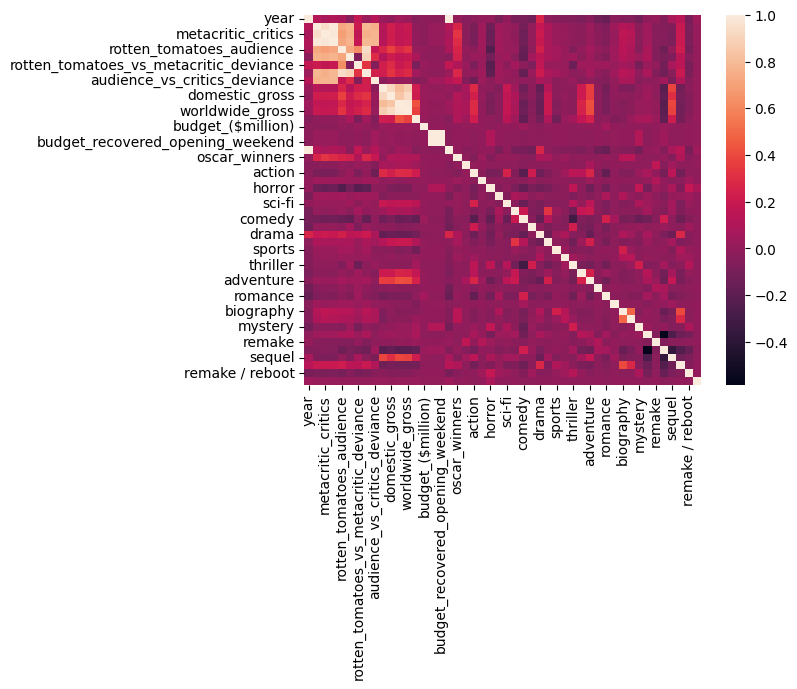

In [ ]:
#correlation between the features
import seaborn as sns
sns.heatmap(df.corr())



#3.Define Model and Train

In this section we apply diffetrent classification algorithms with diffrent approaches(due to imbalanced data). We evaluate every approach and try to figure out which gives the best performance.

##3.1Train_set and Test_set

In [ ]:
X= df.drop(['oscar_winners'], axis=1)
y=df['oscar_winners']
X.shape, y.shape

((1400, 47), (1400,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#((980, 47), (420, 47), (980,), (420,))

((980, 47), (420, 47), (980,), (420,))

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((980, 47), (420, 47), (980,), (420,))

##3.2 Standardization

Here we perform the standardization technique in order to transform the data before applying any machine algorithm

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train) #let scaler to fit to X_train #find the mean and std of the data
X_train=scaler.transform(X_train) #let scaler to transform the data
X_test=scaler.transform(X_test) #transform also for unseeen data(with the same parameters
                                #learned from .fit)


In [ ]:
type(y_train), type(X_train)

(pandas.core.series.Series, numpy.ndarray)

##3.3 Useful functions

Function ```flatten_dict``` flatten our metrics from the classification_report in order to make a dataframe with the total results

In [ ]:
def flatten_dict(report_dict):
  result_dict={} #initialize a dict
  for k1, k2 in report_dict.items():
    if k1=='accuracy' or k1=='name':
      result_dict[k1]=k2
    else:
      for col, v in k2.items():
          result_dict[k1+'_'+col]=v
  return result_dict



Function ```confusionMatrix_and_roc``` is a function that plots the roc curve and the confusion matrix. We will use this function in order to evaluate the performance of every model

In [ ]:
def confusionMatrix_and_roc(classifier,X_test,y_test):

  roc_display=RocCurveDisplay.from_estimator(
      classifier,
      X_test,
      y_test)


  confusion_matrix=ConfusionMatrixDisplay.from_estimator(
      classifier,
      X_test,
      y_test

  )


  return fig


In [ ]:

type(X_train),type(y_train),type(X_test), type(y_test)

(numpy.ndarray,
 pandas.core.series.Series,
 numpy.ndarray,
 pandas.core.series.Series)

##3.4 Attempt with Logistic Regression model

###3.4.1 Logistic Regression Model

Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       406
         1.0       0.36      0.29      0.32        14

    accuracy                           0.96       420
   macro avg       0.67      0.63      0.65       420
weighted avg       0.96      0.96      0.96       420



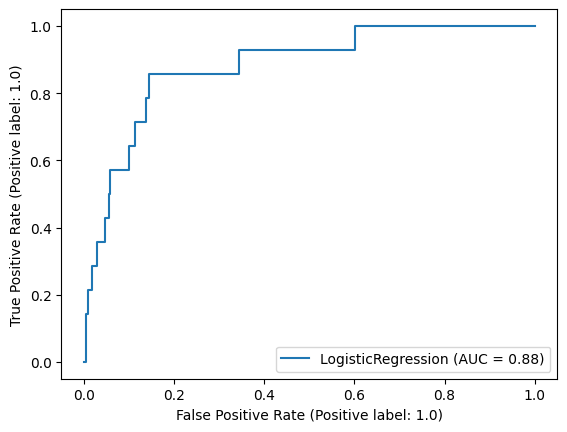

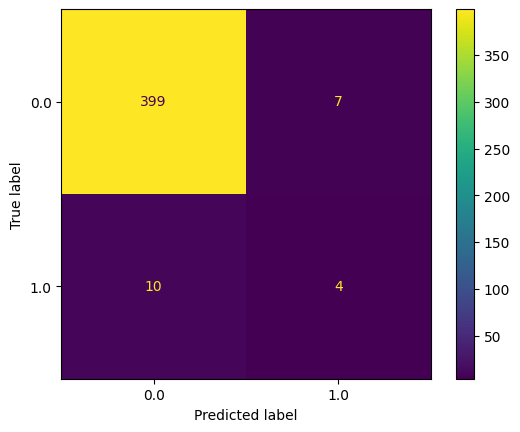

In [ ]:
lr1=LogisticRegression()
lr1.fit(X_train,y_train)
y_pred=lr1.predict(X_test)
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
lr_class_report=metrics.classification_report(y_test,y_pred, output_dict=True)
lr_class_report['name']='Logistic Regression'
plt.show(confusionMatrix_and_roc(lr1,X_test, y_test))

From roc curve we can infer that the model performance is good, because the curve has almost the ideal behaviour(to be on the left-top corner).We see that the model can predict very well the class 0.0 but not the class 1.0 beacuse of the number of non-oscar moovies in the dataset. Also we see that we have a very high AUC=0.87 which means that our model can distinguish  well between the 2 classes.The macro-avg recall and presicion is high and the accuracy value is very high,indicating that the model can predict well out of all instances.

###3.4.2 Balanced Logistic Regression Model

We try to balance the classes through our Logistic Regression model and evaluate it again

Trying Logistic regression classifier with balanced classes we see that we get a higher score on recall for class 1. This behavior occurs because we set weights to each class according with the frequency of its class. So we try to balance the amount of non-oscar and oscar moovies and fit the model again. Also we see again a good roc diagram with AUC=0.88,which means that the model can predict the actual positive values with minor mistakes. The only disadvantage for this method is that we get a low presicion for class 1.0  which means that the model still struggles to predict which moovies got oscar. This is propably because of the imbalance of the data.

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.89      0.94       406
         1.0       0.20      0.79      0.32        14

    accuracy                           0.89       420
   macro avg       0.60      0.84      0.63       420
weighted avg       0.97      0.89      0.92       420



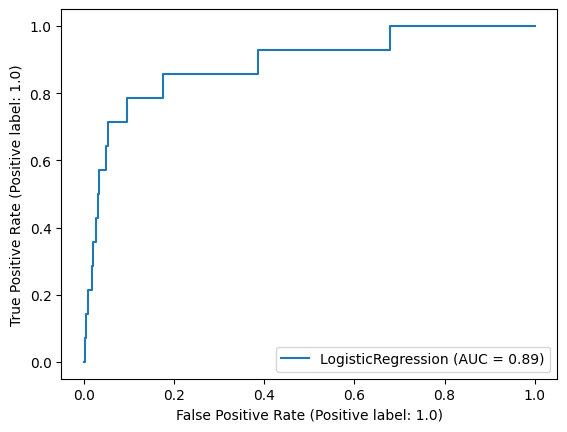

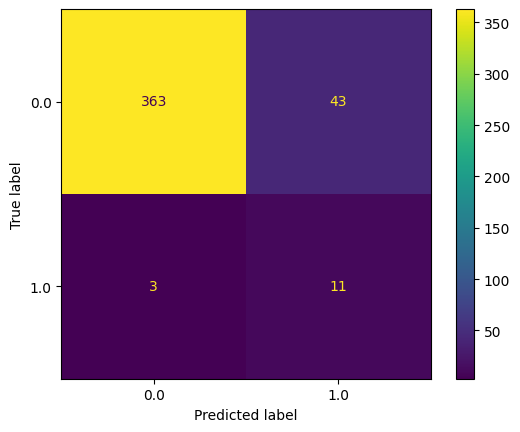

In [ ]:
lr2=LogisticRegression(class_weight="balanced")
lr2.fit(X_train,y_train)
y_pred=lr2.predict(X_test)
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
lr_class_report_balanced=metrics.classification_report(y_test,y_pred, output_dict=True)
lr_class_report_balanced['name']='Logistic Regression Balanced'
plt.show(confusionMatrix_and_roc(lr2,X_test,y_test))

###3.4.3 Logistic Regression Model with fixed weights

We try now with fixed class weights

Applying fixed weights on classes we see that we get better results for class 1.0 than with balanced classes. We get also a higher macro avg score. From the roc curve we can infer that the model performance is good because the curve **tends to** be on the top-left corner meaning that every instance that the model identifies as belonging to the positive class actually belongs to that class.The auc score is high. So, in generall we could say that applying fixed weights on classes using logistic regression model,model's performance is good, but not perfect.

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       406
         1.0       0.23      0.71      0.35        14

    accuracy                           0.91       420
   macro avg       0.61      0.82      0.65       420
weighted avg       0.96      0.91      0.93       420



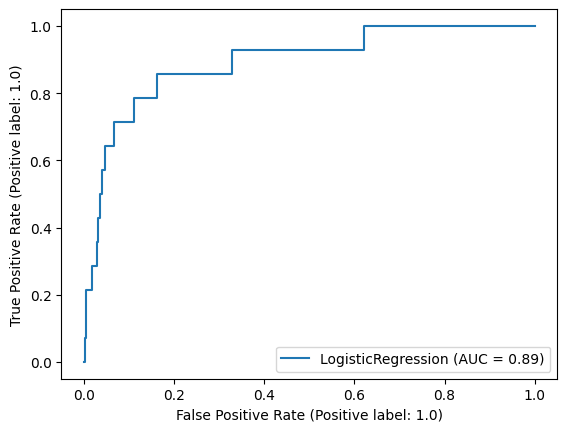

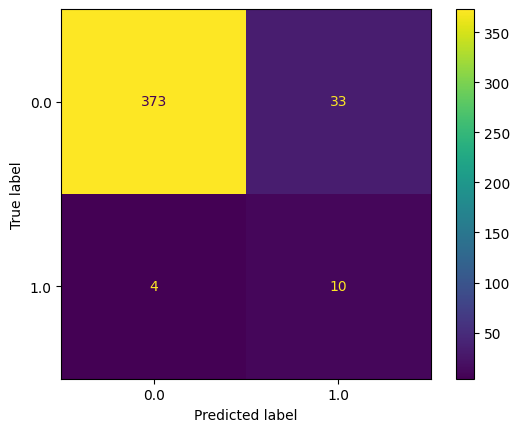

In [ ]:
lr3=LogisticRegression(class_weight={0:0.1 , 1:0.9})
lr3.fit(X_train,y_train)
y_pred=lr3.predict(X_test)
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
lr_class_report_custom_weights_1=metrics.classification_report(y_test,y_pred, output_dict=True)
lr_class_report_custom_weights_1['name']='Logistic Regression with custom weights 1'
plt.show(confusionMatrix_and_roc(lr3,X_test,y_test))

Same as before we apply a weight of 0.05 in class 0 and a weight of 0.95 on class 1 due to the imbalanced data. This approach has no difference comparing to the previous, except that here the presicion score for class 1 is lower.

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.88      0.93       406
         1.0       0.18      0.79      0.29        14

    accuracy                           0.87       420
   macro avg       0.59      0.83      0.61       420
weighted avg       0.96      0.87      0.91       420



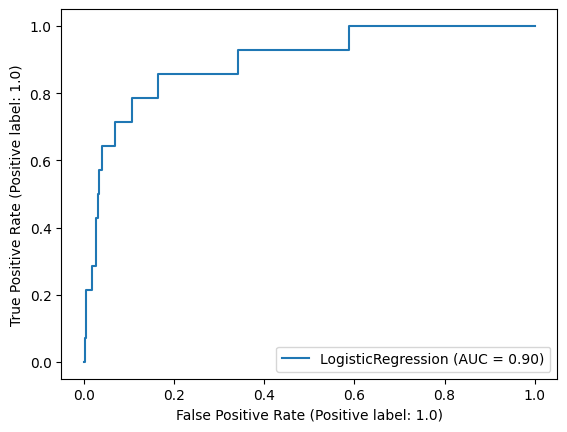

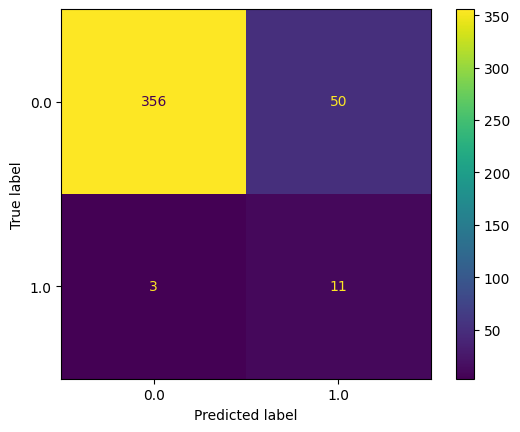

In [ ]:
lr4=LogisticRegression(class_weight={0:0.05 , 1:0.95})
lr4.fit(X_train,y_train)
y_pred=lr4.predict(X_test)
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
lr_class_report_custom_weights_2=metrics.classification_report(y_test,y_pred, output_dict=True)
lr_class_report_custom_weights_2['name']='Logistic Regression with custom weights 2'
plt.show(confusionMatrix_and_roc(lr4,X_test,y_test))

##3.5 Attempt with Desicion Tree Classifier

###3.5.1 Simple Desicion Tree Classifier

Using decision tree classifier we get a high presicion and recall for class 1.0 comparing to the above approaches.

In [ ]:
dt1=tree.DecisionTreeClassifier() #trying to get hiqh recall fro class oscar_winners
dt1.fit(X_train,y_train) #fit
y_pred=dt1.predict(X_test) #predict
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
dt_class_report=metrics.classification_report(y_test,y_pred, output_dict=True)
#plt.show(confusionMatrix_and_roc(dt1,X_test,y_test))
dt_class_report['name']='DT clf'

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       406
         1.0       0.36      0.64      0.46        14

    accuracy                           0.95       420
   macro avg       0.67      0.80      0.72       420
weighted avg       0.97      0.95      0.96       420



###3.5.2 Balanced Desicion Tree Classifier

Using Desision Tree Classifier with balanced class weights, we have again a very good prediction for class 0.0. The model can't predict very well class 1.0 due to imbalanced data.Comparing to the previous mdel the results for class 1.0 are worse.

In [ ]:
dt2=tree.DecisionTreeClassifier( class_weight="balanced") #trying to get hiqher recall fro class oscar_winners
dt2.fit(X_train,y_train) #fit
y_pred=dt2.predict(X_test) #predict
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
dt_class_balanced_report=metrics.classification_report(y_test,y_pred, output_dict=True)
dt_class_balanced_report['name']='DT balanced'
#dt_class_balanced_report

Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       406
         1.0       0.32      0.57      0.41        14

    accuracy                           0.95       420
   macro avg       0.65      0.76      0.69       420
weighted avg       0.96      0.95      0.95       420



###3.5.3 Weighted_class Desicion Tree Classifier

Desicion Tree classifier with fixed class weights can predict very weel the instances on class 0.0 but still struggling to make correct prediction for class 1.0. Comparing to the previous approach we get worse results for class 1.0 and also for macro avg scores.

In [ ]:
dt3=tree.DecisionTreeClassifier( class_weight={0:0.1, 1:0.9}) #trying to get hiqher recall and presiocn for class oscar_winners
dt3.fit(X_train,y_train) #fit
y_pred=dt3.predict(X_test) #predict
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
dt_class_custom_weights1_report=metrics.classification_report(y_test,y_pred, output_dict=True)
dt_class_custom_weights1_report['name']='DT custom_weights1'


Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       406
         1.0       0.35      0.50      0.41        14

    accuracy                           0.95       420
   macro avg       0.67      0.73      0.69       420
weighted avg       0.96      0.95      0.96       420



Applying smaller class weights on class 0, the model performs  somehow better result but with no significant difference.

In [ ]:
clf=tree.DecisionTreeClassifier( class_weight={0:0.05, 1:0.95}) #trying to get hiqher recall and presicion scores for class oscar_winners
clf=clf.fit(X_train,y_train) #fit
y_pred=clf.predict(X_test) #predict
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
dt_class_custom_weights2_report=metrics.classification_report(y_test,y_pred, output_dict=True)
dt_class_custom_weights2_report['name']='DT custom_weights_2'


Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       406
         1.0       0.32      0.57      0.41        14

    accuracy                           0.95       420
   macro avg       0.65      0.76      0.69       420
weighted avg       0.96      0.95      0.95       420



##3.6 Attempt with KNN

###3.6.1 Kneighbors Classifier

Using knn classifier we can see that our model can predict very well the class 0.0(from high presicion,recal and F1-score). However the performance for the class 1.0 is not as strong. Also from the roc diagram we can infer that after predicting the 60% of the actual posituve instances in the daataset ,the curve is very close to the diagonal line which means that the model predicts almost by chance.

Classification report
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       406
         1.0       0.32      0.57      0.41        14

    accuracy                           0.95       420
   macro avg       0.65      0.76      0.69       420
weighted avg       0.96      0.95      0.95       420



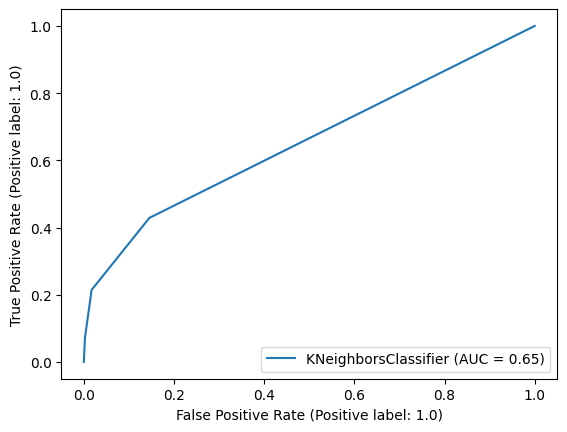

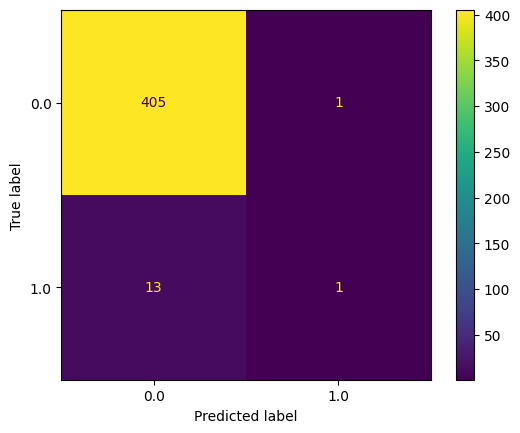

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KN
knn_clf=KN(weights='uniform') #trying to get hiqh recall fro class oscar_winners
knn_clf.fit(X_train,y_train) #fit
print("Classification report\n",metrics.classification_report(y_test,y_pred))
knn_class_report_uniform=metrics.classification_report(y_test,y_pred, output_dict=True)
knn_class_report_uniform['name']='KNN_uniform'
plt.show(confusionMatrix_and_roc(knn_clf,X_test,y_test))
#knn_class_report_uniform#

###3.6.2 KNeighborsClassifier with distance weights

With 'distance' weights knn algorithm still struggling to predict right for class 1.0.

Classification report
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       406
         1.0       0.32      0.57      0.41        14

    accuracy                           0.95       420
   macro avg       0.65      0.76      0.69       420
weighted avg       0.96      0.95      0.95       420



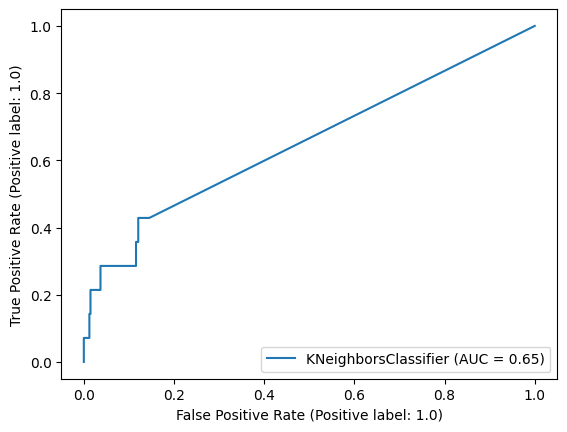

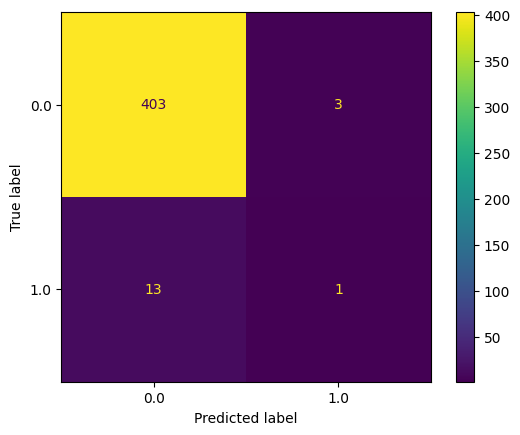

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KN
knn_clf=KN(weights='distance') #trying to get hiqh recall fro class oscar_winners
knn_clf.fit(X_train,y_train) #fit
print("Classification report\n",metrics.classification_report(y_test,y_pred))
knn_class_report_dist=metrics.classification_report(y_test,y_pred, output_dict=True)
knn_class_report_dist['name']='KNN_distance'
plt.show(confusionMatrix_and_roc(knn_clf,X_test,y_test))


##3.7 Attempt with naive classifier

###3.7.1 Gausian NB Classifier

For class 0, the model has a high precision , indicating that when it predicts an instance as class 0, it's usually correct. However, for class 1, the precision is low , suggesting that when the model predicts an instance as class 1, it's often incorrect. The model has a high recall for class 1, indicating that it effectively captures most of the actual class 1 instances. However, for class 0, the recall is low, meaning it misses a significant portion of the actual class 0 instances.Also the F1-score for class 0 is 40% ,while for class 1 is quite low, indicating a tarde-off between presicion and recall for class 0 and an imbalanced tilted toward recall for class 1.The overall accuracy is very low suggesting that the model's predictions are not very accurate for both classes.Also the macro avg F1-score is very low. Overall, the model is performing bad, especially in correctly identifying class 0 instances, despite high precision in this class. ALso from the roc seems that the model predict by chance.

Classification report
               precision    recall  f1-score   support

         0.0       0.99      0.20      0.34       406
         1.0       0.04      0.93      0.07        14

    accuracy                           0.23       420
   macro avg       0.51      0.57      0.21       420
weighted avg       0.96      0.23      0.33       420



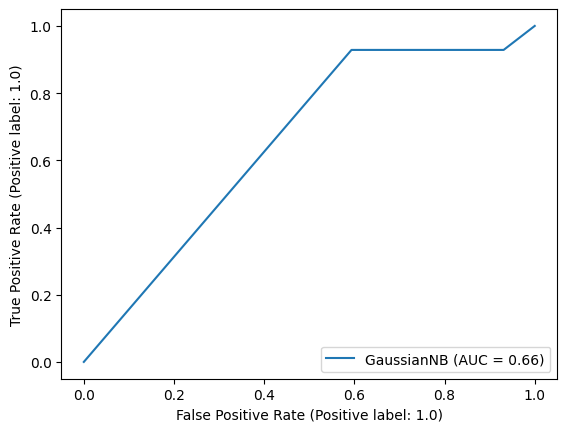

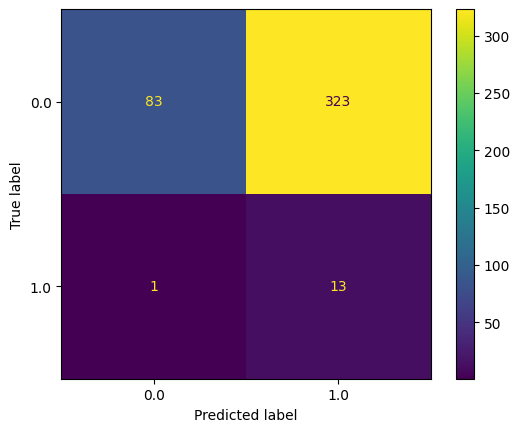

In [ ]:
from sklearn.naive_bayes import GaussianNB as GNB
gnb_clf=GNB() #trying to get hiqh recall fro class oscar_winners
gnb_clf.fit(X_train,y_train) #fit
y_pred=gnb_clf.predict(X_test)
#print(y_pred)
print("Classification report\n",metrics.classification_report(y_test,y_pred))
gnb_class_report=metrics.classification_report(y_test,y_pred, output_dict=True)
gnb_class_report['name']='GNB'
plt.show(confusionMatrix_and_roc(gnb_clf,X_test,y_test))


##3.8 Attempt with support vector machines

Now we apply ```SVM``` algorithm for classification

Despite the high presicion for class 0.0 we see that the model i sonly correct 6% when trying to redict class 1.0. Also the model finds correct all instances of class 1.0 but identifies only 24% of all actual class 0.0 instances.THe macro avg presicion , presiscion and F1-score are low. The model performs well in terms of precision for class 0.0 but poorly for class 1.0.
For class 0.0, the recall is low, indicating that the model misses many actual instances of this class.
Class 1.0 has perfect recall but very low precision, suggesting that while the model captures all instances of this class, it also misclassifies many other instances as belonging to this class. The model tries so much to find the instances of class 1.0, so it makes a lot of mistakes for class 0.0.The recall score of class 1.0 is perfect so it finds all the moovies with oscar.But the presicion for class 1.0 is very low ,so the model tries to predict well the instances of class 1.0,doing a lot of mistakes on class 1.0(FPR). Hoewever the model makes perfect predictions for class 0.0,(presicion of class 0.0).

####3.8.1 SVM with linear kernel

CLassification report
               precision    recall  f1-score   support

         0.0       0.99      0.20      0.34       406
         1.0       0.04      0.93      0.07        14

    accuracy                           0.23       420
   macro avg       0.51      0.57      0.21       420
weighted avg       0.96      0.23      0.33       420



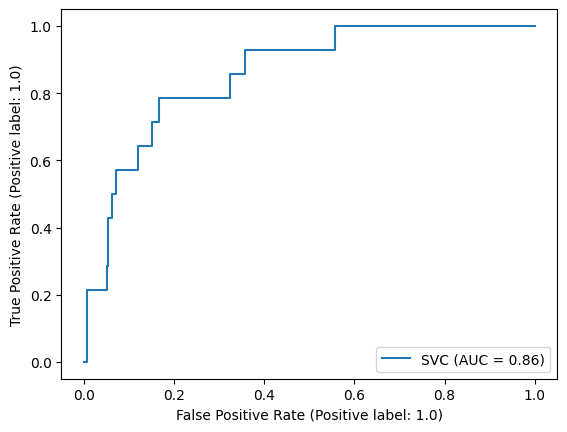

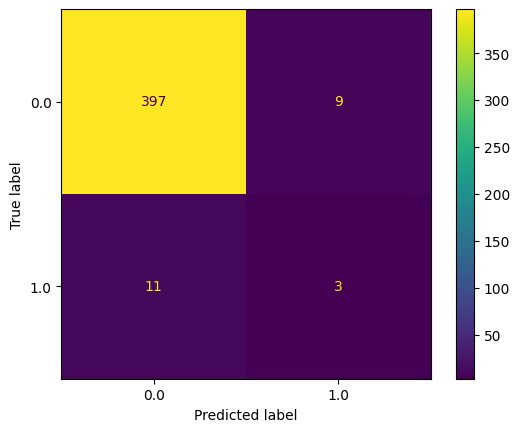

In [ ]:
from sklearn import svm
svm1=svm.SVC(kernel="linear")
svm1.fit(X_train,y_train)
#print(svm.predict(X_test))
print("CLassification report\n",metrics.classification_report(y_test,y_pred))
svm_class_report=metrics.classification_report(y_test,y_pred,output_dict=True)
svm_class_report['name']='SVM'
plt.show(confusionMatrix_and_roc(svm1,X_test,y_test))
#svm_class_report



###3.8.2 SVM with linear kernel and weighted classes

Trying svm algorothm with linear kernel and fixed class weights we see no difference in the performance of the model.Still the presicion for class 1.0 is as low as the recall for class 0.0.

CLassification report
               precision    recall  f1-score   support

         0.0       0.99      0.20      0.34       406
         1.0       0.04      0.93      0.07        14

    accuracy                           0.23       420
   macro avg       0.51      0.57      0.21       420
weighted avg       0.96      0.23      0.33       420



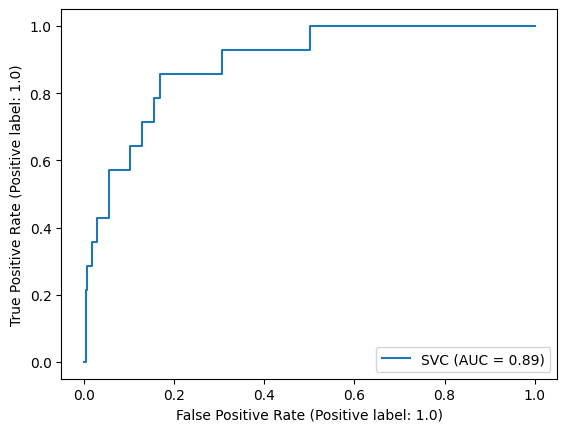

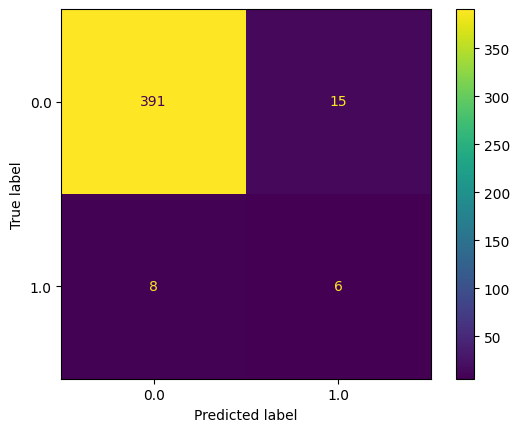

In [ ]:
from sklearn.svm import SVC
svm2=SVC(kernel="linear",class_weight={0:0.30,1:0.70})
svm2.fit(X_train,y_train)
#print(svm.predict(X_test))
print("CLassification report\n",metrics.classification_report(y_test,y_pred))
svm_class_report_weights=metrics.classification_report(y_test,y_pred,output_dict=True)
svm_class_report_weights['name']='SVM weighted_class'
plt.show(confusionMatrix_and_roc(svm2,X_test,y_test))
#svm_class_report_weights


###3.8.3 SVM with 'poly' kernel and weighted classes

Using svm whith polz kernl and class weights we observe no difference in the performance of our model.

CLassification report
               precision    recall  f1-score   support

         0.0       0.99      0.20      0.34       406
         1.0       0.04      0.93      0.07        14

    accuracy                           0.23       420
   macro avg       0.51      0.57      0.21       420
weighted avg       0.96      0.23      0.33       420



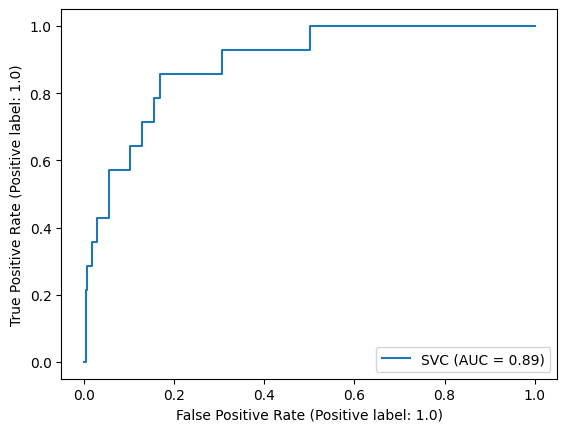

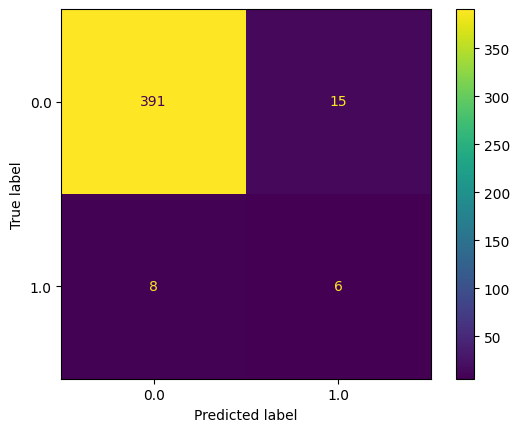

In [ ]:
svm3=SVC(kernel="poly",class_weight={0:0.30,1:0.70})
svm3.fit(X_train,y_train)
#print(svm.predict(X_test))
print("CLassification report\n",metrics.classification_report(y_test,y_pred))
svm_class_report_weights_poly=metrics.classification_report(y_test,y_pred,output_dict=True)
svm_class_report_weights_poly['name']='SVM weighted with polynomial kernel'
plt.show(confusionMatrix_and_roc(svm2,X_test,y_test))
#svm_class_report_weights

###3.8.4 SVM with 'rbf' kernel and weighted classes

Here we use rbf kernel and clas weights but still we get a poor perforamnce

CLassification report
               precision    recall  f1-score   support

         0.0       0.99      0.20      0.34       406
         1.0       0.04      0.93      0.07        14

    accuracy                           0.23       420
   macro avg       0.51      0.57      0.21       420
weighted avg       0.96      0.23      0.33       420



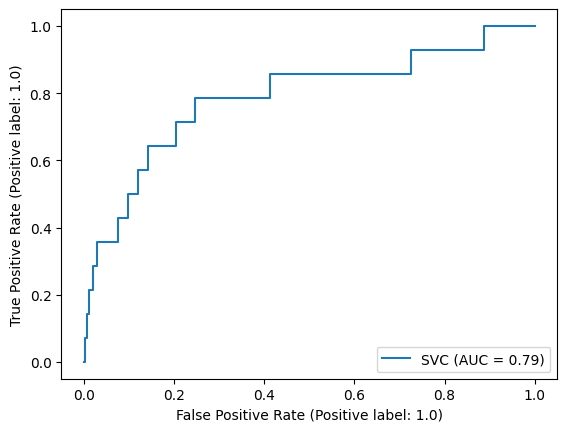

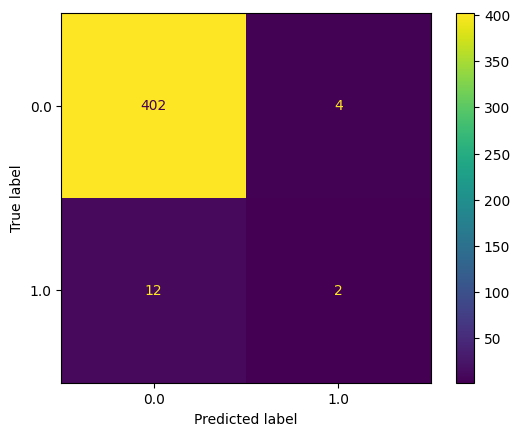

In [ ]:
svm4=SVC(kernel="rbf",class_weight={0:0.30,1:0.70})
svm4.fit(X_train,y_train)
#print(svm.predict(X_test))
print("CLassification report\n",metrics.classification_report(y_test,y_pred))
svm_class_report_weights_rbf=metrics.classification_report(y_test,y_pred,output_dict=True)
svm_class_report_weights_rbf['name']='SVM weighted with rbf kernel'
plt.show(confusionMatrix_and_roc(svm3,X_test,y_test))
#svm_class_report_weights

###3.8.5 SVM with 'linear' kernel, C=0.1 and gamma='scale'

We try here to use svm algorithm with parameters C=0.1, a linear kernel and a gamma='scale'. aThe pwrformance remains the same.

CLassification report
               precision    recall  f1-score   support

         0.0       0.99      0.20      0.34       406
         1.0       0.04      0.93      0.07        14

    accuracy                           0.23       420
   macro avg       0.51      0.57      0.21       420
weighted avg       0.96      0.23      0.33       420



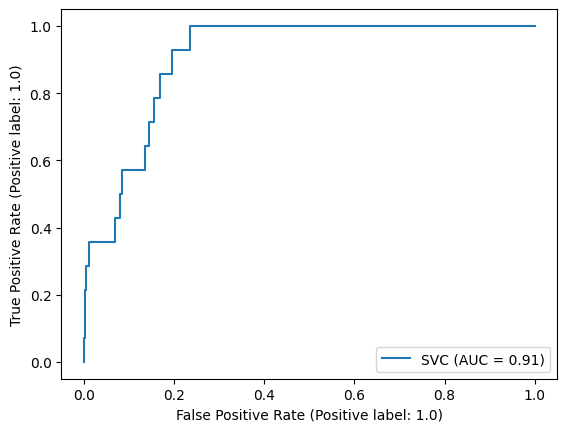

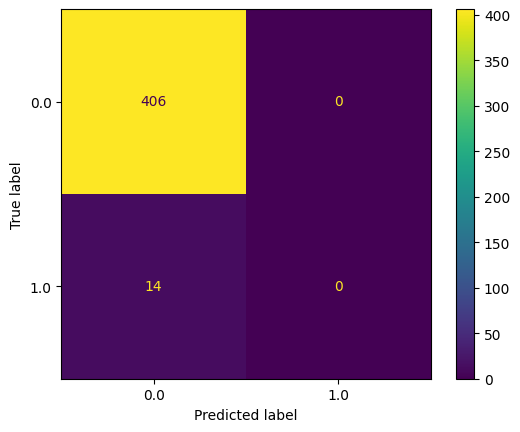

In [ ]:
svm5=SVC(C=0.1,kernel="linear",gamma='scale')
svm5.fit(X_train,y_train)
#print(svm.predict(X_test))
print("CLassification report\n",metrics.classification_report(y_test,y_pred))
svm_class_report_weights_gamma_scale=metrics.classification_report(y_test,y_pred,output_dict=True)
svm_class_report_weights_gamma_scale['name']='SVM with C=0.1 and gamma=scale'
plt.show(confusionMatrix_and_roc(svm4,X_test,y_test))
#svm_class_report_weights

###3.8.6 SVM with 'linear' kernel C=0.1 and gamma='auto'

CLassification report
               precision    recall  f1-score   support

         0.0       0.99      0.20      0.34       406
         1.0       0.04      0.93      0.07        14

    accuracy                           0.23       420
   macro avg       0.51      0.57      0.21       420
weighted avg       0.96      0.23      0.33       420



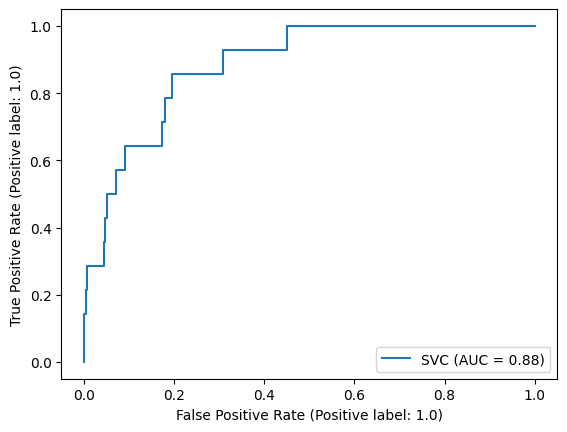

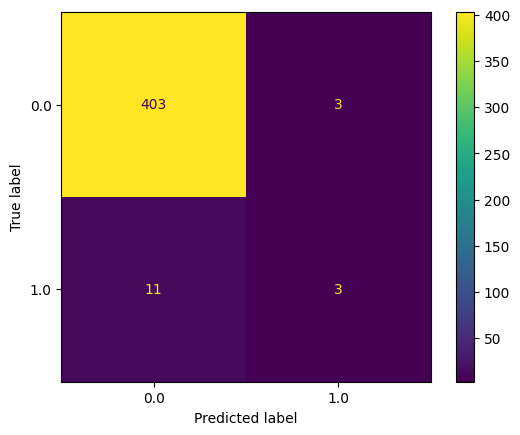

In [ ]:
svm6=SVC(C=0.1,kernel="linear",gamma='auto')
svm6.fit(X_train,y_train)
#print(svm.predict(X_test))
print("CLassification report\n",metrics.classification_report(y_test,y_pred))
svm_class_report_weights_gamma_auto=metrics.classification_report(y_test,y_pred,output_dict=True)
svm_class_report_weights_gamma_auto['name']='SVM C=0.1 and gamma auto'
plt.show(confusionMatrix_and_roc(svm5,X_test,y_test))
#svm_class_report_weights

##3.9 Collect all metrics and plot

We gather all our metrics from the classification algorithms to a dataframe(resulted_df),using function ```flatten_dict```

In [ ]:
                        #Logistic Regression Classifier
result_df=pd.DataFrame([flatten_dict(lr_class_report),
                        flatten_dict(lr_class_report_balanced),
                        flatten_dict(lr_class_report_custom_weights_1),
                        flatten_dict(lr_class_report_custom_weights_2),

                        #Desicion Tree Classifier
                        flatten_dict(dt_class_report),
                        flatten_dict(dt_class_balanced_report),
                        flatten_dict(dt_class_custom_weights1_report),
                        flatten_dict(dt_class_custom_weights2_report),

                        #KNN
                        flatten_dict(knn_class_report_uniform),
                        flatten_dict(knn_class_report_dist),

                        #GNB
                        flatten_dict(gnb_class_report),

                        #SVM
                        flatten_dict(svm_class_report),
                        flatten_dict(svm_class_report_weights),
                        flatten_dict(svm_class_report_weights_poly),
                        flatten_dict(svm_class_report_weights_rbf),
                        flatten_dict(svm_class_report_weights_gamma_scale),
                        flatten_dict(svm_class_report_weights_gamma_auto),

                        ])

name_column=result_df.pop('name')
result_df.insert(0,'name',name_column)
result_df

name  0.0_precision  0.0_recall  \
0                         Logistic Regression       0.975550    0.982759   
1                Logistic Regression Balanced       0.991803    0.894089   
2   Logistic Regression with custom weights 1       0.989390    0.918719   
3   Logistic Regression with custom weights 2       0.991643    0.876847   
4                                      DT clf       0.987342    0.960591   
5                                 DT balanced       0.984810    0.958128   
6                          DT custom_weights1       0.982500    0.967980   
7                         DT custom_weights_2       0.984810    0.958128   
8                                 KNN_uniform       0.984810    0.958128   
9                                KNN_distance       0.984810    0.958128   
10                                        GNB       0.988095    0.204433   
11                                        SVM       0.988095    0.204433   
12                         SVM weighted_class       0.988095    0.204433   
13        SVM weighted with polynomial kernel       0.988095    0.204433   
14               SVM weighted with rbf kernel       0.988095    0.204433   
15             SVM with C=0.1 and gamma=scale       0.988095    0.204433   
16                   SVM C=0.1 and gamma auto       0.988095    0.204433   

    0.0_f1-score  0.0_support  1.0_precision  1.0_recall  1.0_f1-score  \
0       0.979141          406       0.363636    0.285714      0.320000   
1       0.940415          406       0.203704    0.785714      0.323529   
2       0.952746          406       0.232558    0.714286      0.350877   
3       0.930719          406       0.180328    0.785714      0.293333   
4       0.973783          406       0.360000    0.642857      0.461538   
5       0.971286          406       0.320000    0.571429      0.410256   
6       0.975186          406       0.350000    0.500000      0.411765   
7       0.971286          406       0.320000    0.571429      0.410256   
8       0.971286          406       0.320000    0.571429      0.410256   
9       0.971286          406       0.320000    0.571429      0.410256   
10      0.338776          406       0.038690    0.928571      0.074286   
11      0.338776          406       0.038690    0.928571      0.074286   
12      0.338776          406       0.038690    0.928571      0.074286   
13      0.338776          406       0.038690    0.928571      0.074286   
14      0.338776          406       0.038690    0.928571      0.074286   
15      0.338776          406       0.038690    0.928571      0.074286   
16      0.338776          406       0.038690    0.928571      0.074286   

    1.0_support  accuracy  macro avg_precision  macro avg_recall  \
0            14  0.959524             0.669593          0.634236   
1            14  0.890476             0.597753          0.839901   
2            14  0.911905             0.610974          0.816502   
3            14  0.873810             0.585986          0.831281   
4            14  0.950000             0.673671          0.801724   
5            14  0.945238             0.652405          0.764778   
6            14  0.952381             0.666250          0.733990   
7            14  0.945238             0.652405          0.764778   
8            14  0.945238             0.652405          0.764778   
9            14  0.945238             0.652405          0.764778   
10           14  0.228571             0.513393          0.566502   
11           14  0.228571             0.513393          0.566502   
12           14  0.228571             0.513393          0.566502   
13           14  0.228571             0.513393          0.566502   
14           14  0.228571             0.513393          0.566502   
15           14  0.228571             0.513393          0.566502   
16           14  0.228571             0.513393          0.566502   

    macro avg_f1-score  macro avg_support  weighted avg_precision  \
0             0.649571                420    

Then we plot from the dataframe only the presicion and recall for class 1.0 (as we try mostly to evaluate our model considering metrics for class 1.0 beacause it has the less instances fromclass 0,0), the macro_vg f1-score and accuracy,

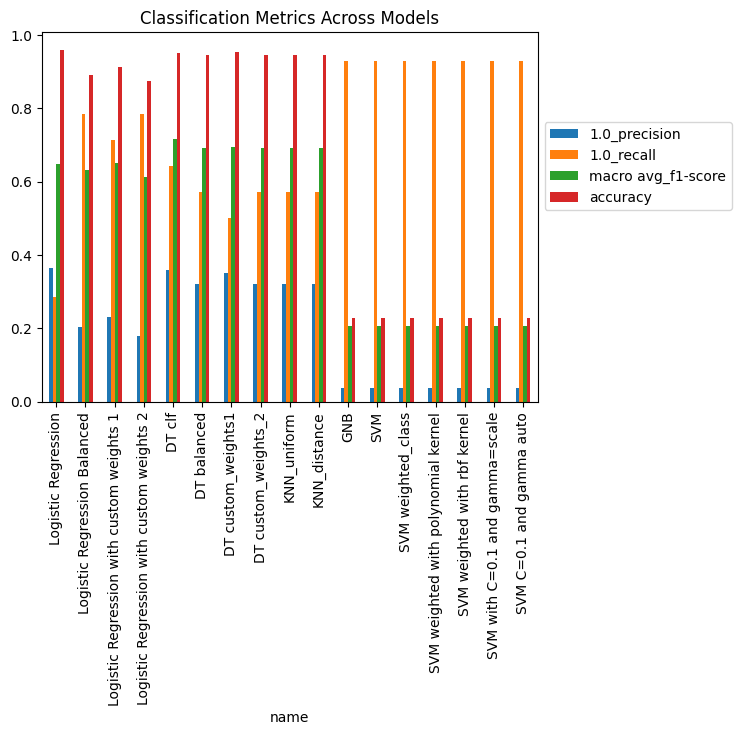

In [ ]:
#plt.figure(figsize=(9000,58))
result_df.plot(x="name",y=['1.0_precision','1.0_recall','macro avg_f1-score','accuracy'], kind="bar")
plt.title('Classification Metrics Across Models')
plt.legend(loc='lower left',bbox_to_anchor=(1,0.5))
plt.show()

From the plot we could say that the Logistic Regression,Desicion Tree Classifier wth class weight 1,Logistic Regression with custom weight 1 and Logistic Regression with custom weight 2 have the best metrcis. Comparing with the other classifications algorithms they have a high 1.0_recall(indicating that the model can find the most instances of class 1.0)in combination with a high presicion.Also they have a high accuracy and good F1-scores. So we make a Voting classifier, which combines the 3 of them.

In [ ]:
#combine 3 best classifiers
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_validate
clf1=LogisticRegression()
clf2=tree.DecisionTreeClassifier( class_weight={0:0.1, 1:0.9})
clf3=LogisticRegression(class_weight={0:0.1, 1:0.9})
eclf1=VotingClassifier(estimators=[('lr',clf1),('dt_w',clf2),('lr_w',clf3)],voting='hard')
eclf1.fit(X_train,y_train)
pred=eclf1.predict(X_test)
scores = cross_validate(clf,X_train,y_train, scoring=('accuracy','precision','recall'), cv=5)
print("Accuracy: %0.2f " % (scores['test_accuracy'].mean()))
print("Presicion: %0.2f " % (scores['test_precision'].mean()))
print("Recall: %0.2f " % (scores['test_recall'].mean()))
#print(scores['test_recall'])


Accuracy: 0.95 
Presicion: 0.37 
Recall: 0.34 


Presicion for class 1.0 is low meaning that the voting classifier can only predict accurate a small set our data.Recall is also low meanining that the classifier can pedict a small number of the oscar-moovies.Accuracy is high,due to the high metrics for class 0.0. So we observe no difference in metrics with the classifier

## 3.10 KFold validation

KFodl_fnc is a function in order to do the 5-fold cross validation for every algorithm.

In [ ]:
def KFold_fnc(method_name):
  fold_results=[]
  from sklearn.model_selection import KFold as KFold
  kf =KFold(n_splits=5, shuffle=True)
  for i, (train_index, test_index) in enumerate (kf.split(X)):
    _X_train=X.values[train_index]
    _y_train=y.values[train_index]
    _X_test=X.values[test_index]
    _y_test=y.values[test_index]

    scaler = StandardScaler()
    scaler.fit(_X_train) #let scaler to fit to X_train #find the mean and std of the data
    _X_train=scaler.transform(_X_train) #let scaler to tranform the data
    _X_test=scaler.transform(_X_test) #transform also for unseeen data(with the same parameters
                                    #learned from .fit)
    clf=method_name
    clf=clf.fit(_X_train, _y_train) #fit
    #clf.get_depth()  #10
    y_pred=clf.predict(_X_test) #predict
    print('Fold', i, ':')
    print(metrics.classification_report(_y_test, y_pred))
    result_dict = metrics.classification_report(_y_test, y_pred, output_dict=True)
    result_dict['name'] = 'fold ' + str(i)+str(method_name)
    #plt.show(confusionMatrix_and_roc(clf,_X_test,_y_test))
    fold_results.append(flatten_dict(result_dict))
  return pd.DataFrame(fold_results)



In [ ]:
def plot_results(results,model):
  #plt.figure(figsize=(9000,58))
  results.plot(x="name",y=['1.0_precision','1.0_recall','macro avg_f1-score','accuracy'], kind="bar")
  plt.title('Metrics across Folds'+' '+'for'+' '+(model))
  plt.legend(loc='lower left',bbox_to_anchor=(1,0.5))
  plt.show()

In [ ]:
def mean_of_folds(results,method_name):
  presicion_mean=results['1.0_precision'].mean()
  recall_mean=results['1.0_recall'].mean()
  macro_mean=results['macro avg_f1-score'].mean()
  accuracy_mean=results['accuracy'].mean()
  df_mean = pd.DataFrame({
    '1.0_precision_mean': [presicion_mean],
    '1.0_recall_mean': [recall_mean],
    'macro avg_f1-score_mean': [macro_mean],
    'accuracy_mean': [accuracy_mean]
  })
  df_mean["name"]=method_name
  return df_mean


In [ ]:
def plot_mean_of_folds(df_mean):
  return df_mean.plot(x='name',y=['1.0_precision_mean','1.0_recall_mean','macro avg_f1-score_mean','accuracy_mean'], kind="bar")


In [ ]:
results1=(KFold_fnc(LogisticRegression()))

Fold 0 :
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       275
         1.0       0.25      0.20      0.22         5

    accuracy                           0.97       280
   macro avg       0.62      0.59      0.60       280
weighted avg       0.97      0.97      0.97       280

Fold 1 :
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       264
         1.0       0.33      0.12      0.18        16

    accuracy                           0.94       280
   macro avg       0.64      0.55      0.57       280
weighted avg       0.91      0.94      0.92       280

Fold 2 :
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       262
         1.0       0.47      0.39      0.42        18

    accuracy                           0.93       280
   macro avg       0.71      0.68      0.69       280
weighted avg       0.93      0.93      0.93    

For class 0.0 , precision ranges between 0.96 to 1.0 indicating that when the model predicts class 0.0 it's accurate in its predictions. For class 1.0 oresicion ratings from 0.18 to 0.28, suggetsing that the mpodel struggling with the precise predictions for class 1.0. Class 0.0's recall ranges between 0.87 to 0.92, showing that the model identifies most of the actual class 0.0 instances. Class 1.0's recall varies from 0.47 to 0.89 indicating differing abilities to capture class 1.0 instances across folds.F1-scores are high reflecting a good balance between presiscion and recall for class 0.0.For class 1.0 F1-scores are lower due to lower presicion and recall for this class. Also accuracy ranges from 0.87 to 0.91 showing the overall correctness of the model;s predictions.However, the accuracy mightbe influenced from the instances of the majority class.So, the model predicts well in predicting the majority class with high presicion,recalland F1-scores. For class 0.0 the model's performance is worse,where precision,recall and F1-scores are lower across folds.

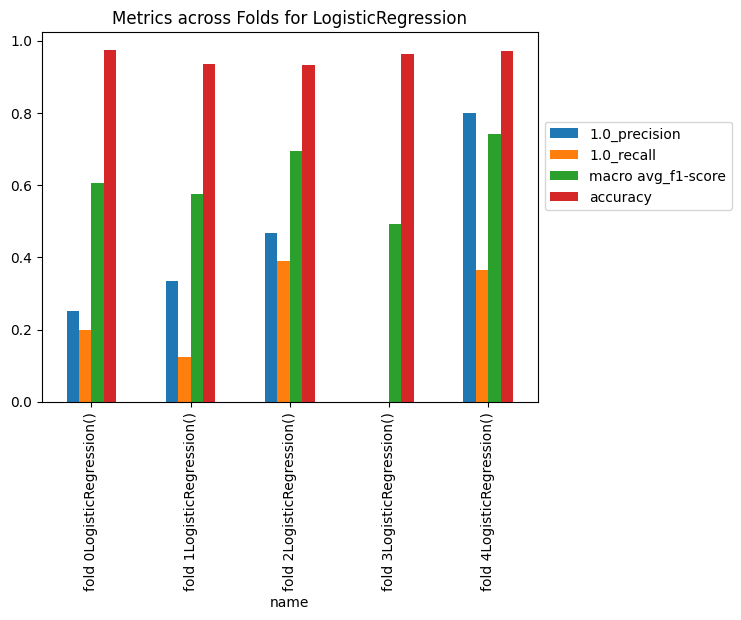

In [ ]:
plt1=plot_results(results1,'LogisticRegression')


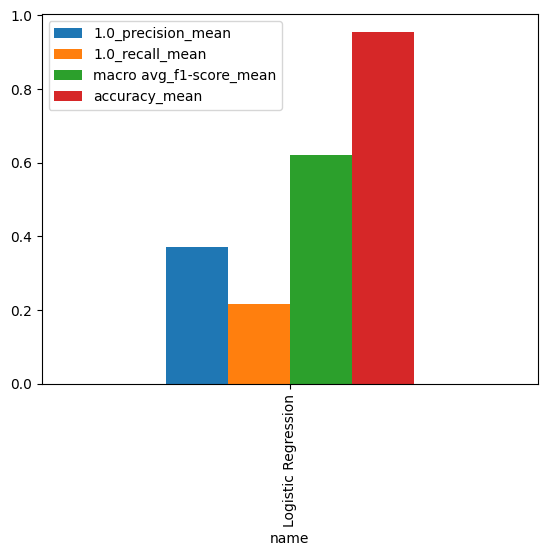

In [ ]:
mean_df1=mean_of_folds(results1,'Logistic Regression')
mean1=plot_mean_of_folds(mean_df1)

In [ ]:
results2=(KFold_fnc(LogisticRegression(class_weight="balanced")))

Fold 0 :
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92       274
         1.0       0.10      0.67      0.17         6

    accuracy                           0.86       280
   macro avg       0.54      0.76      0.54       280
weighted avg       0.97      0.86      0.91       280

Fold 1 :
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.94       271
         1.0       0.22      0.89      0.36         9

    accuracy                           0.90       280
   macro avg       0.61      0.89      0.65       280
weighted avg       0.97      0.90      0.92       280

Fold 2 :
              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94       265
         1.0       0.27      0.60      0.37        15

    accuracy                           0.89       280
   macro avg       0.62      0.75      0.66       280
weighted avg       0.94      0.89      0.91    

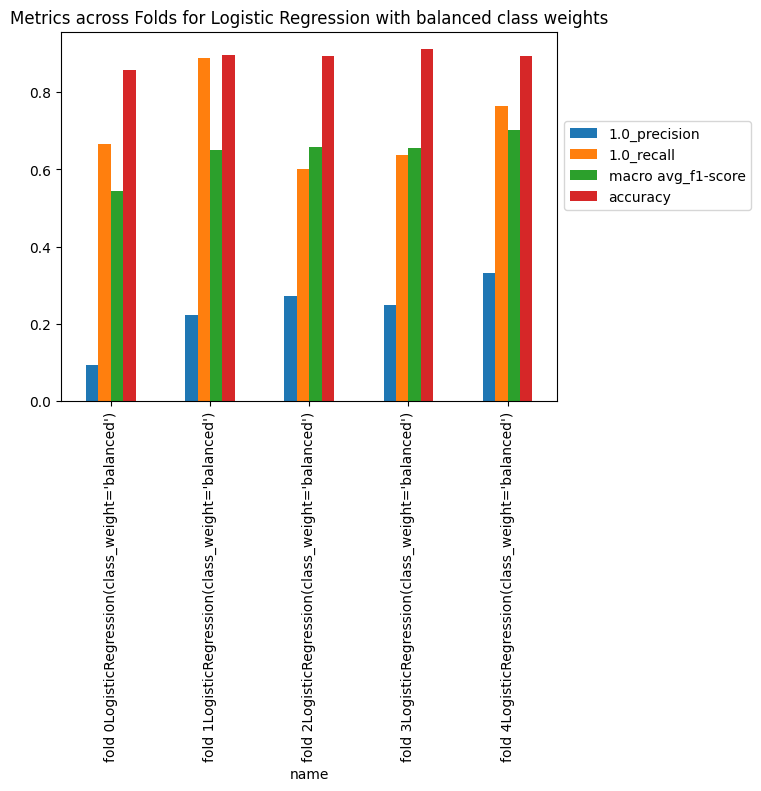

In [ ]:
plt2=plot_results(results2,'Logistic Regression with balanced class weights')

Presicion for class 0.0 ranges from 0.98-1.00, indicating that when the model predicts some instances of class 0.0 is almost correct.The recall for this class ranges form 0.87-0.91 ,showing that the model can predict 0.0 class very well. Presicion for class 1.0 ranges  from 0.17 -0.25 ,suggestting that the model struggles with prescise predictions for class 1.0. Also 1.0 recall varies from 0.64-0.90, indicating different abillities to capture class 1.0 across folds.  F1-scores fro class 0.0 are high because of the high recall and precesion.For class 1.0 is lower due to low recall and precesion across folds.Accuracy ranges from 0.88-0.91 showing the overall correctness of the model's predictions.Howevere it may influenced by the number of instances for class 0.0.In generall the model can predict very well class 0.0 but for class 1.0 can't make such good predictions.

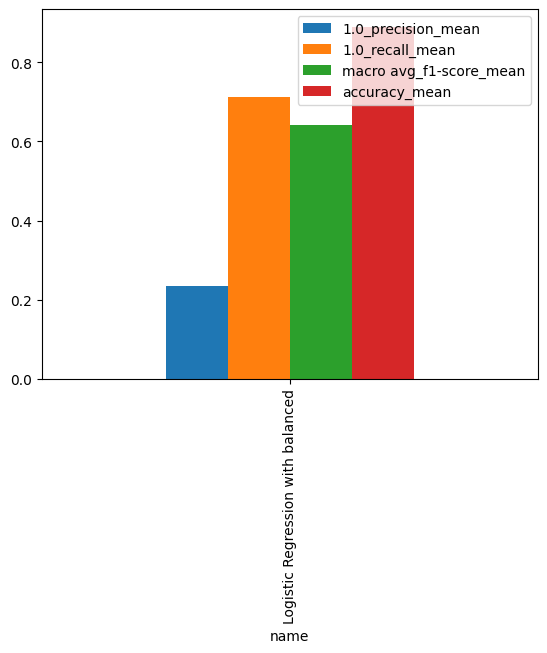

In [ ]:
mean_df2=mean_of_folds(results2,'Logistic Regression with balanced')
mean2=plot_mean_of_folds(mean_df2)

In [ ]:
results3=(KFold_fnc(LogisticRegression(class_weight={0:0.1 , 1:0.9})))

Fold 0 :
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       265
         1.0       0.34      0.67      0.45        15

    accuracy                           0.91       280
   macro avg       0.66      0.80      0.70       280
weighted avg       0.95      0.91      0.93       280

Fold 1 :
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95       270
         1.0       0.23      0.70      0.35        10

    accuracy                           0.91       280
   macro avg       0.61      0.81      0.65       280
weighted avg       0.96      0.91      0.93       280

Fold 2 :
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       272
         1.0       0.18      0.62      0.28         8

    accuracy                           0.91       280
   macro avg       0.58      0.77      0.61       280
weighted avg       0.96      0.91      0.93    

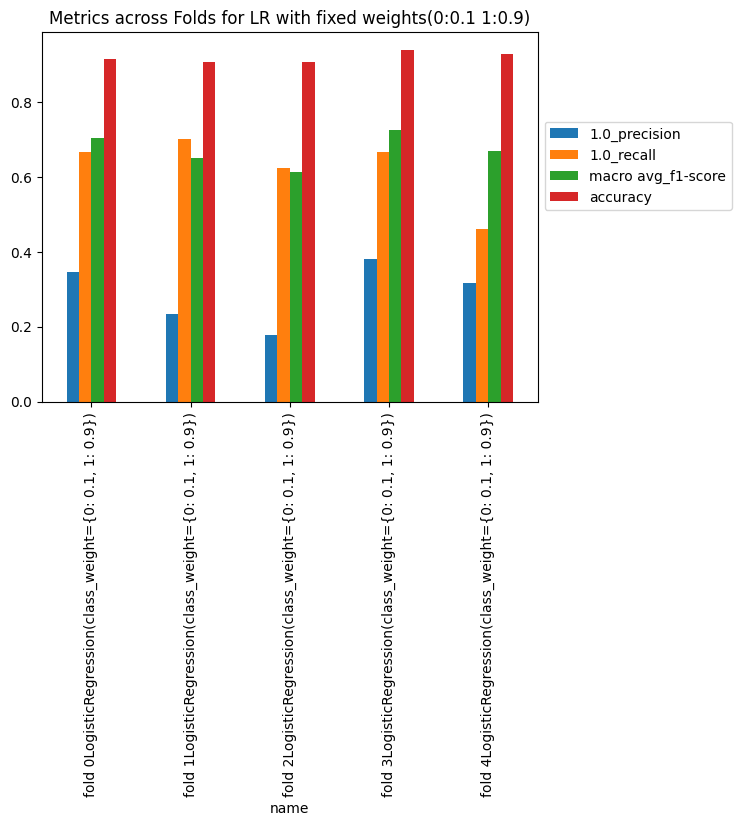

In [ ]:
plot_results(results3,'LR with fixed weights(0:0.1 1:0.9)')

For class 0.0 , precision ranges between 0.98 to 1.0 indicating that when the model predicts class 0.0 it's accurate in its predictions. For class 1.0 presicion ratings from 0.17 to 0.33, suggetsing that the model can not predict correct for class 1.0. Class 0.0's recall ranges between 0.91 to 0.95, showing that the model identifies most of the actual class 0.0 instances. Class 1.0's recall varies from 0.60 to 0.89 indicating differing abilities to capture class 1.0 instances across folds.F1-scores are high reflecting a good balance between presiscion and recall for class 0.0.For class 1.0 F1-scores are lower due to lower presicion and recall for this class. Also accuracy is very high  showing the overall correctness of the model's predictions.However, the accuracy might be influenced from the instances of the majority class.So, the model predicts well in predicting the majority class with high presicion,recal land F1-scores. For class 0.0 the model's performance is worse,where precision,recall and F1-scores are lower across folds.

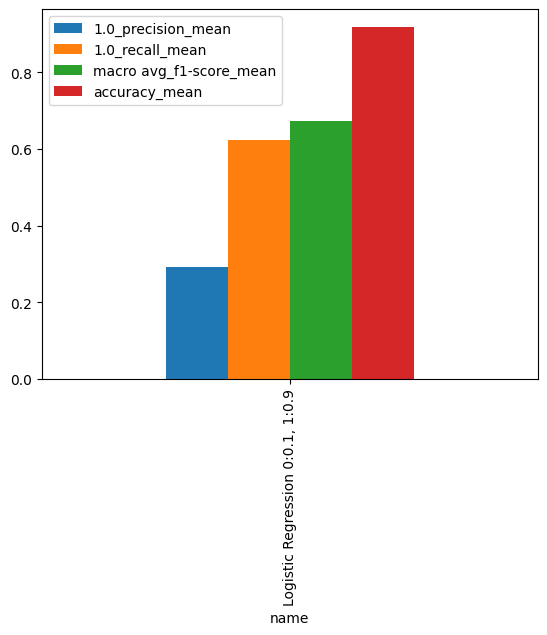

In [ ]:
mean_df3=mean_of_folds(results3,'Logistic Regression 0:0.1, 1:0.9')
mean3=plot_mean_of_folds(mean_df3)

In [ ]:
results4=(KFold_fnc(LogisticRegression(class_weight={0:0.05 , 1:0.95})))

Fold 0 :
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93       269
         1.0       0.18      0.64      0.28        11

    accuracy                           0.87       280
   macro avg       0.58      0.76      0.60       280
weighted avg       0.95      0.87      0.90       280

Fold 1 :
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94       269
         1.0       0.23      0.82      0.36        11

    accuracy                           0.89       280
   macro avg       0.61      0.85      0.65       280
weighted avg       0.96      0.89      0.91       280

Fold 2 :
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93       264
         1.0       0.26      0.69      0.38        16

    accuracy                           0.87       280
   macro avg       0.62      0.79      0.65       280
weighted avg       0.94      0.87      0.90    

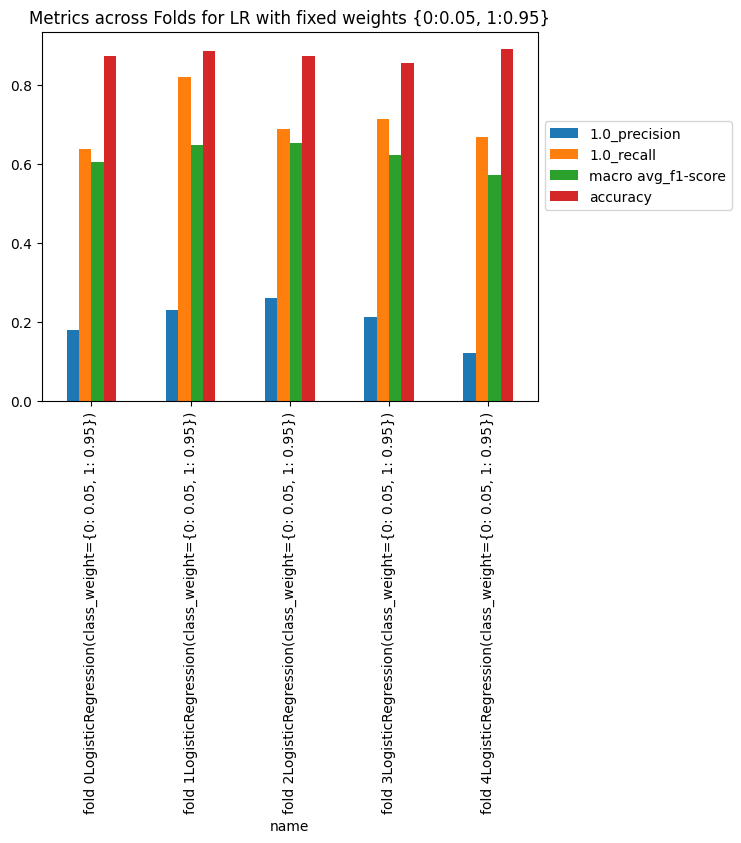

In [ ]:
plot_results(results4,'LR with fixed weights {0:0.05, 1:0.95}')

For class 0.0 , precision ranges between 0.98 to 1.0 indicating that when the model predicts class 0.0 it's accurate in its predictions. For class 1.0 presicion ratings from 0.17 to 0.42, suggetsing that the model struggling with the precise predictions for class 1.0. Class 0.0's recall ranges between 0.84 to 0.95, showing that the model identifies most of the actual class 0.0 instances. Class 1.0's recall varies from 0.62 to 1.00 showing that the model can find sometimes perfect the instances of class 1.0.In this situation(fold 1) the model try so hard to predict the oscar-moovies, but does a lot of mistakes on identifying them right(precesion for class 1.0 is 0.17).F1-scores are high reflecting a good balance between presiscion and recall for class 0.0.For class 1.0 F1-scores are lower due to lower presicion and recall for this class. Also accuracy is very high showing the overall correctness of the model's predictions.However, the accuracy might be influenced from the instances of the majority class.So, the model predicts well in predicting the majority class with high presicion,recall and F1-scores. For class 0.0 the model's performance is worse,where precision,recall and F1-scores are lower across folds(due to imbalanced data)

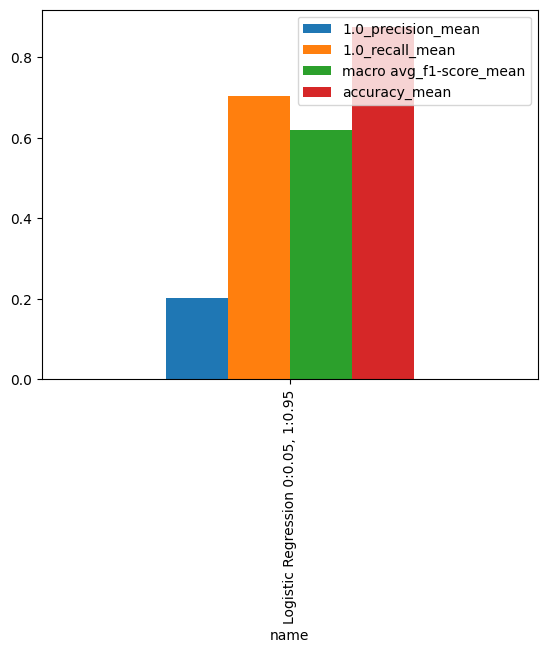

In [ ]:
mean_df4=mean_of_folds(results4,'Logistic Regression 0:0.05, 1:0.95')
mean4=plot_mean_of_folds(mean_df4)

In [ ]:
results5=(KFold_fnc(tree.DecisionTreeClassifier()))

Fold 0 :
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       263
         1.0       0.50      0.41      0.45        17

    accuracy                           0.94       280
   macro avg       0.73      0.69      0.71       280
weighted avg       0.93      0.94      0.94       280

Fold 1 :
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       267
         1.0       0.25      0.23      0.24        13

    accuracy                           0.93       280
   macro avg       0.61      0.60      0.60       280
weighted avg       0.93      0.93      0.93       280

Fold 2 :
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       273
         1.0       0.23      0.43      0.30         7

    accuracy                           0.95       280
   macro avg       0.61      0.70      0.64       280
weighted avg       0.97      0.95      0.96    

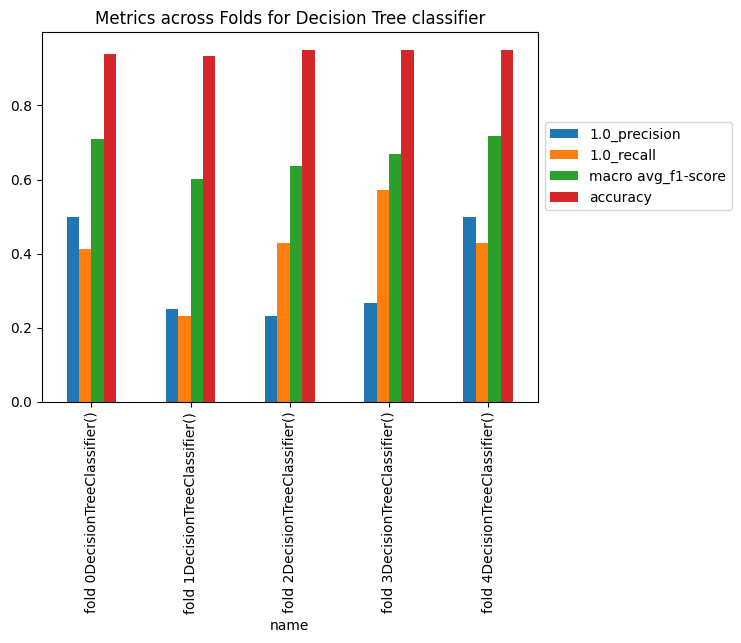

In [ ]:
plot_results(results5,'Decision Tree classifier')

Presicion for class 0.0 ranges from 0.97-0.99, showing that the model when try to predict class 0.0 is very acccurate on its predictions.Recall for this class is also high, menaning that the model can predict weel the instances of class 0.0. In the opposite, presisicon for class 1.0 ranges from  0.11-0.50 and that shows that our model is struggling to preidct accurate the instances of this class. Also class 1.0's recall ranges from 0.42-0.46,indicating that the model's performance for class 1.0 is worse than predictions by chance.  Accuracy again is high due to the hιgh presicion and recall for class 0.0.

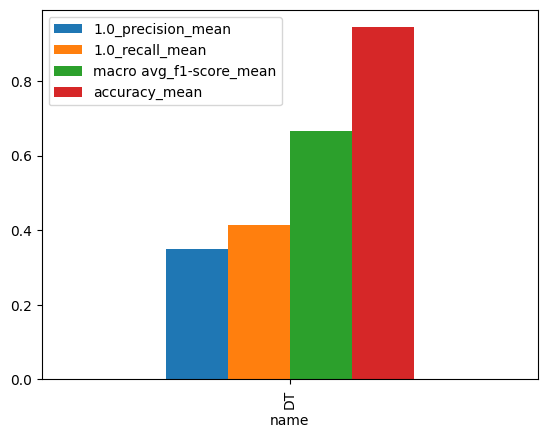

In [ ]:
mean_df5=mean_of_folds(results5,'DT')
mean5=plot_mean_of_folds(mean_df5)

In [ ]:
results6=KFold_fnc(tree.DecisionTreeClassifier( class_weight="balanced"))

Fold 0 :
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       268
         1.0       0.40      0.50      0.44        12

    accuracy                           0.95       280
   macro avg       0.69      0.73      0.71       280
weighted avg       0.95      0.95      0.95       280

Fold 1 :
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       267
         1.0       0.35      0.54      0.42        13

    accuracy                           0.93       280
   macro avg       0.66      0.74      0.69       280
weighted avg       0.95      0.93      0.94       280

Fold 2 :
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       271
         1.0       0.46      0.67      0.55         9

    accuracy                           0.96       280
   macro avg       0.73      0.82      0.76       280
weighted avg       0.97      0.96      0.97    

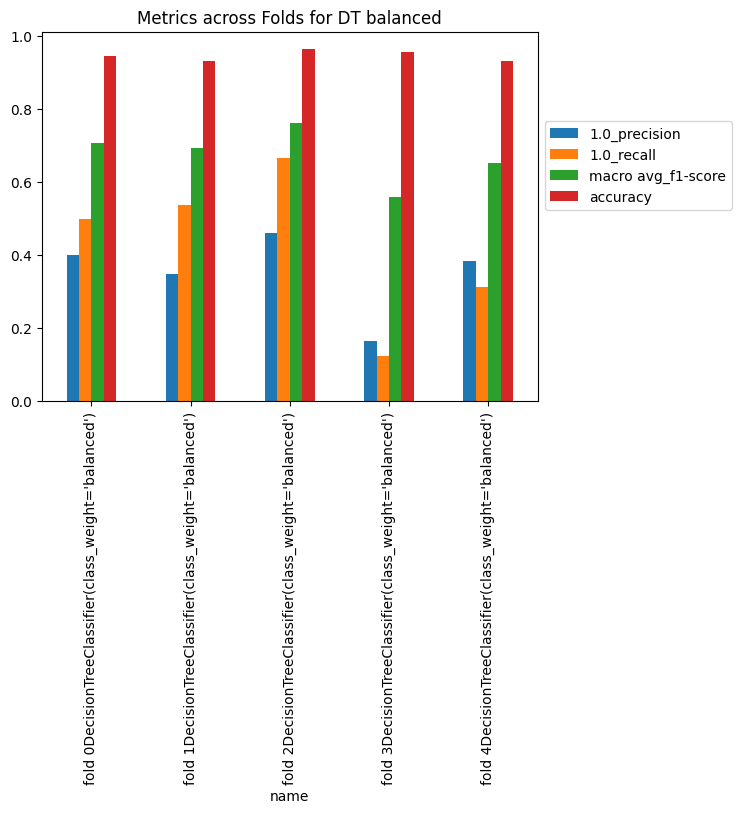

In [ ]:
plot_results(results6,'DT balanced')

For class 0.0 , precision ranges between 0.95 to 0.99 indicating that when the model predicts class 0.0 it's accurate in its predictions. For class 1.0 presicion ratings from 0.23 to 0.62, suggetsing that the model can not predict correct for class 1.0. Class 0.0's recall ranges between 0.96 to 0.99, showing that the model identifies most of the actual class 0.0 instances. Class 1.0's recall varies from 0.23 to 0.62 indicating differing abilities to capture class 1.0 instances across folds.F1-scores are high reflecting a good balance between presiscion and recall for class 0.0.For class 1.0 F1-scores are lower due to lower presicion and recall for this class. Also accuracy is very high  showing the overall correctness of the model's predictions.However, the accuracy might be influenced from the instances of the majority class.So, the model predicts well in predicting the majority class with high presicion,recal land F1-scores. For class 0.0 the model's performance is worse,where precision,recall and F1-scores are lower across folds.

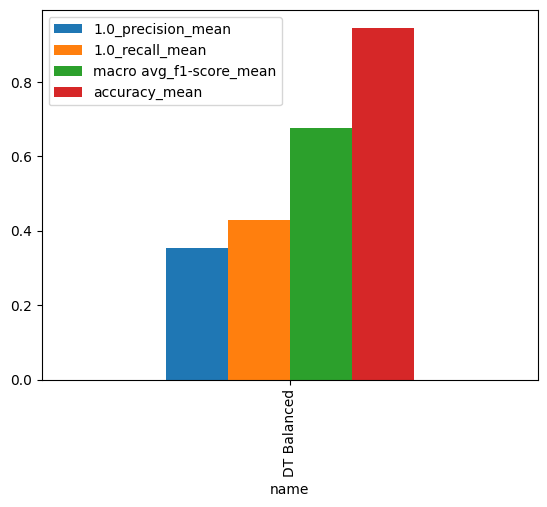

In [ ]:
mean_df6=mean_of_folds(results6,'DT Balanced')
mean6=plot_mean_of_folds(mean_df6)

In [ ]:
results7=KFold_fnc(tree.DecisionTreeClassifier( class_weight={0:0.1, 1:0.9}))

Fold 0 :
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       269
         1.0       0.64      0.64      0.64        11

    accuracy                           0.97       280
   macro avg       0.81      0.81      0.81       280
weighted avg       0.97      0.97      0.97       280

Fold 1 :
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       269
         1.0       0.58      0.64      0.61        11

    accuracy                           0.97       280
   macro avg       0.78      0.81      0.80       280
weighted avg       0.97      0.97      0.97       280

Fold 2 :
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       269
         1.0       0.50      0.45      0.48        11

    accuracy                           0.96       280
   macro avg       0.74      0.72      0.73       280
weighted avg       0.96      0.96      0.96    

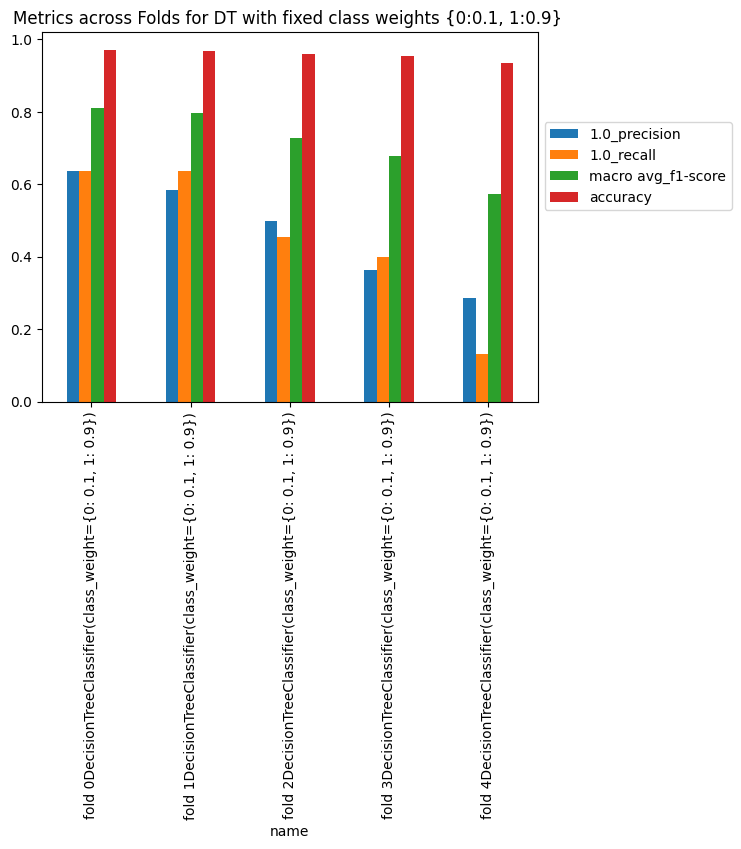

In [ ]:
plot_results(results7,'DT with fixed class weights {0:0.1, 1:0.9} ')

Precision,Recall ,F1-score for class 0.0:
  Presicion values from 0.95 to 0.99

indicating accurate predictions whebn the model identifies this class.
  Recall values are also high indicating that the model captures most actual instances of class 0.0
  F1-scores are also high.


Presicion,Recall F1-score for class 1.0:





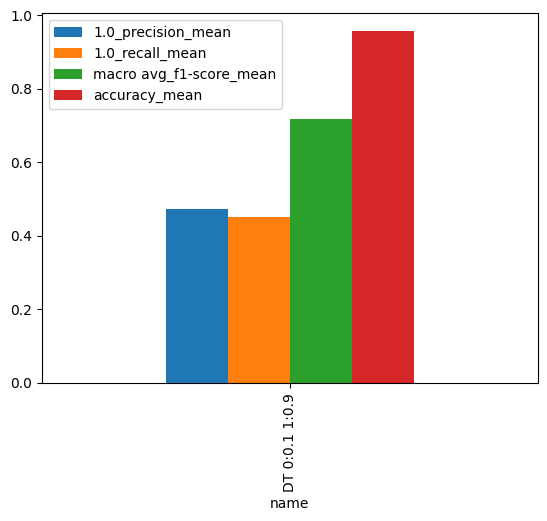

In [ ]:
mean_df7=mean_of_folds(results7,'DT 0:0.1 1:0.9')
mean7=plot_mean_of_folds(mean_df7)

In [ ]:
results8=KFold_fnc(tree.DecisionTreeClassifier( class_weight={0:0.05, 1:0.95}))

Fold 0 :
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       269
         1.0       0.33      0.36      0.35        11

    accuracy                           0.95       280
   macro avg       0.65      0.67      0.66       280
weighted avg       0.95      0.95      0.95       280

Fold 1 :
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       268
         1.0       0.60      0.50      0.55        12

    accuracy                           0.96       280
   macro avg       0.79      0.74      0.76       280
weighted avg       0.96      0.96      0.96       280

Fold 2 :
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       270
         1.0       0.21      0.30      0.25        10

    accuracy                           0.94       280
   macro avg       0.59      0.63      0.61       280
weighted avg       0.95      0.94      0.94    

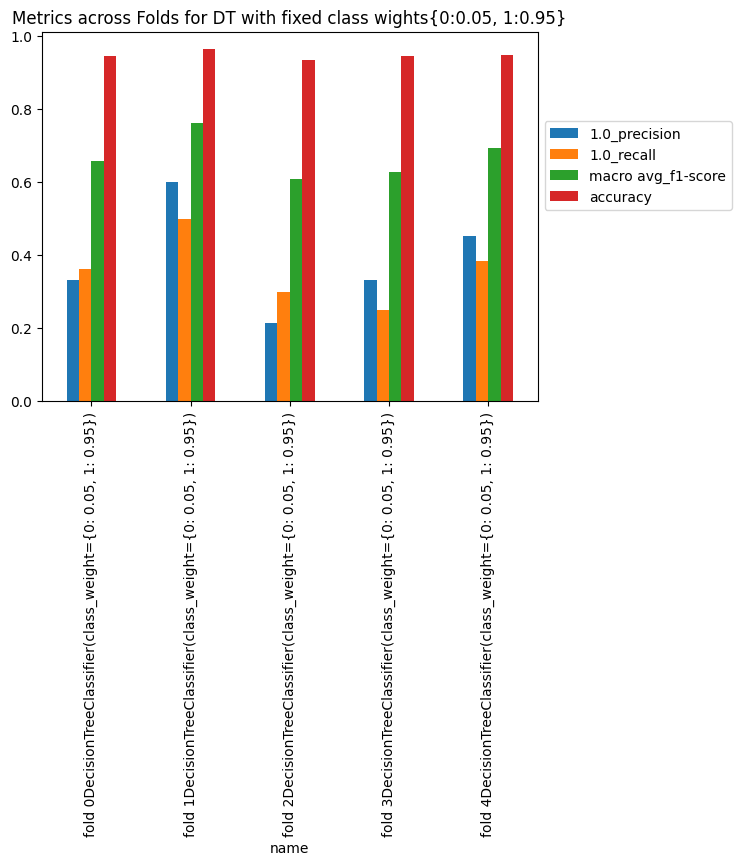

In [ ]:
plot_results(results8,'DT with fixed class wights{0:0.05, 1:0.95}')

For class 0.0 , precision ranges between 0.98 to 0.96 indicating that when the model predicts class 0.0 it's accurate in its predictions. For class 1.0 presicion ratings from 0.27 to 0.57, suggetsing that the model can not predict correct for class 1.0. Class 0.0's recall is very high, showing that the model identifies most of the actual class 0.0 instances. Class 1.0's recall is low indicating differing abilities to capture class 1.0 instances across folds.F1-scores are high reflecting a good balance between presiscion and recall for class 0.0.For class 1.0 F1-scores are lower due to lower presicion and recall for this class. Also accuracy is very high,( because it might be influenced by majority class)  showing the overall correctness of the model's predictions. So ,again the model can make very good prediction for class 0.0 but is not so accuarte for class 1.0

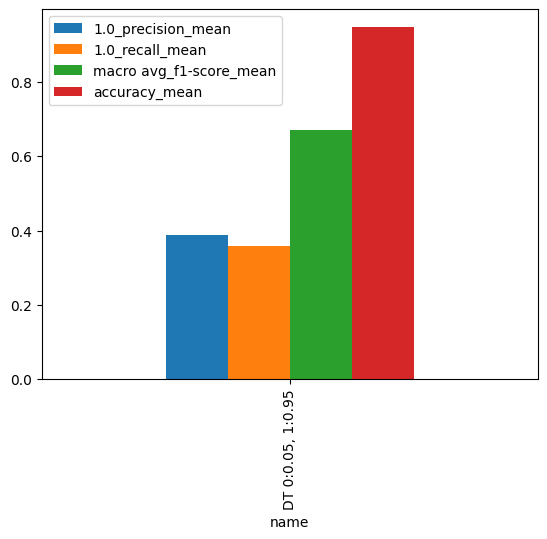

In [ ]:
mean_df8=mean_of_folds(results8,'DT 0:0.05, 1:0.95')
mean8=plot_mean_of_folds(mean_df8)

In [ ]:
results9=KFold_fnc(KN(weights='distance'))

Fold 0 :
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       273
         1.0       0.00      0.00      0.00         7

    accuracy                           0.97       280
   macro avg       0.49      0.50      0.49       280
weighted avg       0.95      0.97      0.96       280

Fold 1 :
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       273
         1.0       0.00      0.00      0.00         7

    accuracy                           0.96       280
   macro avg       0.49      0.49      0.49       280
weighted avg       0.95      0.96      0.96       280

Fold 2 :
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       265
         1.0       0.40      0.13      0.20        15

    accuracy                           0.94       280
   macro avg       0.68      0.56      0.59       280
weighted avg       0.92      0.94      0.93    

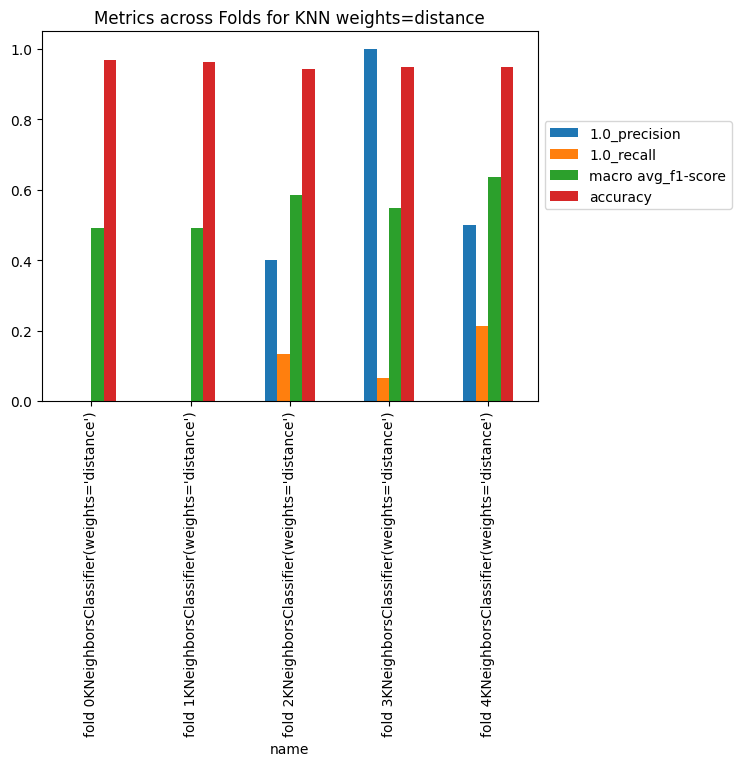

In [ ]:
plot_results(results9,'KNN weights=distance')

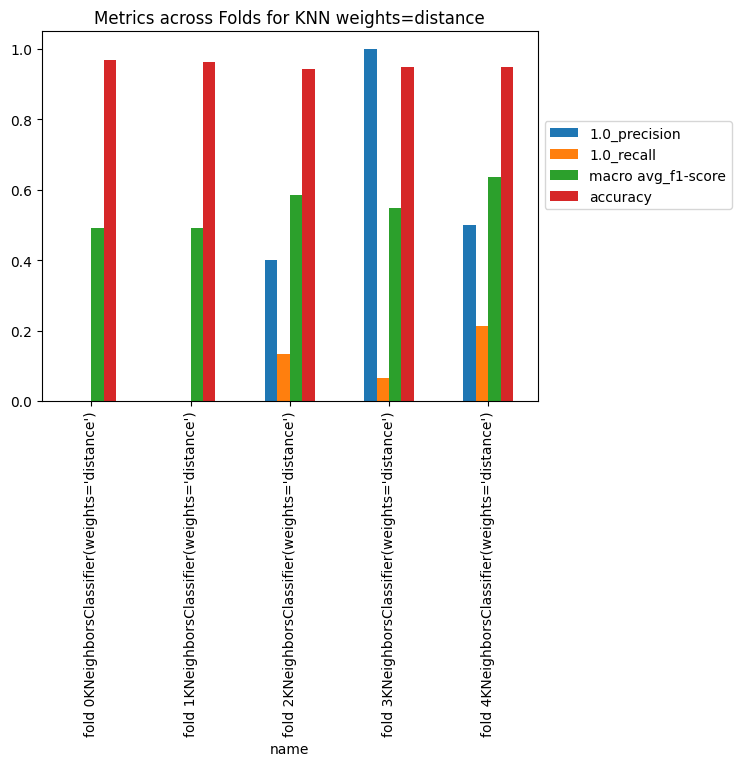

In [ ]:
plot_results(results9,'KNN weights=distance')

For class 0.0 presiscion and recall arae very high,indicating that when the model try to predict the non-oscar moovies is accuarate(0.94- 0.98) and when it tries to find  non-oscar moovies it identifies them correct(0.99-1.00). F1 -scores are also very high.
For class 1.0 precesion,recall and F1-scores are lower ,showing the poor abbillity of the model to identify and predict oscar-values.Accuracy is also high but driven by the accuarate predictiosn of the majority class.SO, in summary model performs consistenly well in predicting class 0.0 ,but it struggles with the minority class.

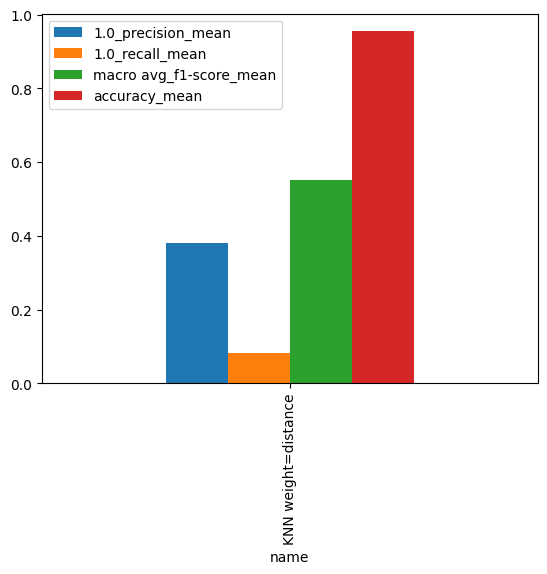

In [ ]:
mean_df9=mean_of_folds(results9,'KNN weight=distance')
mean9=plot_mean_of_folds(mean_df9)

In [ ]:
results10=KFold_fnc(GNB())

Fold 0 :
              precision    recall  f1-score   support

         0.0       1.00      0.30      0.47       269
         1.0       0.06      1.00      0.11        11

    accuracy                           0.33       280
   macro avg       0.53      0.65      0.29       280
weighted avg       0.96      0.33      0.45       280

Fold 1 :
              precision    recall  f1-score   support

         0.0       0.94      0.24      0.38       263
         1.0       0.06      0.76      0.11        17

    accuracy                           0.27       280
   macro avg       0.50      0.50      0.25       280
weighted avg       0.89      0.27      0.37       280

Fold 2 :
              precision    recall  f1-score   support

         0.0       1.00      0.22      0.36       269
         1.0       0.05      1.00      0.10        11

    accuracy                           0.25       280
   macro avg       0.53      0.61      0.23       280
weighted avg       0.96      0.25      0.35    

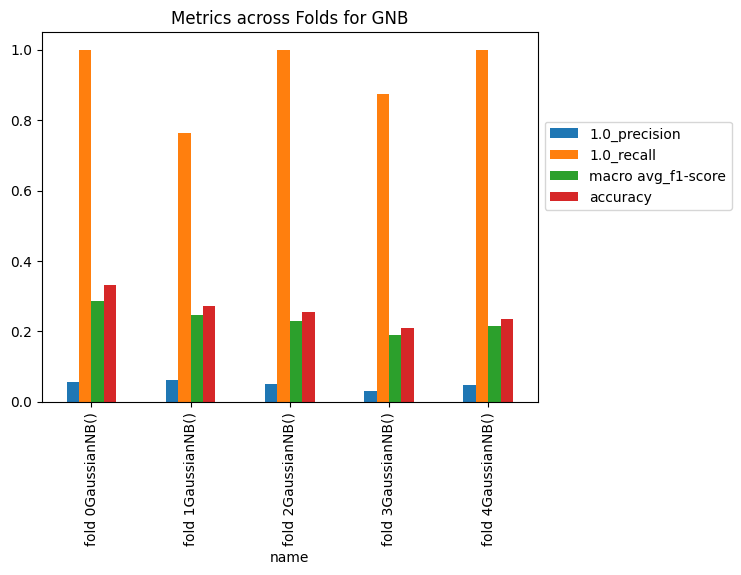

In [ ]:
plot_results(results10,'GNB')

Precision is high for Class 0.0, indicating a good ability to correctly identify this class when predicted. However, recall is significantly low, suggesting a high number of false negatives.This is because the model tries a lot to predict the instances of class 1.0(recall for this class is high)but it makes a lot of mistakes(very low presecion for class 1.0).So the model tries to predict non-oscar moovies with resut to predict few instances of class 0.0(recall of class 0.0 is very low). The presicion for class 0.0 is very high so if the model predict an instance of the dataset as a non-oscar moovie is very sure for this decesion. Accuracy is low , but maybe is influenced from the low recall for majority class.

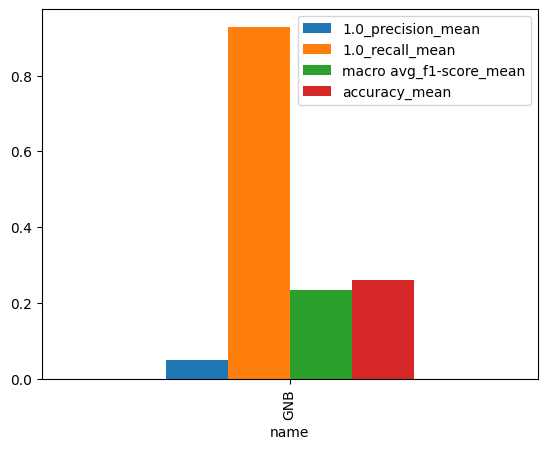

In [ ]:
mean_df10=mean_of_folds(results10,'GNB')
mean10=plot_mean_of_folds(mean_df10)

In [ ]:
results11=KFold_fnc(SVC(kernel="linear"))

Fold 0 :
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       263
         1.0       0.00      0.00      0.00        17

    accuracy                           0.94       280
   macro avg       0.47      0.50      0.48       280
weighted avg       0.88      0.94      0.91       280



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Fold 1 :
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       273
         1.0       1.00      0.14      0.25         7

    accuracy                           0.98       280
   macro avg       0.99      0.57      0.62       280
weighted avg       0.98      0.98      0.97       280

Fold 2 :
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       266
         1.0       0.33      0.14      0.20        14

    accuracy                           0.94       280
   macro avg       0.64      0.56      0.59       280
weighted avg       0.93      0.94      0.93       280

Fold 3 :
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       269
         1.0       0.45      0.45      0.45        11

    accuracy                           0.96       280
   macro avg       0.72      0.72      0.72       280
weighted avg       0.96      0.96      0.96    

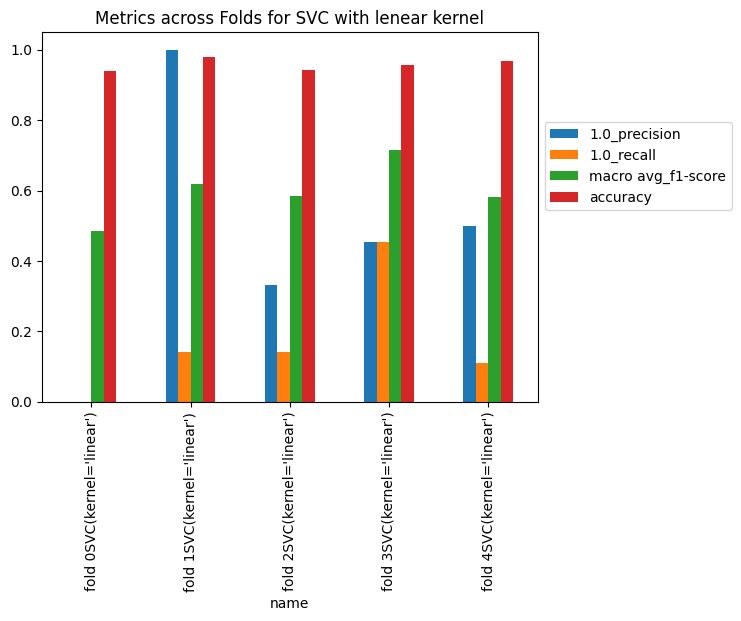

In [ ]:
plot_results(results11,'SVC with lenear kernel')

Pressicion ,Recall and F1-scores for class 0.0:
*   Pressicion values are high ,indicating accurate predisctions when the model identifies this class
*   Recall values are also high indicating thathe model captures most actual instances of this class
*   F1-scores are consistenly high showing a balance between presiscion and recall
---
Precesion ,Recall ,F1-scores for class 1.0:
*   Presicion is lower ,so teh model ha sa difficulty to predict accuarat ethe instances of this class.
*   Recall for this class is again low whicjh means taht the model can not distunguish well between the oscar moovies and no-oscar moovies.
*   F1-score is between 0.22-0.43 sowing a trade -off between recall and presicion for this class.
In summary the model identifies execellent the majority class ,but for the minority class does minor mistakes.



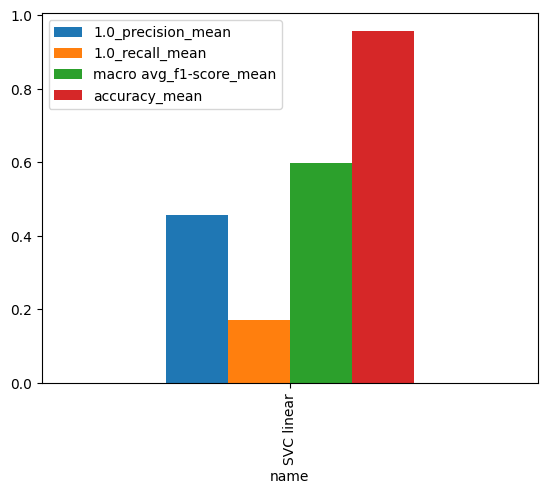

In [ ]:
mean_df11=mean_of_folds(results11,'SVC linear')
mean11=plot_mean_of_folds(mean_df11)

In [ ]:
results12=KFold_fnc(SVC(kernel="linear",class_weight={0:0.30,1:0.70}))

Fold 0 :
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       268
         1.0       0.50      0.33      0.40        12

    accuracy                           0.96       280
   macro avg       0.74      0.66      0.69       280
weighted avg       0.95      0.96      0.95       280

Fold 1 :
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       272
         1.0       0.26      0.62      0.37         8

    accuracy                           0.94       280
   macro avg       0.63      0.79      0.67       280
weighted avg       0.97      0.94      0.95       280

Fold 2 :
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       272
         1.0       0.33      0.25      0.29         8

    accuracy                           0.96       280
   macro avg       0.66      0.62      0.63       280
weighted avg       0.96      0.96      0.96    

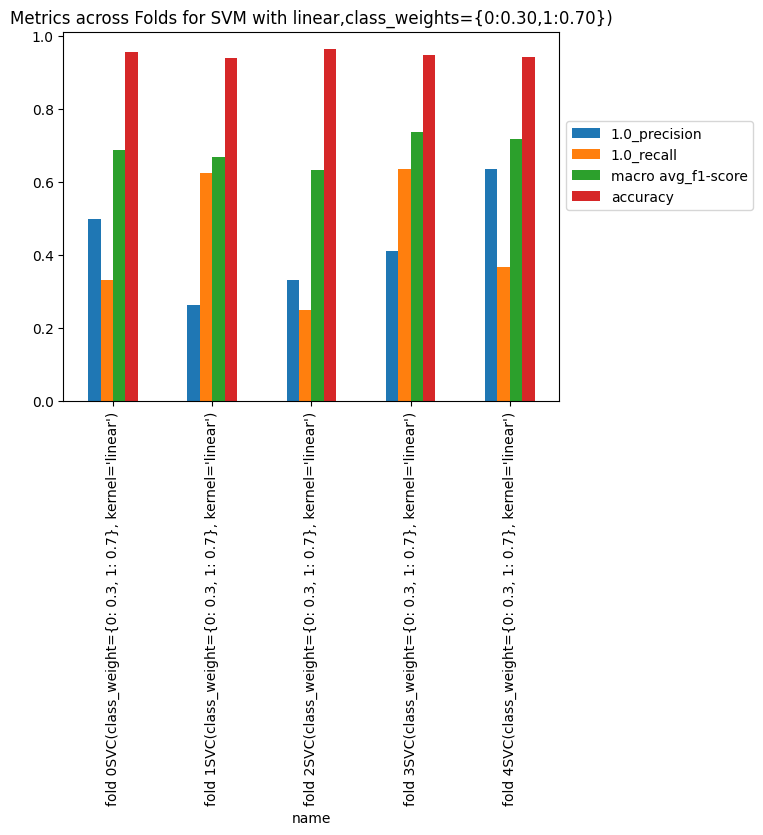

In [ ]:
plot_results(results12, 'SVM with linear,class_weights={0:0.30,1:0.70})')

Here we have also high presicion,recall,F1-scores high for class 0.0, indicating that the model can predict well for class 0.0.Presicion for class 1.0 ranges from low to moderate, indicating varying accuracy in identifying this class.Recall values for Class 1.0 also vary but generally range from 0.45 to 0.80, showing the model's ability to capture some of the actual instances ofthis class
F1-scores are good.Accuracy is also high across folds showing that the model can predict both classes well.

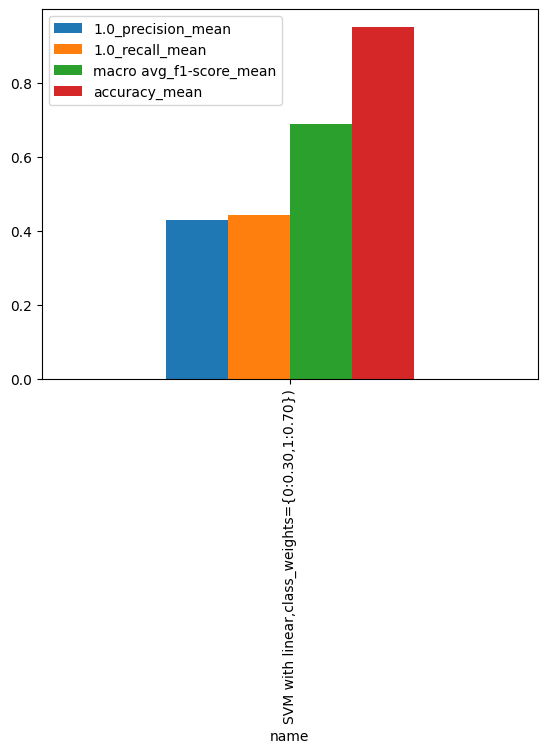

In [ ]:
mean_df12=mean_of_folds(results12,'SVM with linear,class_weights={0:0.30,1:0.70})')
mean12=plot_mean_of_folds(mean_df12)

In [ ]:
results13=KFold_fnc(SVC(kernel="poly",class_weight={0:0.30,1:0.70}))

Fold 0 :
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       266
         1.0       0.43      0.21      0.29        14

    accuracy                           0.95       280
   macro avg       0.69      0.60      0.63       280
weighted avg       0.93      0.95      0.94       280

Fold 1 :
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       270
         1.0       0.50      0.10      0.17        10

    accuracy                           0.96       280
   macro avg       0.73      0.55      0.57       280
weighted avg       0.95      0.96      0.95       280

Fold 2 :
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       267
         1.0       0.50      0.08      0.13        13

    accuracy                           0.95       280
   macro avg       0.73      0.54      0.55       280
weighted avg       0.94      0.95      0.94    

Presicion for class 0.0 is really high indicating that when the model tries to identify class 0.0 is accurate to its predictions.ALso, recall for this class ranges from  0.98-1.00 meaning that the model can predict almost perfect the instances of class 0.0 .Still for class 1.0 we get a  low presicion and recall, meaning that the model is not able to predict the instances of class 1.0.Accuracy is really high because of the high scores for class 0.0. F1-scores for class 0.0 are  high but for class 1.0 are low,showing again the poor performance of the model for class 1.0.

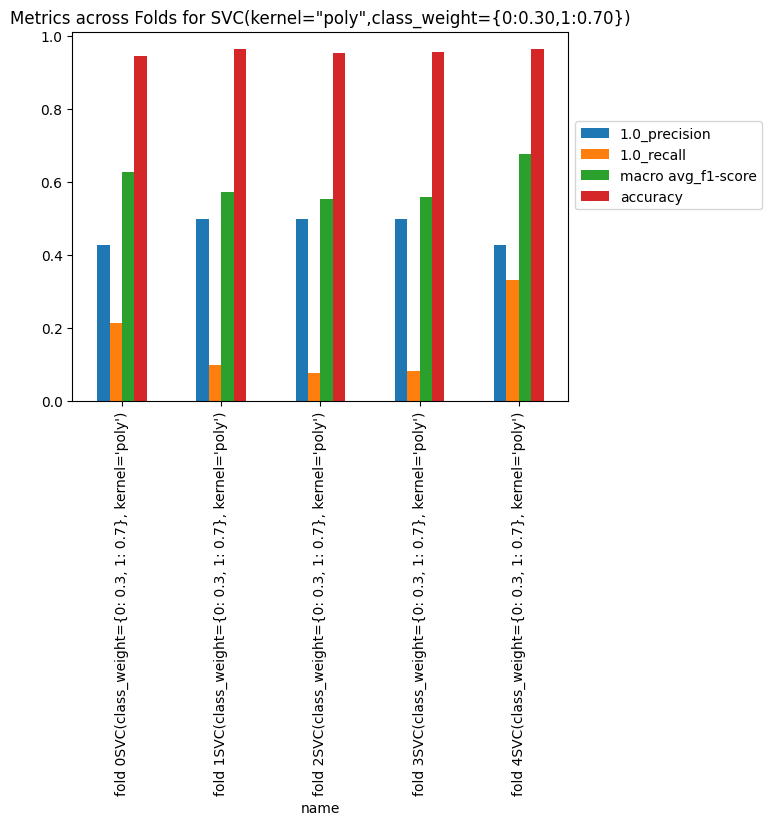

In [ ]:
plot_results(results13, 'SVC(kernel="poly",class_weight={0:0.30,1:0.70})')

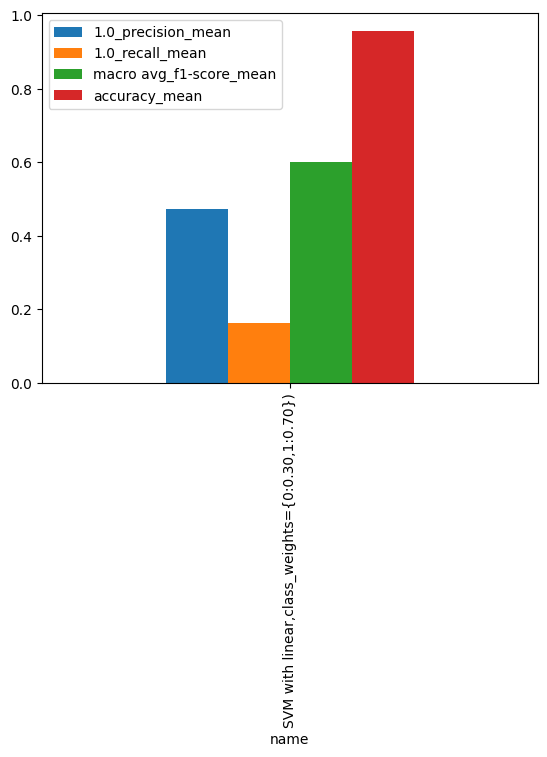

In [ ]:
mean_df13=mean_of_folds(results13,'SVM with linear,class_weights={0:0.30,1:0.70})')
mean13=plot_mean_of_folds(mean_df13)

In [ ]:
results14=KFold_fnc(SVC(kernel="rbf",class_weight={0:0.30,1:0.70}))

Fold 0 :
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       264
         1.0       0.00      0.00      0.00        16

    accuracy                           0.94       280
   macro avg       0.47      0.50      0.49       280
weighted avg       0.89      0.94      0.92       280

Fold 1 :
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       270
         1.0       0.00      0.00      0.00        10

    accuracy                           0.96       280
   macro avg       0.48      0.50      0.49       280
weighted avg       0.93      0.96      0.95       280

Fold 2 :
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       269
         1.0       0.00      0.00      0.00        11

    accuracy                           0.96       280
   macro avg       0.48      0.50      0.49       280
weighted avg       0.92      0.96      0.94    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Fold 3 :
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       272
         1.0       1.00      0.12      0.22         8

    accuracy                           0.97       280
   macro avg       0.99      0.56      0.60       280
weighted avg       0.98      0.97      0.97       280

Fold 4 :
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       267
         1.0       0.00      0.00      0.00        13

    accuracy                           0.95       280
   macro avg       0.48      0.50      0.49       280
weighted avg       0.91      0.95      0.93       280



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

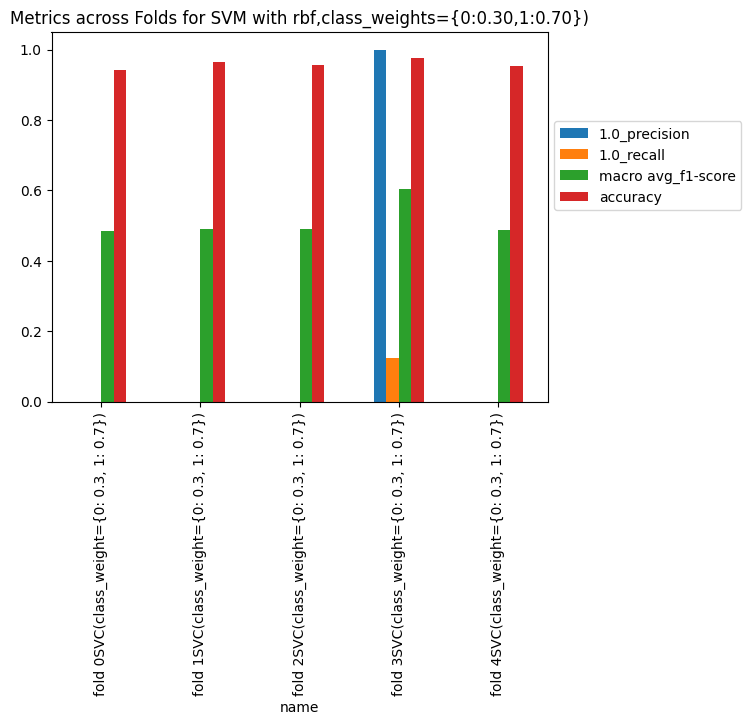

In [ ]:
plot_results(results14, 'SVM with rbf,class_weights={0:0.30,1:0.70})')

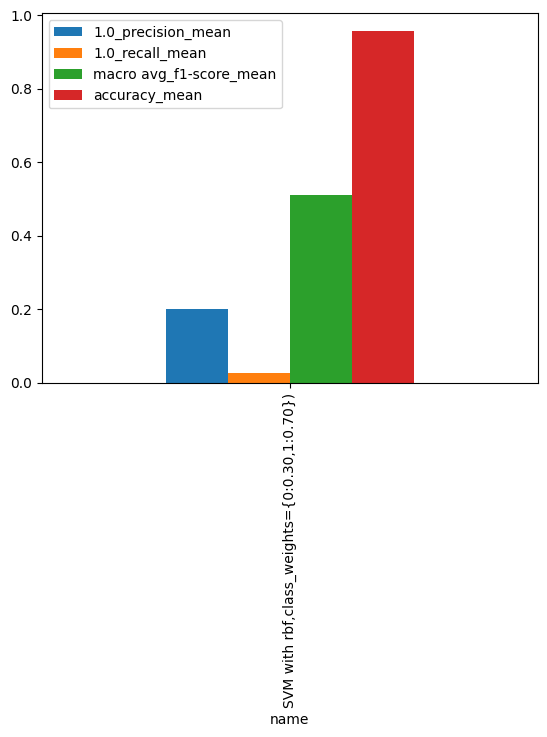

In [ ]:
mean_df14=mean_of_folds(results14,'SVM with rbf,class_weights={0:0.30,1:0.70})')
mean14=plot_mean_of_folds(mean_df14)

Presicion for class 0.0 is really high indicting that when the model tries to predict the class 0.0 is very accurate to its predictions. ALso, recall for class 0.0 is very high showing again that the model can find perfect all the instances of class 0.0. Presicion and recall for class 1.0 are 0 meaning the poor performance of the model to find and predict the instances for class 1.0. In fold 4 we get presicion for class 1.0 1.00 which means that the model is accurate to its predictions when tries to predict class 1.0 ,but we get a really low recall score.This shows that the model can only classifies few instances as class 1.0, being very confident for this desicion.F1-scores for clas 1.0 are mostly zero due to zero recall and presicion for this class. In the opposite F1-scores are really high for class 1.0. Accuracy is also high, but is influenced by majority class.

In [ ]:
results15=KFold_fnc(SVC(C=0.1,kernel="linear",gamma='scale'))

Fold 0 :
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       268
         1.0       0.33      0.08      0.13        12

    accuracy                           0.95       280
   macro avg       0.65      0.54      0.55       280
weighted avg       0.93      0.95      0.94       280

Fold 1 :
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       265
         1.0       0.00      0.00      0.00        15

    accuracy                           0.95       280
   macro avg       0.47      0.50      0.49       280
weighted avg       0.90      0.95      0.92       280

Fold 2 :
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       266
         1.0       0.00      0.00      0.00        14

    accuracy                           0.95       280
   macro avg       0.47      0.50      0.49       280
weighted avg       0.90      0.95      0.93    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

For class 0.0 we get really high scores of presicion,recall and F1-scores meaning that the model can identify and predict really perfect the instances of class 0.0. For class 1.0 still struggling to predict and identify them.

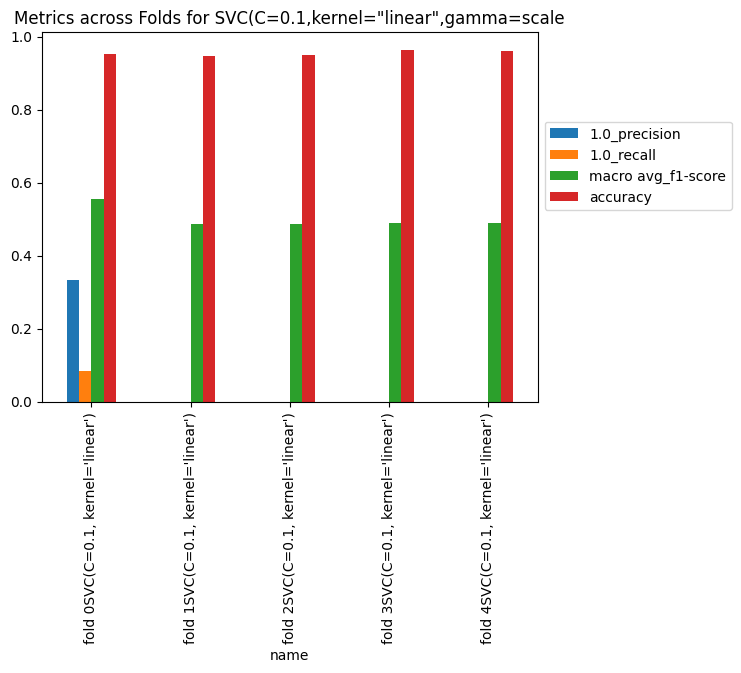

In [ ]:
plot_results(results15,'SVC(C=0.1,kernel="linear",gamma=scale')

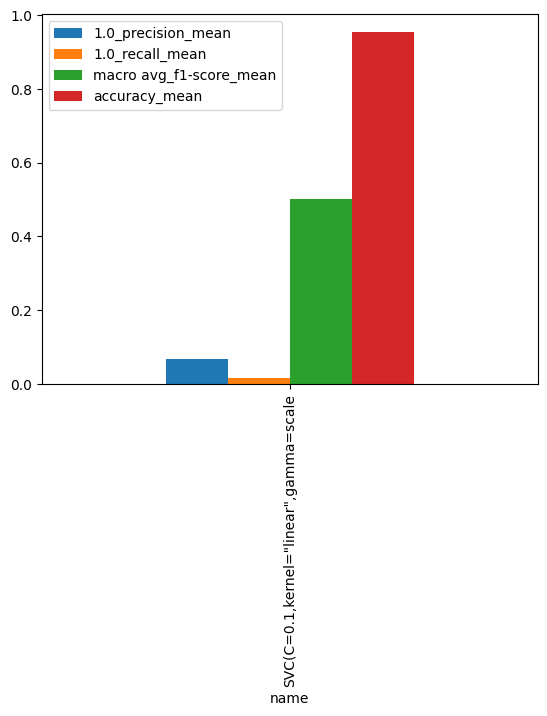

In [ ]:
mean_df15=mean_of_folds(results15,'SVC(C=0.1,kernel="linear",gamma=scale')
mean15=plot_mean_of_folds(mean_df15)

In [ ]:
results16=KFold_fnc(SVC(C=0.1,kernel="linear",gamma='auto'))

Fold 0 :
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       273
         1.0       0.00      0.00      0.00         7

    accuracy                           0.97       280
   macro avg       0.49      0.50      0.49       280
weighted avg       0.95      0.97      0.96       280

Fold 1 :
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       271
         1.0       1.00      0.11      0.20         9

    accuracy                           0.97       280
   macro avg       0.99      0.56      0.59       280
weighted avg       0.97      0.97      0.96       280

Fold 2 :
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       262
         1.0       0.00      0.00      0.00        18

    accuracy                           0.94       280
   macro avg       0.47      0.50      0.48       280
weighted avg       0.88      0.94      0.90    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Presicion, recall, and F1-scores(between 0.95-1.00) are high indicating that the model's performance for class 0.0 is almost perfect.For class 1.0 presicion, recall and F1-scores are low or zero, indicating the poor performance of the model to predict the class 1.0. For the folds where presisicon for class 1.0 is high we have a very low recall.This shows that the models struggles to find the instances of class 1.0,but when finds an oscar moovie ,is very confident that has predict well.This happens only for the 7% of the instances of class 1.0Accuracy is high due to high presicon and recall values for class 0.0.

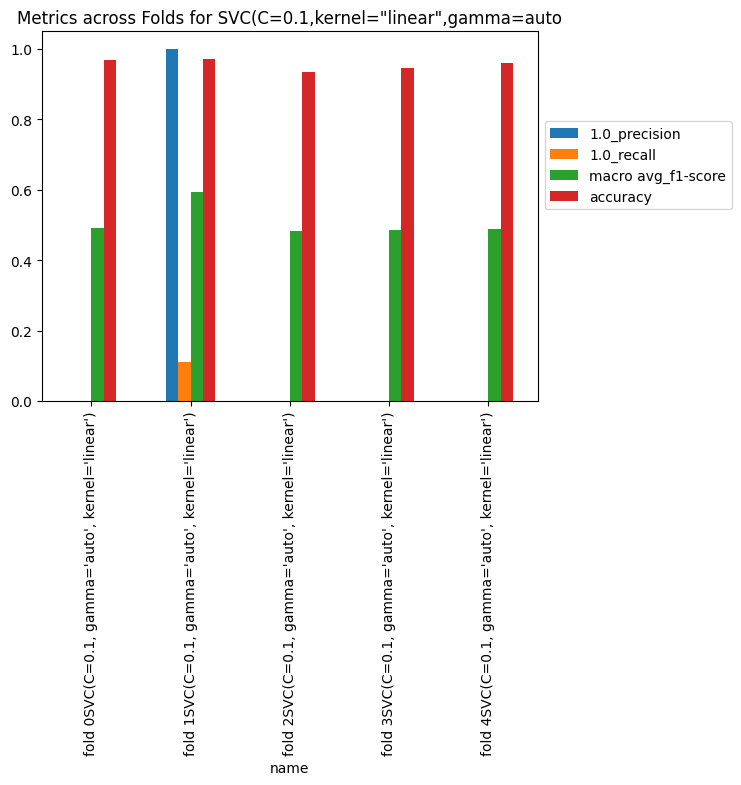

In [ ]:
plot_results(results16,'SVC(C=0.1,kernel="linear",gamma=auto')

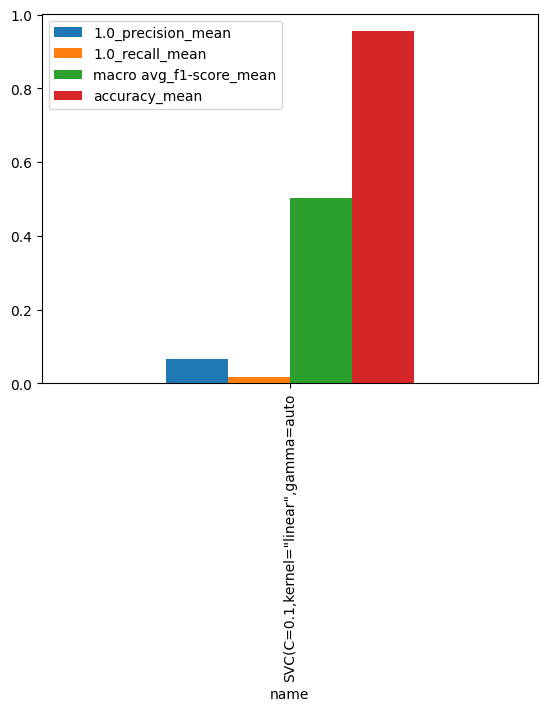

In [ ]:
mean_df16=mean_of_folds(results15,'SVC(C=0.1,kernel="linear",gamma=auto')
mean16=plot_mean_of_folds(mean_df16)

**Plotting the mean of metrics across folds**

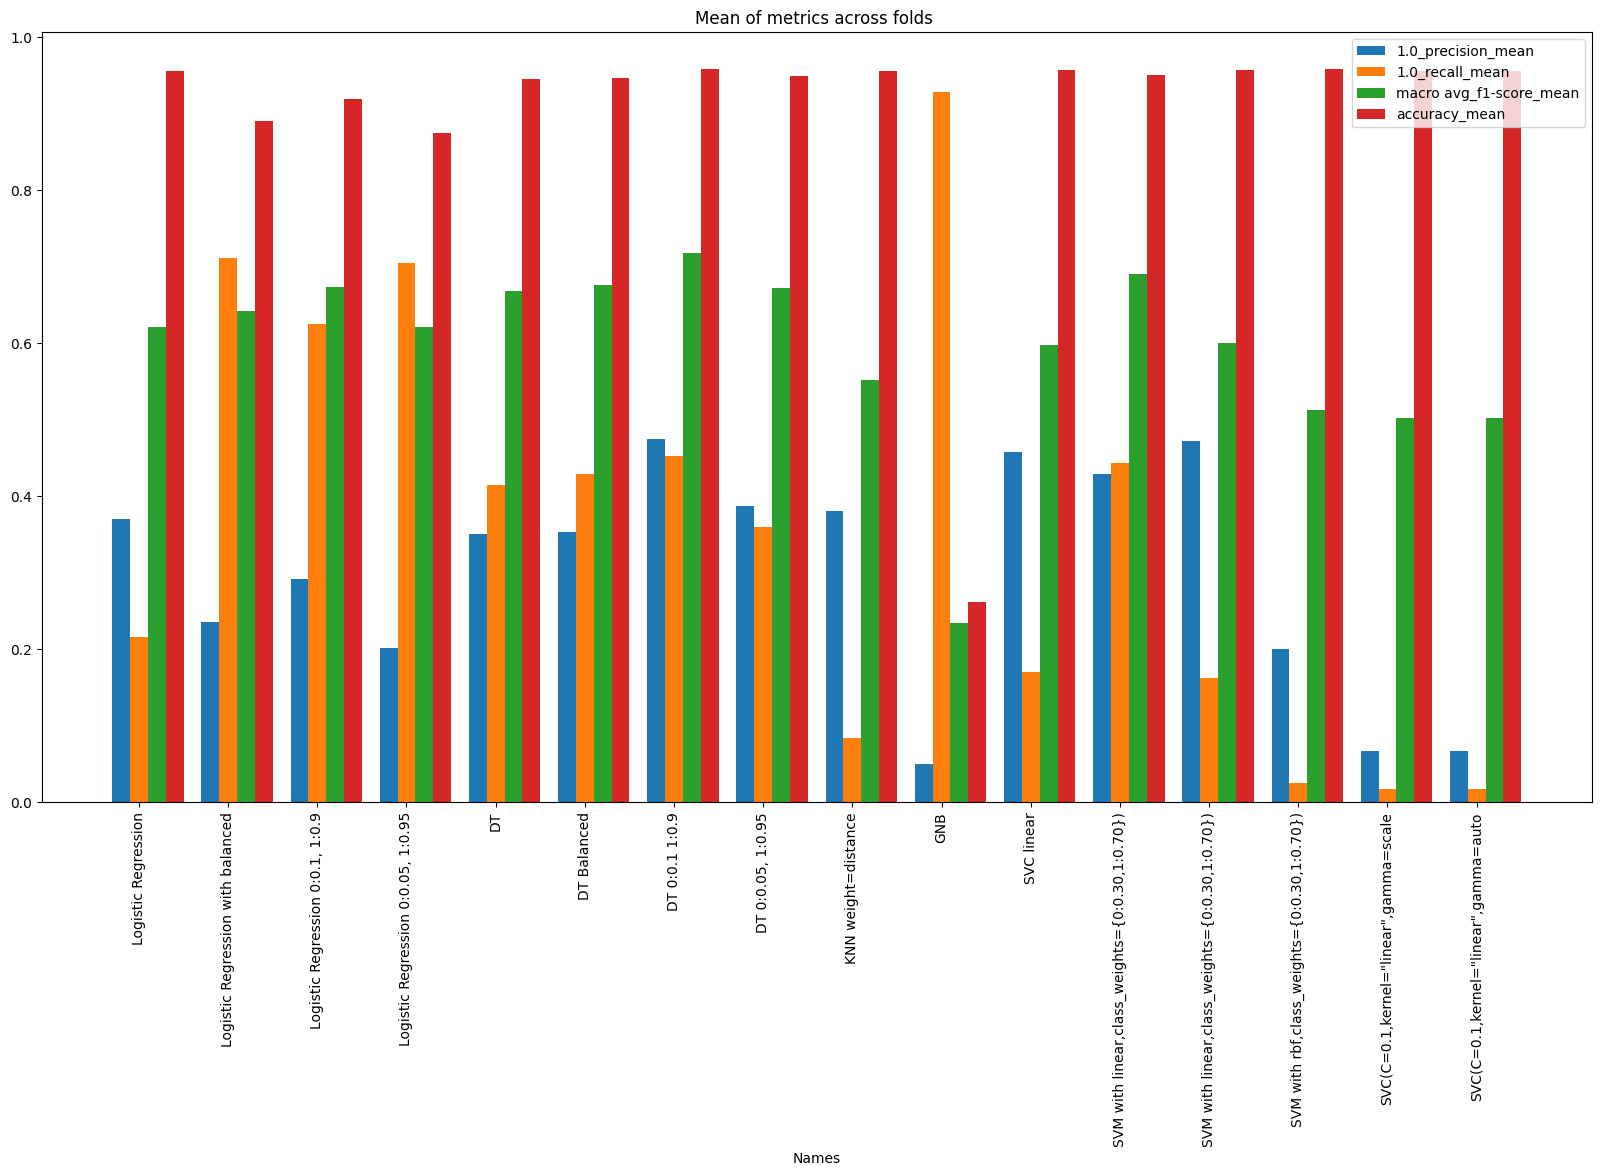

In [ ]:
df_mean_folds_overall=pd.concat([mean_df1,mean_df2,mean_df3,mean_df4,mean_df5,mean_df6,mean_df7,mean_df8,mean_df9,mean_df10,mean_df11,mean_df12,mean_df13,mean_df14,mean_df15,mean_df16])
#print(df_mean_folds_overall)
plt.figure(figsize=(20,10))
indices=range(len(df_mean_folds_overall))
#print(indices)
bar_width=0.2

for i,col in enumerate(['1.0_precision_mean', '1.0_recall_mean', 'macro avg_f1-score_mean', 'accuracy_mean']):
  #print(i,col)
  plt.bar([ind+(i*bar_width) for ind in indices],df_mean_folds_overall[col],width=bar_width,label=col)

plt.xlabel('Names')
plt.xticks([ind + bar_width for ind in indices],df_mean_folds_overall['name'],rotation=90)
plt.legend()
plt.title('Mean of metrics across folds ')
plt.show()


After the 5-cross-fold validation we could say again, that the Desicion Tree Classifier and it's variations performs the best metrics.Presicion and recall for class 1.0 have not so mauch difference meaning that the model cam predict instances of class 1.0 correct.Accuracy and F1-scores are high.

##3.11 Undersampling

We try to get high scores on presicion and recall metrics.So we apply the undersampling technique for minority class(0:non-oscar values) hopping to get the wanted results. We apply undersampling only on training data beacuse after that we want to test the model on unseen imbalanced data(test-data).



In [ ]:
X_train

array([[-1.29537692, -0.03023269, -0.17905764, ..., -0.2773501 ,
        -0.198082  , -0.03196014],
       [-0.34918856,  0.65963578,  0.39784   , ..., -0.2773501 ,
        -0.198082  , -0.03196014],
       [-0.34918856,  0.33285598,  0.22477071, ..., -0.2773501 ,
        -0.198082  , -0.03196014],
       ...,
       [-0.66458468,  0.36916485,  0.51321953, ..., -0.2773501 ,
        -0.198082  , -0.03196014],
       [-0.66458468, -0.06654156, -0.06367811, ..., -0.2773501 ,
        -0.198082  , -0.03196014],
       [ 1.54318816, -1.30104303, -1.3905427 , ..., -0.2773501 ,
        -0.198082  , -0.03196014]])

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
#Initialize the RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy=0.5,random_state=42) #keep same size of non_oscar and oscar moovies
#try to predict class 1  with sampling_strategy=1
# Fit and undersample only the training data
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)


In [ ]:
type(X_train_resampled), type(y_train_resampled)

(numpy.ndarray, pandas.core.series.Series)

In [ ]:
df[df['oscar_winners'] == 1].shape

(58, 48)

In [ ]:
X_train_resampled.shape, y_train_resampled.shape

((132, 47), (132,))

In [ ]:
type(X_train_resampled), type(y_train_resampled)

(numpy.ndarray, pandas.core.series.Series)

### 3.10.1 Logistic Regression Model

####3.11.1.1 Simple Logistic Regression Model

In [ ]:
lr1_u=LogisticRegression()
lr1_u.fit(X_train_resampled,y_train_resampled)
y_pred=lr1_u.predict(X_test)
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
lr_class_report_balanced=metrics.classification_report(y_test,y_pred, output_dict=True)
lr_class_report_balanced['name']='Logistic Regression(bd)'


Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.83      0.91       406
         1.0       0.15      0.86      0.26        14

    accuracy                           0.84       420
   macro avg       0.57      0.85      0.58       420
weighted avg       0.97      0.84      0.89       420



####3.11.1.2 Logistic regression model with balanced class weights

In [ ]:
lr2_u=LogisticRegression(class_weight="balanced")
lr2_u.fit(X_train_resampled,y_train_resampled)
y_pred=lr2_u.predict(X_test)
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
lr_class_report_balanced_balanced=metrics.classification_report(y_test,y_pred, output_dict=True)
lr_class_report_balanced_balanced['name']='Logistic Regression Balanced(bd)'


Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.79      0.88       406
         1.0       0.12      0.86      0.22        14

    accuracy                           0.79       420
   macro avg       0.56      0.82      0.55       420
weighted avg       0.96      0.79      0.86       420



####3.11.1.3 Logistic Regression model with Fixed class weights

In [ ]:
lr3_u=LogisticRegression(class_weight={0:0.1, 1:0.9})
lr3_u.fit(X_train_resampled,y_train_resampled)
y_pred=lr3_u.predict(X_test)
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
lr_class_report_class_weights_1_balanced=metrics.classification_report(y_test,y_pred, output_dict=True)
lr_class_report_class_weights_1_balanced['name']='Logistic Regression with custom class_weights_1(bd)'

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.67      0.80       406
         1.0       0.09      0.93      0.16        14

    accuracy                           0.68       420
   macro avg       0.54      0.80      0.48       420
weighted avg       0.97      0.68      0.78       420



In [ ]:
lr4_u=LogisticRegression(class_weight={0:0.5, 1:0.95})
lr4_u.fit(X_train_resampled,y_train_resampled)
y_pred=lr4_u.predict(X_test)
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
lr_class_report_class_weights_2_balanced=metrics.classification_report(y_test,y_pred, output_dict=True)
lr_class_report_class_weights_2_balanced['name']='Logistic Regression with custom weights 2(bd) '


Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.80      0.89       406
         1.0       0.13      0.86      0.22        14

    accuracy                           0.80       420
   macro avg       0.56      0.83      0.56       420
weighted avg       0.97      0.80      0.86       420



###3.11.2 Desicion Tree Classifier

####3.11.2.1 Simple Desicion Tree Classifier

In [ ]:
dt1_u=tree.DecisionTreeClassifier() #trying to get hiqh recall fro class oscar_winners
dt1_u.fit(X_train_resampled,y_train_resampled) #fit
y_pred=dt1_u.predict(X_test) #predict
print("Classification report\n",metrics.classification_report(y_test,y_pred))
dt_class_report_balanced=metrics.classification_report(y_test,y_pred,output_dict=True)
dt_class_report_balanced['name']='DT clf (bd)'


Classification report
               precision    recall  f1-score   support

         0.0       0.98      0.81      0.89       406
         1.0       0.09      0.57      0.16        14

    accuracy                           0.80       420
   macro avg       0.54      0.69      0.52       420
weighted avg       0.95      0.80      0.86       420



####3.11.2.2 Balanced Desicion Tree Classifier

In [ ]:
dt2_u=tree.DecisionTreeClassifier( class_weight='balanced') #trying to get hiqher recall and presiocn for class oscar_winners
dt2_u.fit(X_train_resampled,y_train_resampled)
y_pred=dt2_u.predict(X_test) #predict
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
dt_class_custom_balanced_report_balanced=metrics.classification_report(y_test,y_pred, output_dict=True)
dt_class_custom_balanced_report_balanced['name']='DT balanced(bd)'
#dt_class_custom_weights1_report

Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.81      0.88       406
         1.0       0.08      0.50      0.14        14

    accuracy                           0.80       420
   macro avg       0.53      0.65      0.51       420
weighted avg       0.95      0.80      0.86       420



####3.11.2.3 Weighted Class Desicion Tree Classifier

In [ ]:
dt3_u=tree.DecisionTreeClassifier( class_weight={0:0.1, 1:0.9}) #trying to get hiqher recall and presiocn for class oscar_winners
dt3_u.fit(X_train_resampled,y_train_resampled) #fit
y_pred=dt3_u.predict(X_test) #predict
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
dt_class_custom_weights1_report_balanced=metrics.classification_report(y_test,y_pred, output_dict=True)
dt_class_custom_weights1_report_balanced['name']='DT custom_weights1 (bd)'
#dt_class_custom_weights1_report

Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.80      0.88       406
         1.0       0.09      0.57      0.15        14

    accuracy                           0.79       420
   macro avg       0.54      0.68      0.52       420
weighted avg       0.95      0.79      0.86       420



In [ ]:
dt4_u=tree.DecisionTreeClassifier( class_weight={0:0.05, 1:0.95}) #trying to get hiqher recall and presiocn for class oscar_winners
dt4_u.fit(X_train_resampled,y_train_resampled)
y_pred=dt4_u.predict(X_test) #predict
print("Classification report:\n",metrics.classification_report(y_test,y_pred))
dt_class_custom_weights2_report_balanced=metrics.classification_report(y_test,y_pred, output_dict=True)
dt_class_custom_weights2_report_balanced['name']='DT custom_weights2 (bd)'
#dt_class_custom_weights1_report

Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.78      0.87       406
         1.0       0.09      0.64      0.16        14

    accuracy                           0.78       420
   macro avg       0.54      0.71      0.52       420
weighted avg       0.95      0.78      0.85       420



###3.11.3 KNN

####3.11.3.1  KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KN
knn_clf1_u=KN(weights='uniform') #trying to get hiqh recall fro class oscar_winners
knn_clf1_u.fit(X_train_resampled,y_train_resampled) #fit
print("Classification report\n",metrics.classification_report(y_test,y_pred))
knn_class_report_uniform_balanced=metrics.classification_report(y_test,y_pred, output_dict=True)
knn_class_report_uniform_balanced['name']='KNN_uniform (bd)'
#knn_class_report_uniform

Classification report
               precision    recall  f1-score   support

         0.0       0.98      0.78      0.87       406
         1.0       0.09      0.64      0.16        14

    accuracy                           0.78       420
   macro avg       0.54      0.71      0.52       420
weighted avg       0.95      0.78      0.85       420



####3.11.3.2Kneigbors Classifier with weigts='distance'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KN
knn_clf2_u=KN(weights='distance') #trying to get hiqh recall fro class oscar_winners
knn_clf2_u.fit(X_train_resampled,y_train_resampled) #fit
print("Classification report\n",metrics.classification_report(y_test,y_pred))
knn_class_report_dist_balanced=metrics.classification_report(y_test,y_pred, output_dict=True)
knn_class_report_dist_balanced['name']='KNN_distance (bd)'
#knn_class_report_dist

Classification report
               precision    recall  f1-score   support

         0.0       0.98      0.78      0.87       406
         1.0       0.09      0.64      0.16        14

    accuracy                           0.78       420
   macro avg       0.54      0.71      0.52       420
weighted avg       0.95      0.78      0.85       420



###3.11.4 GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB as GNB
gnb_clf_u=GNB() #trying to get hiqh recall fro class oscar_winners
gnb_clf_u.fit(X_train_resampled,y_train_resampled) #fit
y_pred=gnb_clf_u.predict(X_test)
#print(y_pred)
print("Classification report\n",metrics.classification_report(y_test,y_pred))
gnb_class_report_balanced=metrics.classification_report(y_test,y_pred, output_dict=True)
gnb_class_report_balanced['name']='GNB(bd)'
#gnb_class_report

Classification report
               precision    recall  f1-score   support

         0.0       0.99      0.41      0.58       406
         1.0       0.05      0.93      0.10        14

    accuracy                           0.43       420
   macro avg       0.52      0.67      0.34       420
weighted avg       0.96      0.43      0.56       420



###3.11.5 Support Vector Machines

####3.11.5.1 SVM with linear kernel

In [ ]:
from sklearn import svm
svm1_u=svm.SVC(kernel="linear")
svm1_u.fit(X_train_resampled,y_train_resampled)
#print(svm.predict(X_test))
print("CLassification report\n",metrics.classification_report(y_test,y_pred))
svm_class_report_balanced=metrics.classification_report(y_test,y_pred,output_dict=True)
svm_class_report_balanced['name']='SVM (bd)'
#plt.show(confusionMatrix_and_roc(svm1_u,X_test,y_test))
#svm_class_report


CLassification report
               precision    recall  f1-score   support

         0.0       0.99      0.41      0.58       406
         1.0       0.05      0.93      0.10        14

    accuracy                           0.43       420
   macro avg       0.52      0.67      0.34       420
weighted avg       0.96      0.43      0.56       420



####3.11.5.2 SVM algorithm with lenear kernel  and fixed class weights

In [ ]:
from sklearn.svm import SVC
svm2_u=SVC(kernel="linear",class_weight={0:0.30,1:0.70})
svm2_u.fit(X_train_resampled,y_train_resampled)
#print(svm.predict(X_test))
print("CLassification report\n",metrics.classification_report(y_test,y_pred))
svm_class_report_weights_balanced=metrics.classification_report(y_test,y_pred,output_dict=True)
svm_class_report_weights_balanced['name']='SVM fixed weights (bd)'


CLassification report
               precision    recall  f1-score   support

         0.0       0.99      0.41      0.58       406
         1.0       0.05      0.93      0.10        14

    accuracy                           0.43       420
   macro avg       0.52      0.67      0.34       420
weighted avg       0.96      0.43      0.56       420



####3.11.5.3 SVM algorithm with polynomial kernel and fixed class weights

In [ ]:
svm3_u=SVC(kernel="poly",class_weight={0:0.30,1:0.70})
svm3_u.fit(X_train_resampled,y_train_resampled)
#print(svm.predict(X_test))
print("CLassification report\n",metrics.classification_report(y_test,y_pred))
svm_class_report_weights_poly_balanced=metrics.classification_report(y_test,y_pred,output_dict=True)
svm_class_report_weights_poly_balanced['name']='SVM class_weights, polynomial kernel(bd)'

CLassification report
               precision    recall  f1-score   support

         0.0       0.99      0.41      0.58       406
         1.0       0.05      0.93      0.10        14

    accuracy                           0.43       420
   macro avg       0.52      0.67      0.34       420
weighted avg       0.96      0.43      0.56       420



####3.11.5.4 SVM algorithm with rbf kernel and fixed class weights

In [ ]:
svm4_u=SVC(kernel="rbf",class_weight={0:0.30,1:0.70})
svm4_u.fit(X_train_resampled,y_train_resampled)
#print(svm.predict(X_test))
print("CLassification report\n",metrics.classification_report(y_test,y_pred))
svm_class_report_weights_rbf_balanced=metrics.classification_report(y_test,y_pred,output_dict=True)
svm_class_report_weights_rbf_balanced['name']='SVM weight_class and rbf kernel in balanced dstaset'
#svm_class_report_weights

CLassification report
               precision    recall  f1-score   support

         0.0       0.99      0.41      0.58       406
         1.0       0.05      0.93      0.10        14

    accuracy                           0.43       420
   macro avg       0.52      0.67      0.34       420
weighted avg       0.96      0.43      0.56       420



####3.11.5.5 SVM algorithm wit linear kernel ,C=0 1, gamma='scale'

In [ ]:
svm5_u=SVC(C=0.1,kernel="linear",gamma='scale')
svm5_u.fit(X_train_resampled,y_train_resampled)
#print(svm.predict(X_test))
print("CLassification report\n",metrics.classification_report(y_test,y_pred))
svm_class_report_weights_gamma_scale_balanced=metrics.classification_report(y_test,y_pred,output_dict=True)
svm_class_report_weights_gamma_scale_balanced['name']='SVM with C=0.1,gamma=scale,kernel=linear(bd)'

CLassification report
               precision    recall  f1-score   support

         0.0       0.99      0.41      0.58       406
         1.0       0.05      0.93      0.10        14

    accuracy                           0.43       420
   macro avg       0.52      0.67      0.34       420
weighted avg       0.96      0.43      0.56       420



####3.11.5.6 SVM algoriyhm with linear kernel ,C=0.1, gamma='auto

In [ ]:
svm6_u=SVC(C=0.1,kernel="linear",gamma='auto')
svm6_u.fit(X_train,y_train)
#print(svm.predict(X_test))
print("CLassification report\n",metrics.classification_report(y_test,y_pred))
svm_class_report_weights_gamma_auto_balanced=metrics.classification_report(y_test,y_pred,output_dict=True)
svm_class_report_weights_gamma_auto_balanced['name']='SVM with C=0.1 and gamma=auto(bd)'


CLassification report
               precision    recall  f1-score   support

         0.0       0.99      0.41      0.58       406
         1.0       0.05      0.93      0.10        14

    accuracy                           0.43       420
   macro avg       0.52      0.67      0.34       420
weighted avg       0.96      0.43      0.56       420



###3.11.7 Collect all metrics in a dataset and plot

In [ ]:
undersampling_df=pd.DataFrame([flatten_dict(lr_class_report_balanced),
                               flatten_dict(lr_class_report_balanced_balanced),
                               flatten_dict(lr_class_report_class_weights_1_balanced),
                               flatten_dict(lr_class_report_class_weights_2_balanced),

                               flatten_dict(dt_class_report_balanced),
                               flatten_dict(dt_class_custom_balanced_report_balanced),
                               flatten_dict(dt_class_custom_weights1_report_balanced),
                               flatten_dict(dt_class_custom_weights2_report_balanced),

                               flatten_dict(knn_class_report_uniform_balanced),
                               flatten_dict(knn_class_report_dist_balanced),

                               flatten_dict(gnb_class_report_balanced),

                               flatten_dict(svm_class_report_balanced),
                               flatten_dict(svm_class_report_weights_balanced),
                               flatten_dict(svm_class_report_weights_poly_balanced),
                               flatten_dict(svm_class_report_weights_rbf_balanced),
                               flatten_dict(svm_class_report_weights_gamma_scale_balanced),
                               flatten_dict(svm_class_report_weights_gamma_auto_balanced),
                               ])
#undersampling_df

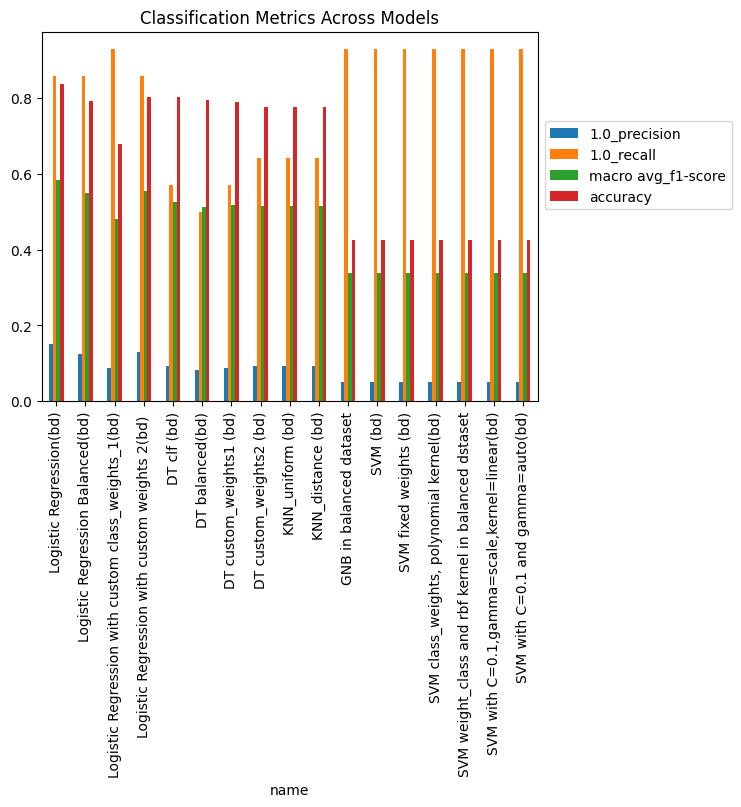

In [ ]:
#plt.figure(figsize=(9000,58))
undersampling_df.plot(x="name",y=['1.0_precision','1.0_recall','macro avg_f1-score','accuracy'], kind="bar")
plt.title('Classification Metrics Across Models')
plt.legend(loc='lower left',bbox_to_anchor=(1,0.5))
plt.show()

From the figure,we observe that the Logistic Regression algorithm,the Desicion Tree Classifier with custom weights_1 and the Logistic Regression with balance class weights have the best results. The precision of class 1 is the highest, and also has a high recall.

In [ ]:
#combine 3 best classifiers
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_validate
clf1=LogisticRegression()
clf2=tree.DecisionTreeClassifier( class_weight={0:0.1, 1:0.9})
clf3=LogisticRegression(class_weight='balanced')
eclf2=VotingClassifier(estimators=[('lr',clf1),('dt_w',clf2),('lr_b',clf3)],voting='hard')
eclf2.fit(X_train,y_train)
pred=eclf2.predict(X_test)
scores = cross_validate(eclf2, X_train, y_train, scoring=('accuracy','precision','recall'), cv=5)
print("Accuracy: %0.2f  [%s]" % (scores['test_accuracy'].mean(), 'Enseble'))
print("Presicion: %0.2f  [%s]" % (scores['test_precision'][2].mean(), 'Enseble'))
print("Recall: %0.2f  [%s]" % (scores['test_recall'][2].mean(), 'Enseble'))
#print(scores['test_recall'])

Accuracy: 0.96  [Enseble]
Presicion: 0.58  [Enseble]
Recall: 0.78  [Enseble]


The voting classifier gives a high presicion ,along with a high recall,meaning that the voting classifier has strong abbillieties to find all moovies and classifies them correct.

#4.Data Cleaning of test set

##4.1 Load Datatset

In [ ]:
df_test= pd.read_excel('movies_test _anon.xlsx') #load datatset
df_test

#df = pd.read_excel('movies.xlsx') #load datatset
#df

ID Film  Year          Script Type Rotten Tomatoes  critics  \
0      1  ???  2019  original screenplay                       73   
1      2  ???  2022                  NaN                       40   
2      3  ???  2019               sequel                       32   
3      4  ???  2022                  NaN                       70   
4      5  ???  2018               remake                       86   
..   ...  ...   ...                  ...                      ...   
560  561  ???  2018  original screenplay                       98   
561  562  ???  2021                  NaN                       72   
562  563  ???  2020           adaptation                       67   
563  564  ???  2021                  NaN                       80   
564  565  ???  2019  original screenplay                       10   

    Metacritic  critics Average critics   Rotten Tomatoes Audience   \
0                     -                -                         80   
1                     -               40                         84   
2                    40               36                         94   
3                    60               65                         73   
4                    42               64                         70   
..                  ...              ...                        ...   
560                  90               94                         86   
561                  62               67                         76   
562                  56               62                         71   
563                  50               65                         97   
564                  19               15                         37   

    Metacritic Audience  Rotten Tomatoes vs Metacritic  deviance  \
0                      -                                       -   
1                      -                                       -   
2                     66                                      28   
3                     66                                       7   
4                     44                                      26   
..                   ...                                     ...   
560                   84                                       2   
561                    -                                       -   
562                   64                                       7   
563                   65                                      32   
564                   42                                      -5   

    Average audience  Audience vs Critics deviance  Primary Genre  \
0                   -                             -           NaN   
1                  84                           -44        comedy   
2                  80                           -44           NaN   
3                  70                            -5         drama   
4                  57                             7           NaN   
..                ...                           ...           ...   
560                85                             9           NaN   
561                76                            -9       romance   
562                67                            -6        action   
563                81                           -16     adventure   
564                40                           -25           NaN   

                                       Genre Opening Weekend  \
0                                     action        21000000   
1                                     family         1399373   
2                                     comedy         8901419   
3                           fantasy, romance         2919717   
4                            romance, comedy        14711101   
..                                       ...             ...   
560                                    drama          263797   
561                                   comedy          801568   
562                                      NaN               -   
563                comedy, animation, 

##4.2 Datatype of columns and fix columns

In [ ]:
df_test.dtypes

ID                                           int64
Film                                        object
Year                                         int64
Script Type                                 object
Rotten Tomatoes  critics                    object
Metacritic  critics                         object
Average critics                             object
Rotten Tomatoes Audience                     int64
Metacritic Audience                         object
Rotten Tomatoes vs Metacritic  deviance     object
Average audience                            object
Audience vs Critics deviance                object
Primary Genre                               object
Genre                                       object
Opening Weekend                             object
Opening weekend ($million)                  object
Domestic Gross                              object
Domestic gross ($million)                   object
Foreign Gross ($million)                    object
Foreign Gross                  

In [ ]:
df_test.columns


Index(['ID', 'Film', 'Year', 'Script Type', 'Rotten Tomatoes  critics',
       'Metacritic  critics', 'Average critics ', 'Rotten Tomatoes Audience ',
       'Metacritic Audience ', 'Rotten Tomatoes vs Metacritic  deviance',
       'Average audience ', 'Audience vs Critics deviance ', 'Primary Genre',
       'Genre', 'Opening Weekend', 'Opening weekend ($million)',
       'Domestic Gross', 'Domestic gross ($million)',
       'Foreign Gross ($million)', 'Foreign Gross', 'Worldwide Gross',
       'Worldwide Gross ($million)', ' of Gross earned abroad',
       'Budget ($million)', ' Budget recovered',
       ' Budget recovered opening weekend', 'Distributor', 'IMDb Rating',
       'IMDB vs RT disparity', 'Release Date (US)'],
      dtype='object')

In [ ]:
#fixed type of columns
new_columns=[col.strip().replace('  ',' ').replace(' ','_').lower() for col in df_test.columns]
df_test.columns=new_columns

In [ ]:
#check if done
df_test.columns

Index(['id', 'film', 'year', 'script_type', 'rotten_tomatoes_critics',
       'metacritic_critics', 'average_critics', 'rotten_tomatoes_audience',
       'metacritic_audience', 'rotten_tomatoes_vs_metacritic_deviance',
       'average_audience', 'audience_vs_critics_deviance', 'primary_genre',
       'genre', 'opening_weekend', 'opening_weekend_($million)',
       'domestic_gross', 'domestic_gross_($million)',
       'foreign_gross_($million)', 'foreign_gross', 'worldwide_gross',
       'worldwide_gross_($million)', 'of_gross_earned_abroad',
       'budget_($million)', 'budget_recovered',
       'budget_recovered_opening_weekend', 'distributor', 'imdb_rating',
       'imdb_vs_rt_disparity', 'release_date_(us)'],
      dtype='object')

##4.3 Remove columns

We drop columns ```'distributor','imdb_rating', 'imdb_vs_rt_disparity', 'film',``` because we dont have them on training process

In [ ]:
df_test.isna().sum()

id                                          0
film                                        0
year                                        0
script_type                               193
rotten_tomatoes_critics                     0
metacritic_critics                          0
average_critics                             0
rotten_tomatoes_audience                    0
metacritic_audience                         0
rotten_tomatoes_vs_metacritic_deviance      0
average_audience                            1
audience_vs_critics_deviance                0
primary_genre                             306
genre                                      66
opening_weekend                             0
opening_weekend_($million)                  0
domestic_gross                              0
domestic_gross_($million)                   1
foreign_gross_($million)                  101
foreign_gross                             101
worldwide_gross                             3
worldwide_gross_($million)        

In [ ]:
#drop columns
df_test.drop(['distributor','imdb_rating', 'imdb_vs_rt_disparity','film'],axis=1, inplace=True)

##4.4 Handling with missing values on categorical variables

Here we can just drom the null values because we want to predict for every moovie in the datatset if it wins an osacr or not.

In [ ]:
df_test.isnull().sum() #see where do we have null values /column

id                                          0
year                                        0
script_type                               193
rotten_tomatoes_critics                     0
metacritic_critics                          0
average_critics                             0
rotten_tomatoes_audience                    0
metacritic_audience                         0
rotten_tomatoes_vs_metacritic_deviance      0
average_audience                            1
audience_vs_critics_deviance                0
primary_genre                             306
genre                                      66
opening_weekend                             0
opening_weekend_($million)                  0
domestic_gross                              0
domestic_gross_($million)                   1
foreign_gross_($million)                  101
foreign_gross                             101
worldwide_gross                             3
worldwide_gross_($million)                  0
of_gross_earned_abroad            

We see that we have 4 missing values in column ```Genre``` and 29 misiing values in column ```Primary Genre```. We want to see if the missing values of column ```Primary Genre``` is in the same position with the misisng values of ```Genre``` in order to complete the missing values in column ```Genre```

In [ ]:
df_test[df_test['genre'].isnull() & df_test['primary_genre'].isnull()]
#df[df['oscar_detail'].isnull() | df['oscar_winners'].isnull()]

Empty DataFrame
Columns: [id, year, script_type, rotten_tomatoes_critics, metacritic_critics, average_critics, rotten_tomatoes_audience, metacritic_audience, rotten_tomatoes_vs_metacritic_deviance, average_audience, audience_vs_critics_deviance, primary_genre, genre, opening_weekend, opening_weekend_($million), domestic_gross, domestic_gross_($million), foreign_gross_($million), foreign_gross, worldwide_gross, worldwide_gross_($million), of_gross_earned_abroad, budget_($million), budget_recovered, budget_recovered_opening_weekend, release_date_(us)]
Index: []

Now we camn drop column ```primary_genre```

In [ ]:
df_test.drop(['primary_genre'], axis=1, inplace=True)

We substitute missing values and rows with '-' of column ```genre``` with the most frequent genre value in the dataset.

In [ ]:
#find the most frequent value for 'genre' in the dataset
df_test.value_counts('genre')

genre
drama                                         76
comedy                                        45
action                                        41
adventure                                     34
horror                                        21
                                              ..
drama, music                                   1
drama, horror, mystery, thriller               1
drama, history, mystery, thriller              1
adventure, sci-fi, drama, thriller, horror     1
western                                        1
Length: 147, dtype: int64

In [ ]:
df_test[df_test['genre'].isnull()]


id  year          script_type rotten_tomatoes_critics  \
23    24  2020  original screenplay                      83   
25    26  2020  original screenplay                      37   
41    42  2020  original screenplay                      45   
42    43  2020           adaptation                      88   
56    57  2020           adaptation                      15   
..   ...   ...                  ...                     ...   
527  528  2020  original screenplay                      78   
537  538  2020  original screenplay                      72   
544  545  2020               sequel                      10   
545  546  2020  original screenplay                      89   
562  563  2020           adaptation                      67   

    metacritic_critics average_critics  rotten_tomatoes_audience  \
23                  67              75                        80   
25                  30              34                        81   
41                  42              44                        88   
42                  73              81                        89   
56                  26              21                        76   
..                 ...             ...                       ...   
527                 60              69                        78   
537                 54              63                        57   
544                 29              20                        44   
545                 61              75                        94   
562                 56              62                        71   

    metacritic_audience rotten_tomatoes_vs_metacritic_deviance  \
23                   64                                     16   
25                   26                                     55   
41                   50                                     38   
42                   68                                     21   
56                   53                                     23   
..                  ...                                    ...   
527                  31                                     47   
537                  55                                      2   
544                  43                                      1   
545                  69                                     25   
562                  64                                      7   

    average_audience audience_vs_critics_deviance genre opening_weekend  \
23                72                            3   NaN         3600355   
25                54                          -20   NaN          700160   
41                69                          -26   NaN          918112   
42                79                            2   NaN         2250430   
56                65                          -45   NaN        21844045   
..               ...                          ...   ...             ...   
527               55                           14   NaN        33010017   
537               56                            7   NaN          209394   
544               44                          -24   NaN         5823006   
545               82                           -7   NaN          432968   
562               67                           -6   NaN               -   

    opening_weekend_($million) domestic_gross domestic_gross_($million)  \
23                         3.6        9030855                         9   
25                         0.7        2241980                       2.2   
41                         0.9        6306897                       6.3   
42                         2.3       12668325                      12.7   
56                        21.8       77047065                        77   
..                         ...            ...                       ...   
527                       33.0       84158461                      84.2   
537                        0.2        1003700                         1   
544                        5.8       12611536                  

In [ ]:
df_test['genre']=df_test['genre'].replace(np.nan,'comedy') #replace with th emost frequent value in the df

In [ ]:
df_test['genre']=df_test['genre'].replace('-','comedy')

In [ ]:
df_test[df_test['genre'].isnull()] #check if done

Empty DataFrame
Columns: [id, year, script_type, rotten_tomatoes_critics, metacritic_critics, average_critics, rotten_tomatoes_audience, metacritic_audience, rotten_tomatoes_vs_metacritic_deviance, average_audience, audience_vs_critics_deviance, genre, opening_weekend, opening_weekend_($million), domestic_gross, domestic_gross_($million), foreign_gross_($million), foreign_gross, worldwide_gross, worldwide_gross_($million), of_gross_earned_abroad, budget_($million), budget_recovered, budget_recovered_opening_weekend, release_date_(us)]
Index: []

Do the same for column ```script_type```

In [ ]:
df_test[df_test['script_type'].isnull()]

id  year script_type rotten_tomatoes_critics metacritic_critics  \
1      2  2022         NaN                      40                  -   
3      4  2022         NaN                      70                 60   
5      6  2021         NaN                      58                 55   
7      8  2021         NaN                      75                 59   
11    12  2021         NaN                      63                 44   
..   ...   ...         ...                     ...                ...   
556  557  2022         NaN                      88                 64   
558  559  2021         NaN                      67                 53   
559  560  2022         NaN                      32                 51   
561  562  2021         NaN                      72                 62   
563  564  2021         NaN                      80                 50   

    average_critics  rotten_tomatoes_audience metacritic_audience  \
1                40                        84                   -   
3                65                        73                  66   
5                57                        94                  60   
7                67                        91                  70   
11               54                        94                  66   
..              ...                       ...                 ...   
556              76                        93                  75   
558              60                        82                   -   
559              42                        51                  46   
561              67                        76                   -   
563              65                        97                  65   

    rotten_tomatoes_vs_metacritic_deviance average_audience  \
1                                        -               84   
3                                        7               70   
5                                       34               77   
7                                       21               81   
11                                      28               80   
..                                     ...              ...   
556                                     18               84   
558                                      -               82   
559                                      5               49   
561                                      -               76   
563                                     32               81   

    audience_vs_critics_deviance                             genre  \
1                            -44                            family   
3                             -5                  fantasy, romance   
5                            -21            drama, fantasy, comedy   
7                            -14                 sci-fi, adventure   
11                           -27                    history, sport   
..                           ...                               ...   
556                           -8  comedy, crime, animation, family   
558                          -22                           romance   
559                           -7                   horror, mystery   
561                           -9                            comedy   
563                          -16         comedy, animation, family   

    opening_weekend opening_weekend_($million) domestic_gross  \
1           1399373                        1.4        3973263   
3           2919717                        2.9        8286741   
5          16627491                       16.6       48947356   
7          31625971                       31.6      100916094   
11           251569                        0.3        3689637   
..              ...                        ...            ...   
556        23950245                       24.0       97233630   
558          245182                        0.2        1018532   
559          915290                        0.9        2121025   
561          801568                        0.8      

In [ ]:
df_test['script_type']=df_test['script_type'].replace(np.nan,'original screenplay') #replace with the most frequent value in the df

In [ ]:
df_test[df_test['script_type'].isnull()] #check if done

Empty DataFrame
Columns: [id, year, script_type, rotten_tomatoes_critics, metacritic_critics, average_critics, rotten_tomatoes_audience, metacritic_audience, rotten_tomatoes_vs_metacritic_deviance, average_audience, audience_vs_critics_deviance, genre, opening_weekend, opening_weekend_($million), domestic_gross, domestic_gross_($million), foreign_gross_($million), foreign_gross, worldwide_gross, worldwide_gross_($million), of_gross_earned_abroad, budget_($million), budget_recovered, budget_recovered_opening_weekend, release_date_(us)]
Index: []

See also were do we have values like '-'

In [ ]:
df_test[df_test['script_type']=='-']

Empty DataFrame
Columns: [id, year, script_type, rotten_tomatoes_critics, metacritic_critics, average_critics, rotten_tomatoes_audience, metacritic_audience, rotten_tomatoes_vs_metacritic_deviance, average_audience, audience_vs_critics_deviance, genre, opening_weekend, opening_weekend_($million), domestic_gross, domestic_gross_($million), foreign_gross_($million), foreign_gross, worldwide_gross, worldwide_gross_($million), of_gross_earned_abroad, budget_($million), budget_recovered, budget_recovered_opening_weekend, release_date_(us)]
Index: []

##4.5 Handling with values like '-'

In [ ]:
df_test.head(20) #see the type of our cells fro the first 20 lines

id  year          script_type rotten_tomatoes_critics metacritic_critics  \
0    1  2019  original screenplay                      73                  -   
1    2  2022  original screenplay                      40                  -   
2    3  2019               sequel                      32                 40   
3    4  2022  original screenplay                      70                 60   
4    5  2018               remake                      86                 42   
5    6  2021  original screenplay                      58                 55   
6    7  2019  original screenplay                      55                 53   
7    8  2021  original screenplay                      75                 59   
8    9  2019  original screenplay                      52                 56   
9   10  2019               sequel                      23                 38   
10  11  2018           adaptation                      67                 57   
11  12  2021  original screenplay                      63                 44   
12  13  2021  original screenplay                      94                 84   
13  14  2019  original screenplay                      11                 39   
14  15  2021  original screenplay                      29                 44   
15  16  2018               sequel                      88                 70   
16  17  2018           adaptation                      64                 51   
17  18  2022  original screenplay                      86                 63   
18  19  2021  original screenplay                      76                 53   
19  20  2018               sequel                      88                 71   

   average_critics  rotten_tomatoes_audience metacritic_audience  \
0                -                        80                   -   
1               40                        84                   -   
2               36                        94                  66   
3               65                        73                  66   
4               64                        70                  44   
5               57                        94                  60   
6               54                        38                  55   
7               67                        91                  70   
8               54                        32                  61   
9               31                        66                  43   
10              62                        46                  60   
11              54                        94                  66   
12              89                        94                  69   
13              25                        71                  21   
14              37                        65                  37   
15              79                        80                  74   
16              58                        58                  65   
17              75                        97                  62   
18              65                        98                  54   
19              80                        67                  68   

   rotten_tomatoes_vs_metacritic_deviance average_audience  \
0                                       -                -   
1                                       -               84   
2                                      28               80   
3                                       7               70   
4                                      26               57   
5                                      34               77   
6                                     -17               47   
7                                      21               81   
8                                     -29               47   
9                                      23               55   
10                                    -14               53   
11                                     28               80   
12                                     25               82   
13                        

In [ ]:
df.tail(20)

year  rotten_tomatoes_critics  metacritic_critics  average_critics  \
1380  2017                16.000000           33.000000        25.000000   
1381  2017                43.000000           42.000000        43.000000   
1382  2017                61.000000           57.000000        59.000000   
1383  2017                89.000000           76.000000        83.000000   
1384  2017                92.000000           73.000000        83.000000   
1385  2017                93.000000           87.000000        90.000000   
1386  2017                53.288063           53.726557        53.713672   
1387  2017                15.000000           28.000000        22.000000   
1388  2017                 6.000000           17.000000        12.000000   
1389  2017                20.000000           23.000000        22.000000   
1390  2017                25.000000           45.000000        35.000000   
1391  2017                49.000000           51.000000        50.000000   
1392  2017                65.000000           57.000000        61.000000   
1393  2017                93.000000           82.000000        88.000000   
1394  2017                87.000000           73.000000        80.000000   
1395  2017                17.000000           32.000000        25.000000   
1396  2017                85.000000           66.000000        76.000000   
1397  2017                92.000000           76.000000        84.000000   
1398  2017                45.000000           42.000000        44.000000   
1399  2017                97.000000           79.000000        88.000000   

      rotten_tomatoes_audience  metacritic_audience  \
1380                      55.0             44.00000   
1381                      75.0             60.00000   
1382                      77.0             72.00000   
1383                      72.0             64.00000   
1384                      88.0             80.00000   
1385                      87.0             77.00000   
1386                      64.0             62.89628   
1387                      45.0             41.00000   
1388                      42.0             21.00000   
1389                      50.0             52.00000   
1390                      34.0             31.00000   
1391                      55.0             65.00000   
1392                      71.0             54.00000   
1393                      84.0             81.00000   
1394                      91.0             77.00000   
1395                      32.0             40.00000   
1396                      91.0             77.00000   
1397                      89.0             78.00000   
1398                      38.0             48.00000   
1399                      94.0             90.00000   

      rotten_tomatoes_vs_metacritic_deviance  average_audience  \
1380                               11.000000         50.000000   
1381                               15.000000         68.000000   
1382                                5.000000         75.000000   
1383                                8.000000         68.000000   
1384                                8.000000         84.000000   
1385                               10.000000         82.000000   
1386                               -0.653791         62.686338   
1387                                4.000000         43.000000   
1388                               21.000000         32.000000   
1389                               -2.000000         51.000000   
1390                                3.000000         33.000000   
1391                              -10.000000         60.000000   
1392                               17.000000         63.000000   
1393                                3.000000         83.000000   
1394                               14.000000         84.000000   
1395                               -8.000000         36.000000   
1396                               14.000000         84.000000   
1397                               11.000000         84.000000   

In [ ]:
df_test.isna().sum()

id                                          0
year                                        0
script_type                                 0
rotten_tomatoes_critics                     0
metacritic_critics                          0
average_critics                             0
rotten_tomatoes_audience                    0
metacritic_audience                         0
rotten_tomatoes_vs_metacritic_deviance      0
average_audience                            1
audience_vs_critics_deviance                0
genre                                       0
opening_weekend                             0
opening_weekend_($million)                  0
domestic_gross                              0
domestic_gross_($million)                   1
foreign_gross_($million)                  101
foreign_gross                             101
worldwide_gross                             3
worldwide_gross_($million)                  0
of_gross_earned_abroad                    101
budget_($million)                 

In [ ]:
df_test[~df_test['rotten_tomatoes_critics'].apply(np.isreal) |~df_test['metacritic_critics'].apply(np.isreal) ] #check if done

id  year            script_type rotten_tomatoes_critics  \
0      1  2019    original screenplay                      73   
1      2  2022    original screenplay                      40   
24    25  2022    original screenplay                       0   
74    75  2021    original screenplay                       -   
109  110  2018  based on a true story                      86   
185  186  2021    original screenplay                       -   
216  217  2020    original screenplay                      58   
284  285  2018    original screenplay                      22   
298  299  2021    original screenplay                       7   
311  312  2022    original screenplay                       0   
317  318  2021    original screenplay                      40   
413  414  2020                 sequel                       -   
415  416  2021    original screenplay                       0   
442  443  2018                 sequel                      33   
443  444  2021    original screenplay                      17   
447  448  2020    original screenplay                       -   

    metacritic_critics average_critics  rotten_tomatoes_audience  \
0                    -               -                        80   
1                    -              40                        84   
24                   -               0                         8   
74                   -               -                        89   
109                  -               -                        70   
185                  -               -                       100   
216                  -               -                        86   
284                  -               -                        29   
298                  -               7                        35   
311                  -               0                        92   
317                  -              40                        93   
413                  -               -                        79   
415                  -               0                        36   
442                  -               -                        58   
443                  -              17                        50   
447                 79               -                        20   

    metacritic_audience rotten_tomatoes_vs_metacritic_deviance  \
0                     -                                      -   
1                     -                                      -   
24                    2                                      6   
74                    -                                      -   
109                   -                                      -   
185                   -                                      -   
216                  83                                      3   
284                   -                                      -   
298                  52                                    -17   
311                  43                                     49   
317                   -                                      -   
413                   -                                      -   
415                   -                                      -   
442                   -                                      -   
443                   -                                      -   
447                  54                                    -34   

    average_audience audience_vs_critics_deviance              genre  \
0                  -                            -             action   
1                 84                          -44             family   
24                 5                           -5  mystery, thriller   
74                89                            -             comedy   
109                -                            -             action   
185              100                            -             comedy   
216               85                            -             comedy   
284                -                        

In [ ]:
columns_to_replace_with_mean=['metacritic_critics','rotten_tomatoes_critics',
                              'average_critics','metacritic_audience','rotten_tomatoes_vs_metacritic_deviance',
                              'average_audience','audience_vs_critics_deviance'
                              ]

In [ ]:
df[columns_to_replace_with_mean]=df[columns_to_replace_with_mean].astype(float) #convert to float

In [ ]:
for col in df_test.columns:
    df_test[col]=df_test[col].map(replace_str_with_nan)

In [ ]:
for col in columns_to_replace_with_mean:
  mean_col=df_test[col].mean() #find mean for every column
  df_test[col].fillna(mean_col, inplace=True) #fill na with mean

In [ ]:
df_test.isna().sum() #check if done for this spesific columns

id                                          0
year                                        0
script_type                                 0
rotten_tomatoes_critics                     0
metacritic_critics                          0
average_critics                             0
rotten_tomatoes_audience                    0
metacritic_audience                         0
rotten_tomatoes_vs_metacritic_deviance      0
average_audience                            0
audience_vs_critics_deviance                0
genre                                       0
opening_weekend                            13
opening_weekend_($million)                 13
domestic_gross                              4
domestic_gross_($million)                   6
foreign_gross_($million)                  133
foreign_gross                             132
worldwide_gross                            23
worldwide_gross_($million)                 22
of_gross_earned_abroad                    132
budget_($million)                 

##4.5 Handling with columns that has data with symbol %

In [ ]:
df_test.dtypes


id                                          int64
year                                        int64
script_type                                object
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                    int64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
genre                                      object
opening_weekend                           float64
opening_weekend_($million)                 object
domestic_gross                            float64
domestic_gross_($million)                 float64
foreign_gross_($million)                  float64
foreign_gross                              object
worldwide_gross                           float64
worldwide_gross_($million)                float64


In [ ]:
df_test['of_gross_earned_abroad'].head(5)

0    94.4000
1        NaN
2     0.0000
3     0.6100
4     0.4486
Name: of_gross_earned_abroad, dtype: float64

In [ ]:
columns_to_convert=['of_gross_earned_abroad','budget_recovered_opening_weekend','budget_recovered']
df_test[columns_to_convert]=df_test[columns_to_convert].astype(str)


In [ ]:
#make regex to extract ('%') of every column that has this symbol in it's values and keep only the real number without the symbol
df_test['of_gross_earned_abroad']=df_test['of_gross_earned_abroad'].str.extract(r'(\d+\.\d+)')
df_test['budget_recovered_opening_weekend']=df_test['budget_recovered_opening_weekend'].str.extract(r'(\d+\.\d+)')
df_test['budget_recovered']=df_test['budget_recovered_opening_weekend'].str.extract(r'(\d+\.\d+)')

In [ ]:
df_test[columns_to_convert].isna().sum()

of_gross_earned_abroad              132
budget_recovered_opening_weekend     82
budget_recovered                     82
dtype: int64

In [ ]:
df_test.dtypes

id                                          int64
year                                        int64
script_type                                object
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                    int64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
genre                                      object
opening_weekend                           float64
opening_weekend_($million)                 object
domestic_gross                            float64
domestic_gross_($million)                 float64
foreign_gross_($million)                  float64
foreign_gross                              object
worldwide_gross                           float64
worldwide_gross_($million)                float64


Replace '-' for column ```of_gross_earned_abroad``` with na, then replace na with the mean.

In [ ]:
df_test['of_gross_earned_abroad']=df_test['of_gross_earned_abroad'].replace('-',np.nan)

In [ ]:
#convert into datatype float
df_test['of_gross_earned_abroad']=df_test['of_gross_earned_abroad'].astype(float)

In [ ]:
mean=df_test['of_gross_earned_abroad'].mean()
df_test['of_gross_earned_abroad']=df_test['of_gross_earned_abroad'].fillna(mean)

In [ ]:
#check type of every column
df_test.dtypes

id                                          int64
year                                        int64
script_type                                object
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                    int64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
genre                                      object
opening_weekend                           float64
opening_weekend_($million)                 object
domestic_gross                            float64
domestic_gross_($million)                 float64
foreign_gross_($million)                  float64
foreign_gross                              object
worldwide_gross                           float64
worldwide_gross_($million)                float64


##4.6 Handling with columns opening_weekend,domestic_gross,foreign_gross,worldwide_gross,budget_($million)

We see that the columns ```'opening_weekend_($million)','domestic_gross_($million)','foreign_gross_($million)','worldwide_gross_($million)'``` are similar with ```opening_weekend,domestic_gross,foreign_gross,worldwide_gross```. So we drop them.

In [ ]:
df_test.drop(['opening_weekend_($million)','domestic_gross_($million)','foreign_gross_($million)','worldwide_gross_($million)'],axis=1,inplace=True)

We see id the columns ```opening_weekend,domestic_gross,foreign_gross,worldwide_gross``` have symbols like '-',in order to replace them to do later the converiso to float.

In [ ]:
df_test[~df_test['opening_weekend'].map(np.isreal)]

Empty DataFrame
Columns: [id, year, script_type, rotten_tomatoes_critics, metacritic_critics, average_critics, rotten_tomatoes_audience, metacritic_audience, rotten_tomatoes_vs_metacritic_deviance, average_audience, audience_vs_critics_deviance, genre, opening_weekend, domestic_gross, foreign_gross, worldwide_gross, of_gross_earned_abroad, budget_($million), budget_recovered, budget_recovered_opening_weekend, release_date_(us)]
Index: []

In [ ]:
df_test[~df_test['domestic_gross'].map(np.isreal)]

Empty DataFrame
Columns: [id, year, script_type, rotten_tomatoes_critics, metacritic_critics, average_critics, rotten_tomatoes_audience, metacritic_audience, rotten_tomatoes_vs_metacritic_deviance, average_audience, audience_vs_critics_deviance, genre, opening_weekend, domestic_gross, foreign_gross, worldwide_gross, of_gross_earned_abroad, budget_($million), budget_recovered, budget_recovered_opening_weekend, release_date_(us)]
Index: []

In [ ]:
df_test[~df_test['foreign_gross'].map(np.isreal)]

id  year script_type  rotten_tomatoes_critics  metacritic_critics  \
544  545  2020      sequel                     10.0                29.0   

     average_critics  rotten_tomatoes_audience  metacritic_audience  \
544             20.0                        44                 43.0   

     rotten_tomatoes_vs_metacritic_deviance  average_audience  \
544                                     1.0              44.0   

     audience_vs_critics_deviance   genre  opening_weekend  domestic_gross  \
544                         -24.0  comedy        5823006.0      12611536.0   

    foreign_gross  worldwide_gross  of_gross_earned_abroad  budget_($million)  \
544      7,700,00       21311536.0                    36.2               10.0   

    budget_recovered budget_recovered_opening_weekend release_date_(us)  
544             0.58                             0.58      Feb 21, 2020

In [ ]:
df_test[~df_test['worldwide_gross'].map(np.isreal)]

Empty DataFrame
Columns: [id, year, script_type, rotten_tomatoes_critics, metacritic_critics, average_critics, rotten_tomatoes_audience, metacritic_audience, rotten_tomatoes_vs_metacritic_deviance, average_audience, audience_vs_critics_deviance, genre, opening_weekend, domestic_gross, foreign_gross, worldwide_gross, of_gross_earned_abroad, budget_($million), budget_recovered, budget_recovered_opening_weekend, release_date_(us)]
Index: []

We see that we have numbers with commas.So, we substitute the commas with '' nothing

In [ ]:
df_test['foreign_gross']=df_test['foreign_gross'].map(replace_comma)

In [ ]:
df_test[~df_test['foreign_gross'].map(np.isreal)] #check if done

id  year script_type  rotten_tomatoes_critics  metacritic_critics  \
544  545  2020      sequel                     10.0                29.0   

     average_critics  rotten_tomatoes_audience  metacritic_audience  \
544             20.0                        44                 43.0   

     rotten_tomatoes_vs_metacritic_deviance  average_audience  \
544                                     1.0              44.0   

     audience_vs_critics_deviance   genre  opening_weekend  domestic_gross  \
544                         -24.0  comedy        5823006.0      12611536.0   

    foreign_gross  worldwide_gross  of_gross_earned_abroad  budget_($million)  \
544        770000       21311536.0                    36.2               10.0   

    budget_recovered budget_recovered_opening_weekend release_date_(us)  
544             0.58                             0.58      Feb 21, 2020

We also replace na values with the mean of the columns

In [ ]:
#opening_weekend,domestic_gross,foreign_gross,worldwide_gross
mean=df_test['opening_weekend'].mean()
df_test['opening_weekend']=df_test['opening_weekend'].fillna(mean)

In [ ]:
mean=df_test['domestic_gross'].mean()
df_test['domestic_gross']=df_test['domestic_gross'].fillna(mean)

In [ ]:
mean=df_test['worldwide_gross'].mean()
df_test['worldwide_gross']=df_test['worldwide_gross'].fillna(mean)

For column ```foreign_gross``` we have values like '-'. So we replace these values with na.

In [ ]:
df_test['foreign_gross']=df_test['foreign_gross'].apply(replace_str_with_nan)

In [ ]:
df_test.dtypes

id                                          int64
year                                        int64
script_type                                object
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                    int64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
genre                                      object
opening_weekend                           float64
domestic_gross                            float64
foreign_gross                              object
worldwide_gross                           float64
of_gross_earned_abroad                    float64
budget_($million)                         float64
budget_recovered                           object
budget_recovered_opening_weekend           object


In [ ]:
df_test['foreign_gross']=df_test['foreign_gross'].astype(float)

In [ ]:
mean=df_test['foreign_gross'].mean()
df_test['foreign_gross']=df_test['foreign_gross'].fillna(mean)

##4.7 Handling with release_date_us

In [ ]:
df_test['release_date_(us)'].head(10)

0      October 2, 2019
1                  NaN
2        June 14, 2019
3                  NaN
4          May 4, 2018
5    November 10, 2021
6        June 14, 2019
7       March 31, 2021
8       March 29, 2019
9         Jun 14, 2019
Name: release_date_(us), dtype: object

Convert ```release_date_us``` to date format. we see that we have date values like Jan 19, 2018 (limited), Jan 26, 2018  ','Jan 19, 2018, so we replace them with Jan 19, 2018.

In [ ]:
#got error Unknown string format: Jan 19, 2018 (limited), Jan 26, 2018   present at position 110
#regex to find this patterns

df_test['release_date_(us)'].iloc[110]=df_test['release_date_(us)'].iloc[110].replace('Jan 19, 2018 (limited), Jan 26, 2018  ','Jan 19, 2018')
df_test['release_date_(us)'].iloc[176]=df_test['release_date_(us)'].iloc[176].replace('Sep 16, 2020 (Netflix)','Sep 16, 2020')
df_test['release_date_(us)'].iloc[288]=df_test['release_date_(us)'].iloc[288].replace('Apr 27, 2018 (limited), May 18, 2018  ','Apr 27, 2018')
df_test['release_date_(us)'].iloc[338]=df_test['release_date_(us)'].iloc[338].replace('Jul 10, 2020 (Apple TV+)','Jul 10, 2020')
df_test['release_date_(us)'].iloc[415]=df_test['release_date_(us)'].iloc[415].replace('September 30, 2021 (limited release), October 21, 2021 (VOD)','September 30, 2021')
df_test['release_date_(us)'].iloc[497]=df_test['release_date_(us)'].iloc[497].replace('Sep 23, 2020 (Netflix)','Sep 23, 2020')
df_test['release_date_(us)'].iloc[507]=df_test['release_date_(us)'].iloc[507].replace('November 12, 2021 (limited release), November 19, 2021 (wide release)','November 12, 2021')
df_test['release_date_(us)'].iloc[537]=df_test['release_date_(us)'].iloc[537].replace('Jun 5, 2020 (limited), Jun 12, 2020 (VOD)', 'Jun 5, 2020')
df_test['release_date_(us)'].iloc[562]=df_test['release_date_(us)'].iloc[562].replace('Apr 24, 2020 (Netflix)','Apr 24, 2020')


<ipython-input-280-707ad243bafc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['release_date_(us)'].iloc[110]=df_test['release_date_(us)'].iloc[110].replace('Jan 19, 2018 (limited), Jan 26, 2018  ','Jan 19, 2018')
<ipython-input-280-707ad243bafc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['release_date_(us)'].iloc[176]=df_test['release_date_(us)'].iloc[176].replace('Sep 16, 2020 (Netflix)','Sep 16, 2020')
<ipython-input-280-707ad243bafc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
df_test['release_date_(us)']=pd.to_datetime(df_test['release_date_(us)'])
df_test['release_date_(us)']=pd.to_datetime(df_test['release_date_(us)'],format="%m/%d/%Y") #convert to 'YY-MM-DD' format
df_test['release_date_(us)']

0     2019-10-02
1            NaT
2     2019-06-14
3            NaT
4     2018-05-04
         ...    
560   2018-07-13
561   2021-10-01
562   2020-04-24
563   2021-08-20
564   2019-01-11
Name: release_date_(us), Length: 565, dtype: datetime64[ns]

In [ ]:
df_test['release_date_(us)'].head(10)

0   2019-10-02
1          NaT
2   2019-06-14
3          NaT
4   2018-05-04
5   2021-11-10
6   2019-06-14
7   2021-03-31
8   2019-03-29
9   2019-06-14
Name: release_date_(us), dtype: datetime64[ns]

In [ ]:
#keep only the year
df_test['release_date_(us)']=df_test['release_date_(us)'].dt.year

In [ ]:
df_test['release_date_(us)'].mode() #fin dthe most frequent

0    2018.0
Name: release_date_(us), dtype: float64

In [ ]:
df_test['release_date_(us)']=df_test['release_date_(us)'].replace(np.nan,pd.Timestamp('2018').year)

In [ ]:
df_test['release_date_(us)'].isna().sum() #check if done

0

In [ ]:
df_test['release_date_(us)']=df_test['release_date_(us)'].astype(int) #convert to type int

##4.8 Columns budget_($million), budget_recovered,budget_recovered_opening_weekend

See where do we have null values

In [ ]:
df_test[df_test['budget_($million)'].isnull()] #see which lines in column budget_($million) are null

id  year            script_type  rotten_tomatoes_critics  \
1      2  2022    original screenplay                     40.0   
6      7  2019    original screenplay                     55.0   
11    12  2021    original screenplay                     63.0   
22    23  2022    original screenplay                     81.0   
25    26  2020    original screenplay                     37.0   
..   ...   ...                    ...                      ...   
537  538  2020    original screenplay                     72.0   
546  547  2018  based on a true story                     49.0   
557  558  2018             adaptation                     68.0   
559  560  2022    original screenplay                     32.0   
561  562  2021    original screenplay                     72.0   

     metacritic_critics  average_critics  rotten_tomatoes_audience  \
1             57.103636             40.0                        84   
6             53.000000             54.0                        38   
11            44.000000             54.0                        94   
22            65.000000             73.0                        86   
25            30.000000             34.0                        81   
..                  ...              ...                       ...   
537           54.000000             63.0                        57   
546           44.000000             47.0                        87   
557           59.000000             64.0                        62   
559           51.000000             42.0                        51   
561           62.000000             67.0                        76   

     metacritic_audience  rotten_tomatoes_vs_metacritic_deviance  \
1              60.642336                                11.89781   
6              55.000000                               -17.00000   
11             66.000000                                28.00000   
22             64.000000                                22.00000   
25             26.000000                                55.00000   
..                   ...                                     ...   
537            55.000000                                 2.00000   
546            82.000000                                 5.00000   
557            67.000000                                -5.00000   
559            46.000000                                 5.00000   
561            60.642336                                11.89781   

     average_audience  audience_vs_critics_deviance                     genre  \
1                84.0                         -44.0                    family   
6                47.0                           8.0            comedy, horror   
11               80.0                         -27.0            history, sport   
22               75.0                          -2.0  music, mystery, thriller   
25               54.0                         -20.0                    comedy   
..                ...                           ...                       ...   
537              56.0                           7.0                    comedy   
546              85.0                         -38.0                     drama   
557              65.0                          -1.0                     drama   
559              49.0                          -7.0           horror, mystery   
561              76.0                          -9.0                    comedy   

     opening_weekend  domestic_gross  foreign_gross  worldwide_gross  \
1          1399373.0       3973263.0   9.145225e+07     1.458704e+08   
6          2540240.0       6782066.0   8.961988e+06     1.574405e+07   
11          251569.0       3689637.0   9.145225e+07     5.599772e+06   
22         1755325.0       4330720.0   1.029330e+05     4.433653e+06   
25          700160.0       2241980.0   1.033099e+06     3.275079e+06   
..               ...             ...            ...              ...   
537         209394.0       1003700.0   4.217300e+04     1.045873e+06   
546   

Replace na values with the mean of the col

In [ ]:
mean_col=df_test['budget_($million)'].mean() #find mean
df_test['budget_($million)'].fillna(mean_col, inplace=True) #fill na with mean

In [ ]:
df_test[df_test['budget_($million)'].isnull()] #check if done

Empty DataFrame
Columns: [id, year, script_type, rotten_tomatoes_critics, metacritic_critics, average_critics, rotten_tomatoes_audience, metacritic_audience, rotten_tomatoes_vs_metacritic_deviance, average_audience, audience_vs_critics_deviance, genre, opening_weekend, domestic_gross, foreign_gross, worldwide_gross, of_gross_earned_abroad, budget_($million), budget_recovered, budget_recovered_opening_weekend, release_date_(us)]
Index: []

In [ ]:
df_test[df_test['budget_recovered'].isnull()] #the same goes with 'budget_recovered' column

id  year            script_type  rotten_tomatoes_critics  \
1      2  2022    original screenplay                     40.0   
6      7  2019    original screenplay                     55.0   
11    12  2021    original screenplay                     63.0   
22    23  2022    original screenplay                     81.0   
24    25  2022    original screenplay                      0.0   
..   ...   ...                    ...                      ...   
546  547  2018  based on a true story                     49.0   
557  558  2018             adaptation                     68.0   
559  560  2022    original screenplay                     32.0   
561  562  2021    original screenplay                     72.0   
562  563  2020             adaptation                     67.0   

     metacritic_critics  average_critics  rotten_tomatoes_audience  \
1             57.103636             40.0                        84   
6             53.000000             54.0                        38   
11            44.000000             54.0                        94   
22            65.000000             73.0                        86   
24            57.103636              0.0                         8   
..                  ...              ...                       ...   
546           44.000000             47.0                        87   
557           59.000000             64.0                        62   
559           51.000000             42.0                        51   
561           62.000000             67.0                        76   
562           56.000000             62.0                        71   

     metacritic_audience  rotten_tomatoes_vs_metacritic_deviance  \
1              60.642336                                11.89781   
6              55.000000                               -17.00000   
11             66.000000                                28.00000   
22             64.000000                                22.00000   
24              2.000000                                 6.00000   
..                   ...                                     ...   
546            82.000000                                 5.00000   
557            67.000000                                -5.00000   
559            46.000000                                 5.00000   
561            60.642336                                11.89781   
562            64.000000                                 7.00000   

     average_audience  audience_vs_critics_deviance                     genre  \
1                84.0                         -44.0                    family   
6                47.0                           8.0            comedy, horror   
11               80.0                         -27.0            history, sport   
22               75.0                          -2.0  music, mystery, thriller   
24                5.0                          -5.0         mystery, thriller   
..                ...                           ...                       ...   
546              85.0                         -38.0                     drama   
557              65.0                          -1.0                     drama   
559              49.0                          -7.0           horror, mystery   
561              76.0                          -9.0                    comedy   
562              67.0                          -6.0                    comedy   

     opening_weekend  domestic_gross  foreign_gross  worldwide_gross  \
1       1.399373e+06    3.973263e+06   9.145225e+07     1.458704e+08   
6       2.540240e+06    6.782066e+06   8.961988e+06     1.574405e+07   
11      2.515690e+05    3.689637e+06   9.145225e+07     5.599772e+06   
22      1.755325e+06    4.330720e+06   1.029330e+05     4.433653e+06   
24      1.994077e+07    2.033057e+06   3.475600e+06     5.508657e+06   
..               ...             ...            ...              ...   
546     3.950652e+06    1.023062e+07   0.000000e+00     1.023062e+07   
557   

In [ ]:
df_test.dtypes

id                                          int64
year                                        int64
script_type                                object
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                    int64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
genre                                      object
opening_weekend                           float64
domestic_gross                            float64
foreign_gross                             float64
worldwide_gross                           float64
of_gross_earned_abroad                    float64
budget_($million)                         float64
budget_recovered                           object
budget_recovered_opening_weekend           object


In [ ]:
df_test['budget_recovered']=df_test['budget_recovered'].astype(float)

In [ ]:
mean_col=df_test['budget_recovered'].mean() #find mean
df_test['budget_recovered'].fillna(mean_col, inplace=True) #fill na with mean
df_test[df_test['budget_recovered'].isnull()] #check if done

Empty DataFrame
Columns: [id, year, script_type, rotten_tomatoes_critics, metacritic_critics, average_critics, rotten_tomatoes_audience, metacritic_audience, rotten_tomatoes_vs_metacritic_deviance, average_audience, audience_vs_critics_deviance, genre, opening_weekend, domestic_gross, foreign_gross, worldwide_gross, of_gross_earned_abroad, budget_($million), budget_recovered, budget_recovered_opening_weekend, release_date_(us)]
Index: []

In [ ]:
df_test['budget_recovered_opening_weekend']=df_test['budget_recovered_opening_weekend'].astype(float)

In [ ]:
mean_col=df_test['budget_recovered_opening_weekend'].mean() #find mean
df_test['budget_recovered_opening_weekend'].fillna(mean_col, inplace=True) #fill na with mean
df_test[df_test['budget_recovered_opening_weekend'].isnull()] #check if done

Empty DataFrame
Columns: [id, year, script_type, rotten_tomatoes_critics, metacritic_critics, average_critics, rotten_tomatoes_audience, metacritic_audience, rotten_tomatoes_vs_metacritic_deviance, average_audience, audience_vs_critics_deviance, genre, opening_weekend, domestic_gross, foreign_gross, worldwide_gross, of_gross_earned_abroad, budget_($million), budget_recovered, budget_recovered_opening_weekend, release_date_(us)]
Index: []

In [ ]:
df_test.dtypes

id                                          int64
year                                        int64
script_type                                object
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                    int64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
genre                                      object
opening_weekend                           float64
domestic_gross                            float64
foreign_gross                             float64
worldwide_gross                           float64
of_gross_earned_abroad                    float64
budget_($million)                         float64
budget_recovered                          float64
budget_recovered_opening_weekend          float64


In [ ]:
df_test.head(10)

id  year          script_type  rotten_tomatoes_critics  metacritic_critics  \
0   1  2019  original screenplay                     73.0           57.103636   
1   2  2022  original screenplay                     40.0           57.103636   
2   3  2019               sequel                     32.0           40.000000   
3   4  2022  original screenplay                     70.0           60.000000   
4   5  2018               remake                     86.0           42.000000   
5   6  2021  original screenplay                     58.0           55.000000   
6   7  2019  original screenplay                     55.0           53.000000   
7   8  2021  original screenplay                     75.0           59.000000   
8   9  2019  original screenplay                     52.0           56.000000   
9  10  2019               sequel                     23.0           38.000000   

   average_critics  rotten_tomatoes_audience  metacritic_audience  \
0        59.584532                        80            60.642336   
1        40.000000                        84            60.642336   
2        36.000000                        94            66.000000   
3        65.000000                        73            66.000000   
4        64.000000                        70            44.000000   
5        57.000000                        94            60.000000   
6        54.000000                        38            55.000000   
7        67.000000                        91            70.000000   
8        54.000000                        32            61.000000   
9        31.000000                        66            43.000000   

   rotten_tomatoes_vs_metacritic_deviance  average_audience  \
0                                11.89781          66.97482   
1                                11.89781          84.00000   
2                                28.00000          80.00000   
3                                 7.00000          70.00000   
4                                26.00000          57.00000   
5                                34.00000          77.00000   
6                               -17.00000          47.00000   
7                                21.00000          81.00000   
8                               -29.00000          47.00000   
9                                23.00000          55.00000   

   audience_vs_critics_deviance                   genre  opening_weekend  \
0                     -7.200723                  action       21000000.0   
1                    -44.000000                  family        1399373.0   
2                    -44.000000                  comedy        8901419.0   
3                     -5.000000        fantasy, romance        2919717.0   
4                      7.000000         romance, comedy       14711101.0   
5                    -21.000000  drama, fantasy, comedy       16627491.0   
6                      8.000000          comedy, horror        2540240.0   
7                    -14.000000       sci-fi, adventure       31625971.0   
8                      8.000000                  comedy        1763070.0   
9                    -24.000000               adventure       30035838.0   

   domestic_gross  foreign_gross  worldwide_gross  of_gross_earned_abroad  \
0       3640355.0   6.252516e+07     6.616551e+07               94.400000   
1       3973263.0   9.145225e+07     1.458704e+08               18.138527   
2      21360215.0   0.000000e+00     2.136022e+07                0.000000   
3       8286741.0   1.295921e+07     2.124595e+07                0.610000   
4      50316123.0   4.092879e+07     9.124491e+07                0.448600   
5      48947356.0   9.145225e+07     7.841810e+07               18.138527   
6       6782066.0   8.961988e+06     1.574405e+07               57.300000   
7     100916094.0   9.145225e+07     4.680439e+08               18.138527   
8       3005408.0   0.000000e+00     3.005408e+06                0.000000   
9      80001807.0   1.738889e+08     2.538907e+08 

In [ ]:
df_test.tail(20)

id  year            script_type  rotten_tomatoes_critics  \
545  546  2020    original screenplay                     89.0   
546  547  2018  based on a true story                     49.0   
547  548  2018  based on a true story                     87.0   
548  549  2018    original screenplay                     33.0   
549  550  2019             adaptation                     68.0   
550  551  2018             adaptation                     92.0   
551  552  2021    original screenplay                     57.0   
552  553  2019    original screenplay                     14.0   
553  554  2019    original screenplay                     51.0   
554  555  2019    original screenplay                     17.0   
555  556  2021    original screenplay                     80.0   
556  557  2022    original screenplay                     88.0   
557  558  2018             adaptation                     68.0   
558  559  2021    original screenplay                     67.0   
559  560  2022    original screenplay                     32.0   
560  561  2018    original screenplay                     98.0   
561  562  2021    original screenplay                     72.0   
562  563  2020             adaptation                     67.0   
563  564  2021    original screenplay                     80.0   
564  565  2019    original screenplay                     10.0   

     metacritic_critics  average_critics  rotten_tomatoes_audience  \
545                61.0             75.0                        94   
546                44.0             47.0                        87   
547                83.0             85.0                        72   
548                47.0             40.0                        34   
549                53.0             61.0                        80   
550                80.0             86.0                        73   
551                49.0             53.0                        84   
552                28.0             21.0                        60   
553                54.0             53.0                        93   
554                25.0             21.0                        60   
555                70.0             75.0                        68   
556                64.0             76.0                        93   
557                59.0             64.0                        62   
558                53.0             60.0                        82   
559                51.0             42.0                        51   
560                90.0             94.0                        86   
561                62.0             67.0                        76   
562                56.0             62.0                        71   
563                50.0             65.0                        97   
564                19.0             15.0                        37   

     metacritic_audience  rotten_tomatoes_vs_metacritic_deviance  \
545            69.000000                                25.00000   
546            82.000000                                 5.00000   
547            69.000000                                 3.00000   
548            34.000000                                 0.00000   
549            76.000000                                 4.00000   
550            75.000000                                -2.00000   
551            63.000000                                21.00000   
552            21.000000                                39.00000   
553            37.000000                                56.00000   
554            36.000000                                24.00000   
555            70.000000                                -2.00000   
556            75.000000                                18.00000   
557            67.000000                                -5.00000   
558            60.642336                                11.89781   
559            46.000000                                 5.00000   
560            84.000000                                 2.0

In [ ]:
df_test.isna().sum()

id                                        0
year                                      0
script_type                               0
rotten_tomatoes_critics                   0
metacritic_critics                        0
average_critics                           0
rotten_tomatoes_audience                  0
metacritic_audience                       0
rotten_tomatoes_vs_metacritic_deviance    0
average_audience                          0
audience_vs_critics_deviance              0
genre                                     0
opening_weekend                           0
domestic_gross                            0
foreign_gross                             0
worldwide_gross                           0
of_gross_earned_abroad                    0
budget_($million)                         0
budget_recovered                          0
budget_recovered_opening_weekend          0
release_date_(us)                         0
dtype: int64

In [ ]:
df_test.dtypes

id                                          int64
year                                        int64
script_type                                object
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                    int64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
genre                                      object
opening_weekend                           float64
domestic_gross                            float64
foreign_gross                             float64
worldwide_gross                           float64
of_gross_earned_abroad                    float64
budget_($million)                         float64
budget_recovered                          float64
budget_recovered_opening_weekend          float64


In [ ]:
df_test['rotten_tomatoes_audience']=df_test['rotten_tomatoes_audience'].astype(float)

##4.9 Convert categorical data into multi-hot encoding

Στόχος είναι να κάνουμε multi-hot encoding για την στήλη 'genre'.

####4.9.1 Column genre

In [ ]:
df_test.dtypes

id                                          int64
year                                        int64
script_type                                object
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                  float64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
genre                                      object
opening_weekend                           float64
domestic_gross                            float64
foreign_gross                             float64
worldwide_gross                           float64
of_gross_earned_abroad                    float64
budget_($million)                         float64
budget_recovered                          float64
budget_recovered_opening_weekend          float64


In [ ]:
df_test.genre

0                                       action
1                                       family
2                                       comedy
3                             fantasy, romance
4                              romance, comedy
                        ...                   
560                                      drama
561                                     comedy
562                                     comedy
563                  comedy, animation, family
564    sci-fi, drama, mystery, thriller, crime
Name: genre, Length: 565, dtype: object

In [ ]:
df_test.genre.unique() #keep only the unique values of column 'script_type'

array(['action', 'family', 'comedy', 'fantasy, romance',
       'romance, comedy', 'drama, fantasy, comedy', 'comedy, horror',
       'sci-fi, adventure', 'adventure', 'fantasy', 'history, sport',
       'drama', 'horror, sci-fi', 'drama, sport', 'animation',
       'music, mystery, thriller', 'mystery, thriller',
       'fantasy, comedy, family', 'drama, history, mystery, thriller',
       'musical', 'horror', 'thriller, suspense', 'mystery, crime',
       'action, adventure, comedy', 'thriller', 'war, history', 'romance',
       'drama, thriller', 'mystery, thriller, horror',
       'action, adventure, romance', 'action, sci-fi, thriller',
       'adventure, comedy', 'fanstasy', 'comedy, drama',
       'drama, thriller, horror, crime', 'musical, romance',
       'crime, thriller', 'adventure, fantasy, comedy, family',
       'crime, drama, thriller', 'adventure, sci-fi, thriller',
       'horror, mystery', 'mystery',
       'adventure, sci-fi, drama, thriller, fantasy', 'thriller, ho

In [ ]:
df_test['genre']=df_test['genre'].str.strip().str.lower() #with strip function ,erase tthe ' ' before or after the quotes and then convert to lower_case
df_test['genre'].unique() #check if done

array(['action', 'family', 'comedy', 'fantasy, romance',
       'romance, comedy', 'drama, fantasy, comedy', 'comedy, horror',
       'sci-fi, adventure', 'adventure', 'fantasy', 'history, sport',
       'drama', 'horror, sci-fi', 'drama, sport', 'animation',
       'music, mystery, thriller', 'mystery, thriller',
       'fantasy, comedy, family', 'drama, history, mystery, thriller',
       'musical', 'horror', 'thriller, suspense', 'mystery, crime',
       'action, adventure, comedy', 'thriller', 'war, history', 'romance',
       'drama, thriller', 'mystery, thriller, horror',
       'action, adventure, romance', 'action, sci-fi, thriller',
       'adventure, comedy', 'fanstasy', 'comedy, drama',
       'drama, thriller, horror, crime', 'musical, romance',
       'crime, thriller', 'adventure, fantasy, comedy, family',
       'crime, drama, thriller', 'adventure, sci-fi, thriller',
       'horror, mystery', 'mystery',
       'adventure, sci-fi, drama, thriller, fantasy', 'thriller, ho

In [ ]:
columns_of_genre_1=df_test['genre'].str.split(', ').explode().unique() #check if done and check also the unique genre type
df4=pd.DataFrame(columns=columns_of_genre_1)
df4
columns_of_genre_1

array(['action', 'family', 'comedy', 'fantasy', 'romance', 'drama',
       'horror', 'sci-fi', 'adventure', 'history', 'sport', 'animation',
       'music', 'mystery', 'thriller', 'musical', 'suspense', 'crime',
       'war', 'fanstasy', 'biography', 'mystery & thriller', 'western',
       'horror/mystery', 'black comedy', 'holiday', 'thriler'],
      dtype=object)

Replace thriler-thriller,mystery & thriller- mystery/thriller, music-musical,sport-sports, horror/mystery-horror, mystery, fanstasy-fantasy, black comedy-comedy

In [ ]:
df_test[df_test['genre'].str.contains(r'\bmystery & thriller\b')] #see where 'sport' is containing along with other features

id  year          script_type  rotten_tomatoes_critics  \
179  180  2022  original screenplay                     17.0   
330  331  2022  original screenplay                     76.0   

     metacritic_critics  average_critics  rotten_tomatoes_audience  \
179                38.0             28.0                      69.0   
330                60.0             68.0                      82.0   

     metacritic_audience  rotten_tomatoes_vs_metacritic_deviance  \
179                 52.0                                    17.0   
330                 70.0                                    12.0   

     average_audience  audience_vs_critics_deviance               genre  \
179              61.0                         -33.0  mystery & thriller   
330              76.0                          -8.0  mystery & thriller   

     opening_weekend  domestic_gross  foreign_gross  worldwide_gross  \
179        7185126.0      19802293.0     24211452.0       44013745.0   
330       30018805.0      81641405.0     57233384.0      138874789.0   

     of_gross_earned_abroad  budget_($million)  budget_recovered  \
179                  0.5501          54.877042           0.55402   
330                  0.4121          24.000000           1.25080   

     budget_recovered_opening_weekend  release_date_(us)  
179                           0.55402               2018  
330                           1.25080               2018

In [ ]:
df_test['genre']=df_test['genre'].str.replace(r'\bmystery & thriller\b', 'mystery/thriller')#replace

<ipython-input-309-8263233d0334>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['genre']=df_test['genre'].str.replace(r'\bmystery & thriller\b', 'mystery/thriller')#replace


In [ ]:
df_test['genre'].str.contains(r'\bblack comedy\b')
df_test['genre']=df_test['genre'].str.replace(r'\bblack comedy\b', 'comedy')#replace

<ipython-input-310-12dadb513dc9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['genre']=df_test['genre'].str.replace(r'\bblack comedy\b', 'comedy')#replace


In [ ]:
df_test['genre']=df_test['genre'].str.replace(r'\bmystery/thriller\b', 'mystery, thriller')#replace

<ipython-input-311-ccb076098082>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['genre']=df_test['genre'].str.replace(r'\bmystery/thriller\b', 'mystery, thriller')#replace


In [ ]:
df_test[df_test['genre'].str.contains(r'\bhorror/mystery\b')]

id  year          script_type  rotten_tomatoes_critics  \
281  282  2022  original screenplay                     92.0   

     metacritic_critics  average_critics  rotten_tomatoes_audience  \
281                78.0             85.0                      71.0   

     metacritic_audience  rotten_tomatoes_vs_metacritic_deviance  \
281                 74.0                                    -3.0   

     average_audience  audience_vs_critics_deviance           genre  \
281              73.0                          13.0  horror/mystery   

     opening_weekend  domestic_gross  foreign_gross  worldwide_gross  \
281       10543948.0      40842944.0      4509393.0       45352337.0   

     of_gross_earned_abroad  budget_($million)  budget_recovered  \
281                  0.0994                4.5            2.3431   

     budget_recovered_opening_weekend  release_date_(us)  
281                            2.3431               2018

In [ ]:
df_test['genre']=df_test['genre'].str.replace(r'\bhorror/mystery\b','horror, mystery')

<ipython-input-313-8ac74d209e01>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['genre']=df_test['genre'].str.replace(r'\bhorror/mystery\b','horror, mystery')


In [ ]:
df_test[df_test['genre'].str.contains(r'\fanstasy\b')]
df_test['genre']=df_test['genre'].str.replace(r'\fanstasy\b','fantasy')

<ipython-input-314-dfcbabb01699>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['genre']=df_test['genre'].str.replace(r'\fanstasy\b','fantasy')


In [ ]:
df_test[df_test['genre'].str.contains(r'\bsport\b')]

id  year            script_type  rotten_tomatoes_critics  \
11    12  2021    original screenplay                     63.0   
18    19  2021    original screenplay                     76.0   
58    59  2021    original screenplay                     90.0   
165  166  2021    original screenplay                     42.0   
290  291  2019  based on a true story                     92.0   

     metacritic_critics  average_critics  rotten_tomatoes_audience  \
11                 44.0             54.0                      94.0   
18                 53.0             65.0                      98.0   
58                 76.0             83.0                      98.0   
165                54.0             48.0                      57.0   
290                68.0             80.0                      86.0   

     metacritic_audience  rotten_tomatoes_vs_metacritic_deviance  \
11                  66.0                                    28.0   
18                  54.0                                    44.0   
58                  66.0                                    32.0   
165                 60.0                                    -3.0   
290                 74.0                                    12.0   

     average_audience  audience_vs_critics_deviance  \
11               80.0                         -27.0   
18               76.0                         -12.0   
58               82.0                           1.0   
165              59.0                         -11.0   
290              80.0                           0.0   

                               genre  opening_weekend  domestic_gross  \
11                    history, sport         251569.0       3689637.0   
18                      drama, sport        5861836.0      26514814.0   
58                      drama, sport        5406033.0      15129285.0   
165                            sport        1200165.0       4178620.0   
290  biography, drama, sport, comedy         138780.0      22726193.0   

     foreign_gross  worldwide_gross  of_gross_earned_abroad  \
11    9.145225e+07     5.599772e+06               18.138527   
18    9.145225e+07     1.458704e+08               18.138527   
58    9.145225e+07     3.799487e+07               18.138527   
165   9.145225e+07     4.191023e+06               18.138527   
290   0.000000e+00     2.272619e+07                0.000000   

     budget_($million)  budget_recovered  budget_recovered_opening_weekend  \
11           54.877042           0.55402                           0.55402   
18           25.000000           0.23450                           0.23450   
58           50.000000           0.10810                           0.10810   
165          20.000000           0.06000                           0.06000   
290          11.000000           0.00910                           0.00910   

     release_date_(us)  
11                2021  
18                2021  
58                2021  
165               2021  
290               2019

In [ ]:
df_test['genre']=df_test['genre'].str.replace(r'\bsport\b','sports')

<ipython-input-316-a153d687ac76>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['genre']=df_test['genre'].str.replace(r'\bsport\b','sports')


In [ ]:
df_test[df_test['genre'].str.contains(r'\bthriler\b')] #see where 'thriler' is containing along with other features
df_test['genre']=df_test['genre'].str.replace(r'\bthriler\b','thriller') #replace with 'thriller'

<ipython-input-317-1d834197f717>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['genre']=df_test['genre'].str.replace(r'\bthriler\b','thriller') #replace with 'thriller'


In [ ]:
df_test[df_test['genre'].str.contains(r'\bmusic\b')] #see where 'music' is containing along with other features


id  year          script_type  rotten_tomatoes_critics  \
22    23  2022  original screenplay                     81.0   
187  188  2021  original screenplay                     68.0   
248  249  2022  original screenplay                     91.0   
264  265  2022  original screenplay                     55.0   
506  507  2022  original screenplay                     77.0   
530  531  2021  original screenplay                     29.0   

     metacritic_critics  average_critics  rotten_tomatoes_audience  \
22                 65.0             73.0                      86.0   
187                61.0             65.0                      95.0   
248                92.0             92.0                      74.0   
264                50.0             53.0                      80.0   
506                64.0             71.0                      94.0   
530                39.0             34.0                      88.0   

     metacritic_audience  rotten_tomatoes_vs_metacritic_deviance  \
22                  64.0                                    22.0   
187                 70.0                                    25.0   
248                 73.0                                     1.0   
264                 48.0                                    32.0   
506                 76.0                                    18.0   
530                 54.0                                    34.0   

     average_audience  audience_vs_critics_deviance                     genre  \
22               75.0                          -2.0  music, mystery, thriller   
187              83.0                         -18.0              drama, music   
248              74.0                          18.0                     music   
264              64.0                         -12.0             horror, music   
506              85.0                         -15.0          biography, music   
530              71.0                         -37.0            music, musical   

     opening_weekend  domestic_gross  foreign_gross  worldwide_gross  \
22         1755325.0       4330720.0   1.029330e+05        4433653.0   
187        8807513.0      24278399.0   9.145225e+07       32878589.0   
248         158620.0       6773650.0   2.235542e+07       29129074.0   
264        1540543.0       2513963.0   4.929930e+05        3006956.0   
506       31211579.0     151040048.0   1.285225e+08      279562529.0   
530        7443830.0      15002646.0   9.145225e+07       17509859.0   

     of_gross_earned_abroad  budget_($million)  budget_recovered  \
22                 0.023200          54.877042           0.55402   
187               18.138527          55.000000           0.16010   
248                0.767500          25.000000           0.00630   
264                0.164000          54.877042           0.55402   
506                0.459700          85.000000           0.36720   
530               18.138527          27.500000           0.27070   

     budget_recovered_opening_weekend  release_date_(us)  
22                            0.55402               2018  
187                           0.16010               2021  
248                           0.00630               2018  
264                           0.55402               2018  
506                           0.36720               2018  
530                           0.27070               2021

In [ ]:
df_test['genre']=df_test['genre'].str.replace(r'\bmusic\b','musical')

<ipython-input-319-8a6bd8481cec>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['genre']=df_test['genre'].str.replace(r'\bmusic\b','musical')


In [ ]:
df_test[df_test['genre'].str.contains(r'sci-fi\. thriller')] #see where ''sci-fi\. thriller' is containing

Empty DataFrame
Columns: [id, year, script_type, rotten_tomatoes_critics, metacritic_critics, average_critics, rotten_tomatoes_audience, metacritic_audience, rotten_tomatoes_vs_metacritic_deviance, average_audience, audience_vs_critics_deviance, genre, opening_weekend, domestic_gross, foreign_gross, worldwide_gross, of_gross_earned_abroad, budget_($million), budget_recovered, budget_recovered_opening_weekend, release_date_(us)]
Index: []

Χρησιμοποιούμε τα unique values of genre μεμονωμένα και φτιάχνουμε ένα dataframe με αυτές τις στήλες

In [ ]:
columns_of_genre_2=df_test['genre'].str.split(', ').explode().unique() #split genre and get the unique values from everry line in column genre
df4=pd.DataFrame(columns=columns_of_genre_2) #make a dataframe with columns_of_genre
#df1
columns_of_genre_2 #see all the uniqye values

array(['action', 'family', 'comedy', 'fantasy', 'romance', 'drama',
       'horror', 'sci-fi', 'adventure', 'history', 'sports', 'animation',
       'musical', 'mystery', 'thriller', 'suspense', 'crime', 'war',
       'fanstasy', 'biography', 'western', 'holiday'], dtype=object)

In [ ]:
df_test.dtypes

id                                          int64
year                                        int64
script_type                                object
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                  float64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
genre                                      object
opening_weekend                           float64
domestic_gross                            float64
foreign_gross                             float64
worldwide_gross                           float64
of_gross_earned_abroad                    float64
budget_($million)                         float64
budget_recovered                          float64
budget_recovered_opening_weekend          float64


In [ ]:
df_test=pd.concat([df_test,df4]) #concat two dataframes

In [ ]:
df_test['year']=df_test['year'].astype(int) #μου αλλαζει το year οταν κανω το concat οπότε το μετατρέπω ξανά σε int

In [ ]:
df_test.dtypes

id                                        float64
year                                        int64
script_type                                object
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                  float64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
genre                                      object
opening_weekend                           float64
domestic_gross                            float64
foreign_gross                             float64
worldwide_gross                           float64
of_gross_earned_abroad                    float64
budget_($million)                         float64
budget_recovered                          float64
budget_recovered_opening_weekend          float64


In [ ]:
for i,row in enumerate (df_test['genre']): #loop all the lines of column 'genre'
  l=(row.split(', ')) #split the line to get the different types of 'genre'
  for item in l:
    #print(item)
    df_test.loc[i,item]=1 #put 1 in the df where the type of genre is appeared

In [ ]:
df_test[columns_of_genre_2]=df_test[columns_of_genre_2].fillna(0) #put 0 to all the other lines

In [ ]:
df_test #check if done

id  year          script_type  rotten_tomatoes_critics  \
0      1.0  2019  original screenplay                     73.0   
1      2.0  2022  original screenplay                     40.0   
2      3.0  2019               sequel                     32.0   
3      4.0  2022  original screenplay                     70.0   
4      5.0  2018               remake                     86.0   
..     ...   ...                  ...                      ...   
560  561.0  2018  original screenplay                     98.0   
561  562.0  2021  original screenplay                     72.0   
562  563.0  2020           adaptation                     67.0   
563  564.0  2021  original screenplay                     80.0   
564  565.0  2019  original screenplay                     10.0   

     metacritic_critics  average_critics  rotten_tomatoes_audience  \
0             57.103636        59.584532                      80.0   
1             57.103636        40.000000                      84.0   
2             40.000000        36.000000                      94.0   
3             60.000000        65.000000                      73.0   
4             42.000000        64.000000                      70.0   
..                  ...              ...                       ...   
560           90.000000        94.000000                      86.0   
561           62.000000        67.000000                      76.0   
562           56.000000        62.000000                      71.0   
563           50.000000        65.000000                      97.0   
564           19.000000        15.000000                      37.0   

     metacritic_audience  rotten_tomatoes_vs_metacritic_deviance  \
0              60.642336                                11.89781   
1              60.642336                                11.89781   
2              66.000000                                28.00000   
3              66.000000                                 7.00000   
4              44.000000                                26.00000   
..                   ...                                     ...   
560            84.000000                                 2.00000   
561            60.642336                                11.89781   
562            64.000000                                 7.00000   
563            65.000000                                32.00000   
564            42.000000                                -5.00000   

     average_audience  audience_vs_critics_deviance  \
0            66.97482                     -7.200723   
1            84.00000                    -44.000000   
2            80.00000                    -44.000000   
3            70.00000                     -5.000000   
4            57.00000                      7.000000   
..                ...                           ...   
560          85.00000                      9.000000   
561          76.00000                     -9.000000   
562          67.00000                     -6.000000   
563          81.00000                    -16.000000   
564          40.00000                    -25.000000   

                                       genre  opening_weekend  domestic_gross  \
0                                     action     2.100000e+07    3.640355e+06   
1                                     family     1.399373e+06    3.973263e+06   
2                                     comedy     8.901419e+06    2.136022e+07   
3                           fantasy, romance     2.919717e+06    8.286741e+06   
4                            romance, comedy     1.471110e+07    5.031612e+07   
..                                       ...              ...             ...   
560                                    drama     2.637970e+05    1.250640e+07   
561                                   comedy     8.015680e+05    2.219760e+06   
562                                   comedy     1.994077e+07    5.879850e+07   
563                comedy, animation, family     1.314834e+07    4.012737e+07   
564  

In [ ]:
#drop column genre
df_test.drop(['genre'], axis=1, inplace=True)

####4.10.2 Column script_type


Στόχος είναι να κάνουμε multi-hot encoding για την στήλη 'script_type'.

In [ ]:
df_test['script_type']=df_test['script_type'].str.strip().str.lower() #erase ' ' before or after quotes  and then to lower_case
df_test['script_type'].unique() #see unique values

array(['original screenplay', 'sequel', 'remake', 'adaptation',
       'based on a true story', 'adaptation, sequel', 'prequel',
       'semi-sequel', 'based on a true story, remake'], dtype=object)

In [ ]:
columns_of_script_type=df_test['script_type'].str.split(', ').explode().unique() #split by comma and get the unique values of column 'script_type'
columns_of_script_type

array(['original screenplay', 'sequel', 'remake', 'adaptation',
       'based on a true story', 'prequel', 'semi-sequel'], dtype=object)

In [ ]:
df6=pd.DataFrame(columns=columns_of_script_type) #make a dataframe with the unique values of column 'script_type'
df6

Empty DataFrame
Columns: [original screenplay, sequel, remake, adaptation, based on a true story, prequel, semi-sequel]
Index: []

In [ ]:
df_test=pd.concat([df_test,df6]) #concat the 2 datafames
df_test

id    year          script_type  rotten_tomatoes_critics  \
0      1.0  2019.0  original screenplay                     73.0   
1      2.0  2022.0  original screenplay                     40.0   
2      3.0  2019.0               sequel                     32.0   
3      4.0  2022.0  original screenplay                     70.0   
4      5.0  2018.0               remake                     86.0   
..     ...     ...                  ...                      ...   
560  561.0  2018.0  original screenplay                     98.0   
561  562.0  2021.0  original screenplay                     72.0   
562  563.0  2020.0           adaptation                     67.0   
563  564.0  2021.0  original screenplay                     80.0   
564  565.0  2019.0  original screenplay                     10.0   

     metacritic_critics  average_critics  rotten_tomatoes_audience  \
0             57.103636        59.584532                      80.0   
1             57.103636        40.000000                      84.0   
2             40.000000        36.000000                      94.0   
3             60.000000        65.000000                      73.0   
4             42.000000        64.000000                      70.0   
..                  ...              ...                       ...   
560           90.000000        94.000000                      86.0   
561           62.000000        67.000000                      76.0   
562           56.000000        62.000000                      71.0   
563           50.000000        65.000000                      97.0   
564           19.000000        15.000000                      37.0   

     metacritic_audience  rotten_tomatoes_vs_metacritic_deviance  \
0              60.642336                                11.89781   
1              60.642336                                11.89781   
2              66.000000                                28.00000   
3              66.000000                                 7.00000   
4              44.000000                                26.00000   
..                   ...                                     ...   
560            84.000000                                 2.00000   
561            60.642336                                11.89781   
562            64.000000                                 7.00000   
563            65.000000                                32.00000   
564            42.000000                                -5.00000   

     average_audience  audience_vs_critics_deviance  opening_weekend  \
0            66.97482                     -7.200723     2.100000e+07   
1            84.00000                    -44.000000     1.399373e+06   
2            80.00000                    -44.000000     8.901419e+06   
3            70.00000                     -5.000000     2.919717e+06   
4            57.00000                      7.000000     1.471110e+07   
..                ...                           ...              ...   
560          85.00000                      9.000000     2.637970e+05   
561          76.00000                     -9.000000     8.015680e+05   
562          67.00000                     -6.000000     1.994077e+07   
563          81.00000                    -16.000000     1.314834e+07   
564          40.00000                    -25.000000     2.375325e+06   

     domestic_gross  foreign_gross  worldwide_gross  of_gross_earned_abroad  \
0      3.640355e+06   6.252516e+07     6.616551e+07               94.400000   
1      3.973263e+06   9.145225e+07     1.458704e+08               18.138527   
2      2.136022e+07   0.000000e+00     2.136022e+07                0.000000   
3      8.286741e+06   1.295921e+07     2.124595e+07                0.610000   
4      5.031612e+07   4.092879e+07     9.124491e+07                0.448600   
..              ...            ...              ...                     ...   
560    1.250640e+07   9.145225e+07     1.250640e+07               18.138527   
561    2.219760e+06   9.145225e+07  

In [ ]:
for i,row in enumerate (df_test['script_type']):
  l=(row.split(', ')) #split every line by comma
  for item in l: #where the item is appeared put 1
    #print(item)
    df_test.loc[i,item]=1

In [ ]:
df_test[columns_of_script_type]=df_test[columns_of_script_type].fillna(0) #put to every other column 0

In [ ]:
df_test.dtypes #check type of every column

id                                        float64
year                                      float64
script_type                                object
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                  float64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
opening_weekend                           float64
domestic_gross                            float64
foreign_gross                             float64
worldwide_gross                           float64
of_gross_earned_abroad                    float64
budget_($million)                         float64
budget_recovered                          float64
budget_recovered_opening_weekend          float64
release_date_(us)                         float64


In [ ]:
df_test

id    year          script_type  rotten_tomatoes_critics  \
0      1.0  2019.0  original screenplay                     73.0   
1      2.0  2022.0  original screenplay                     40.0   
2      3.0  2019.0               sequel                     32.0   
3      4.0  2022.0  original screenplay                     70.0   
4      5.0  2018.0               remake                     86.0   
..     ...     ...                  ...                      ...   
560  561.0  2018.0  original screenplay                     98.0   
561  562.0  2021.0  original screenplay                     72.0   
562  563.0  2020.0           adaptation                     67.0   
563  564.0  2021.0  original screenplay                     80.0   
564  565.0  2019.0  original screenplay                     10.0   

     metacritic_critics  average_critics  rotten_tomatoes_audience  \
0             57.103636        59.584532                      80.0   
1             57.103636        40.000000                      84.0   
2             40.000000        36.000000                      94.0   
3             60.000000        65.000000                      73.0   
4             42.000000        64.000000                      70.0   
..                  ...              ...                       ...   
560           90.000000        94.000000                      86.0   
561           62.000000        67.000000                      76.0   
562           56.000000        62.000000                      71.0   
563           50.000000        65.000000                      97.0   
564           19.000000        15.000000                      37.0   

     metacritic_audience  rotten_tomatoes_vs_metacritic_deviance  \
0              60.642336                                11.89781   
1              60.642336                                11.89781   
2              66.000000                                28.00000   
3              66.000000                                 7.00000   
4              44.000000                                26.00000   
..                   ...                                     ...   
560            84.000000                                 2.00000   
561            60.642336                                11.89781   
562            64.000000                                 7.00000   
563            65.000000                                32.00000   
564            42.000000                                -5.00000   

     average_audience  audience_vs_critics_deviance  opening_weekend  \
0            66.97482                     -7.200723     2.100000e+07   
1            84.00000                    -44.000000     1.399373e+06   
2            80.00000                    -44.000000     8.901419e+06   
3            70.00000                     -5.000000     2.919717e+06   
4            57.00000                      7.000000     1.471110e+07   
..                ...                           ...              ...   
560          85.00000                      9.000000     2.637970e+05   
561          76.00000                     -9.000000     8.015680e+05   
562          67.00000                     -6.000000     1.994077e+07   
563          81.00000                    -16.000000     1.314834e+07   
564          40.00000                    -25.000000     2.375325e+06   

     domestic_gross  foreign_gross  worldwide_gross  of_gross_earned_abroad  \
0      3.640355e+06   6.252516e+07     6.616551e+07               94.400000   
1      3.973263e+06   9.145225e+07     1.458704e+08               18.138527   
2      2.136022e+07   0.000000e+00     2.136022e+07                0.000000   
3      8.286741e+06   1.295921e+07     2.124595e+07                0.610000   
4      5.031612e+07   4.092879e+07     9.124491e+07                0.448600   
..              ...            ...              ...                     ...   
560    1.250640e+07   9.145225e+07     1.250640e+07               18.138527   
561    2.219760e+06   9.145225e+07  

In [ ]:
#drop column script type
df_test.drop(['script_type'], axis=1, inplace=True)

In [ ]:
col=['original screenplay','sequel','remake','adaptation','based on a true story','prequel','semi-sequel']
df_test[col] = df_test[col].astype(float) #convert to float type

In [ ]:
df_test.dtypes

id                                        float64
year                                      float64
rotten_tomatoes_critics                   float64
metacritic_critics                        float64
average_critics                           float64
rotten_tomatoes_audience                  float64
metacritic_audience                       float64
rotten_tomatoes_vs_metacritic_deviance    float64
average_audience                          float64
audience_vs_critics_deviance              float64
opening_weekend                           float64
domestic_gross                            float64
foreign_gross                             float64
worldwide_gross                           float64
of_gross_earned_abroad                    float64
budget_($million)                         float64
budget_recovered                          float64
budget_recovered_opening_weekend          float64
release_date_(us)                         float64
action                                    float64


In [ ]:
df_test.isna().sum()

id                                        0
year                                      0
rotten_tomatoes_critics                   0
metacritic_critics                        0
average_critics                           0
rotten_tomatoes_audience                  0
metacritic_audience                       0
rotten_tomatoes_vs_metacritic_deviance    0
average_audience                          0
audience_vs_critics_deviance              0
opening_weekend                           0
domestic_gross                            0
foreign_gross                             0
worldwide_gross                           0
of_gross_earned_abroad                    0
budget_($million)                         0
budget_recovered                          0
budget_recovered_opening_weekend          0
release_date_(us)                         0
action                                    0
family                                    0
comedy                                    0
fantasy                         

In [ ]:
df.columns


Index(['year', 'rotten_tomatoes_critics', 'metacritic_critics',
       'average_critics', 'rotten_tomatoes_audience', 'metacritic_audience',
       'rotten_tomatoes_vs_metacritic_deviance', 'average_audience',
       'audience_vs_critics_deviance', 'opening_weekend', 'domestic_gross',
       'foreign_gross', 'worldwide_gross', 'of_gross_earned_abroad',
       'budget_($million)', 'budget_recovered',
       'budget_recovered_opening_weekend', 'release_date_(us)',
       'oscar_winners', 'period', 'action', 'western', 'horror', 'musical',
       'sci-fi', 'family', 'comedy', 'crime', 'drama', 'animation', 'sports',
       'war', 'thriller', 'fantasy', 'adventure', 'romantic comedy', 'romance',
       'documentary', 'biography', 'history', 'mystery', 'adaptation',
       'remake', 'original screenplay', 'sequel', 'based on a true story',
       'remake / reboot', 'prequel'],
      dtype='object')

In [ ]:
df_test.columns

Index(['id', 'year', 'rotten_tomatoes_critics', 'metacritic_critics',
       'average_critics', 'rotten_tomatoes_audience', 'metacritic_audience',
       'rotten_tomatoes_vs_metacritic_deviance', 'average_audience',
       'audience_vs_critics_deviance', 'opening_weekend', 'domestic_gross',
       'foreign_gross', 'worldwide_gross', 'of_gross_earned_abroad',
       'budget_($million)', 'budget_recovered',
       'budget_recovered_opening_weekend', 'release_date_(us)', 'action',
       'family', 'comedy', 'fantasy', 'romance', 'drama', 'horror', 'sci-fi',
       'adventure', 'history', 'sports', 'animation', 'musical', 'mystery',
       'thriller', 'suspense', 'crime', 'war', 'fanstasy', 'biography',
       'western', 'holiday', 'original screenplay', 'sequel', 'remake',
       'adaptation', 'based on a true story', 'prequel', 'semi-sequel'],
      dtype='object')

In [ ]:
df_test.shape,df.shape

((565, 48), (1400, 48))

In [ ]:
df_test=df_test.drop('year',axis=1)

In [ ]:
df_test.shape,df.shape

((565, 47), (1400, 48))

In [ ]:
df.columns

Index(['year', 'rotten_tomatoes_critics', 'metacritic_critics',
       'average_critics', 'rotten_tomatoes_audience', 'metacritic_audience',
       'rotten_tomatoes_vs_metacritic_deviance', 'average_audience',
       'audience_vs_critics_deviance', 'opening_weekend', 'domestic_gross',
       'foreign_gross', 'worldwide_gross', 'of_gross_earned_abroad',
       'budget_($million)', 'budget_recovered',
       'budget_recovered_opening_weekend', 'release_date_(us)',
       'oscar_winners', 'period', 'action', 'western', 'horror', 'musical',
       'sci-fi', 'family', 'comedy', 'crime', 'drama', 'animation', 'sports',
       'war', 'thriller', 'fantasy', 'adventure', 'romantic comedy', 'romance',
       'documentary', 'biography', 'history', 'mystery', 'adaptation',
       'remake', 'original screenplay', 'sequel', 'based on a true story',
       'remake / reboot', 'prequel'],
      dtype='object')

In [ ]:
df_test.columns

Index(['id', 'rotten_tomatoes_critics', 'metacritic_critics',
       'average_critics', 'rotten_tomatoes_audience', 'metacritic_audience',
       'rotten_tomatoes_vs_metacritic_deviance', 'average_audience',
       'audience_vs_critics_deviance', 'opening_weekend', 'domestic_gross',
       'foreign_gross', 'worldwide_gross', 'of_gross_earned_abroad',
       'budget_($million)', 'budget_recovered',
       'budget_recovered_opening_weekend', 'release_date_(us)', 'action',
       'family', 'comedy', 'fantasy', 'romance', 'drama', 'horror', 'sci-fi',
       'adventure', 'history', 'sports', 'animation', 'musical', 'mystery',
       'thriller', 'suspense', 'crime', 'war', 'fanstasy', 'biography',
       'western', 'holiday', 'original screenplay', 'sequel', 'remake',
       'adaptation', 'based on a true story', 'prequel', 'semi-sequel'],
      dtype='object')

#5.Final predictions

In [ ]:
X_new = df_test
#pred=eclf2.predict(X_new)
#print(pred)


Scaling data in the test set(we have forgotten to do that,so we got a really high value of oscar-winners moovies)

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_new) #let scaler to fit to X_train #find the mean and std of the data
X_new=scaler.transform(X_new) #let scaler to transform the data


In [ ]:
pred=eclf2.predict(X_new)
print(pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
results_df=pd.DataFrame({'id': df_test['id'], 'prediction':pred})


In [ ]:
results_df

id  prediction
0      1.0         0.0
1      2.0         0.0
2      3.0         0.0
3      4.0         0.0
4      5.0         0.0
..     ...         ...
560  561.0         1.0
561  562.0         0.0
562  563.0         0.0
563  564.0         0.0
564  565.0         0.0

[565 rows x 2 columns]

In [ ]:
results_df['prediction'].value_counts()

0.0    555
1.0     10
Name: prediction, dtype: int64

In [ ]:
#uncomment to download the final results
#from google.colab import files
#results_df.to_csv('predictions_results.csv', index=False)
#files.download('predictions_results.csv')


# 6.Clustering

In [ ]:
X=df.drop(['oscar_winners'], axis=1)
y=df['oscar_winners']
X.shape, y.shape

((1400, 47), (1400,))

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X) #let scaler to fit to X_train #find the mean and std of the data
X=scaler.transform(X) #let scaler to transform the data



We drop all the features of categorical variables in order to do the correlation with the other features.

In [ ]:
df.columns


Index(['year', 'rotten_tomatoes_critics', 'metacritic_critics',
       'average_critics', 'rotten_tomatoes_audience', 'metacritic_audience',
       'rotten_tomatoes_vs_metacritic_deviance', 'average_audience',
       'audience_vs_critics_deviance', 'opening_weekend', 'domestic_gross',
       'foreign_gross', 'worldwide_gross', 'of_gross_earned_abroad',
       'budget_($million)', 'budget_recovered',
       'budget_recovered_opening_weekend', 'release_date_(us)',
       'oscar_winners', 'period', 'action', 'western', 'horror', 'musical',
       'sci-fi', 'family', 'comedy', 'crime', 'drama', 'animation', 'sports',
       'war', 'thriller', 'fantasy', 'adventure', 'romantic comedy', 'romance',
       'documentary', 'biography', 'history', 'mystery', 'adaptation',
       'remake', 'original screenplay', 'sequel', 'based on a true story',
       'remake / reboot', 'prequel'],
      dtype='object')

In [ ]:
df.drop(['period', 'action', 'western', 'horror', 'musical',
       'sci-fi', 'family', 'comedy', 'crime', 'drama', 'animation', 'sports',
       'war', 'thriller', 'fantasy', 'adventure', 'romantic comedy', 'romance',
       'documentary', 'biography', 'history', 'mystery', 'adaptation',
       'remake', 'original screenplay', 'sequel', 'based on a true story',
       'remake / reboot', 'prequel'],axis=1,inplace=True)

##K-means Clustering

###Evaluate Kmeans

<Axes: xlabel='k'>

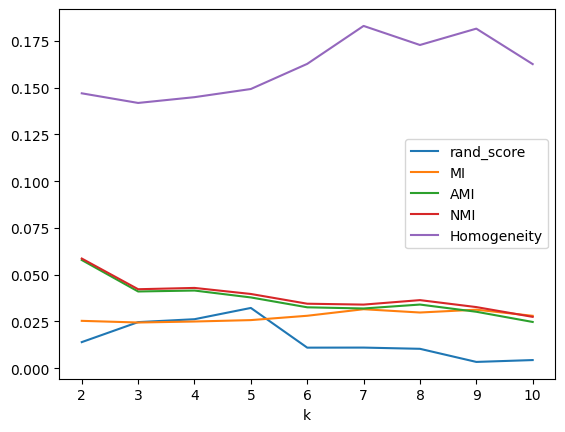

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from collections import defaultdict

rand_scores=defaultdict(list) #create a default dict where the default value for every key is a list
for k in range (2, 11):
  km =KMeans(n_clusters=k, n_init=100, random_state=42)
  km.fit(X)
  pred=km.labels_
  df['pred']=pred
  #sns.histplot(data=df, x='pred', hue='oscar_winners')
  rand_scores['k'].append(k)
  rand_scores['rand_score'].append(metrics.adjusted_rand_score(pred,y))
  rand_scores['MI'].append(metrics.mutual_info_score(y,pred)) #mutual info score
  rand_scores['AMI'].append(metrics.adjusted_mutual_info_score(y,pred)) #adjuasted mutual info score
  rand_scores['NMI'].append(metrics.normalized_mutual_info_score(y,pred)) #normalized mutual info score
  rand_scores['Homogeneity'].append(metrics.homogeneity_score(y,pred))
result_df=pd.DataFrame(rand_scores)
result_df.plot(x='k')


From the plot we see that when we increase the number of clusters the scores dicrease.That's why these metrics try to match the actual predictions with the clusters predictions ignoring the permutations. So, maybe it is more accurate to see every metric for  a specific number of clusters. Also we do not have a clear result for the clustering

In [ ]:
df.columns

Index(['year', 'rotten_tomatoes_critics', 'metacritic_critics',
       'average_critics', 'rotten_tomatoes_audience', 'metacritic_audience',
       'rotten_tomatoes_vs_metacritic_deviance', 'average_audience',
       'audience_vs_critics_deviance', 'opening_weekend', 'domestic_gross',
       'foreign_gross', 'worldwide_gross', 'of_gross_earned_abroad',
       'budget_($million)', 'budget_recovered',
       'budget_recovered_opening_weekend', 'release_date_(us)',
       'oscar_winners', 'pred'],
      dtype='object')

###PCA and Kmeans

We try the PCA algorithm

<Axes: xlabel='comp'>

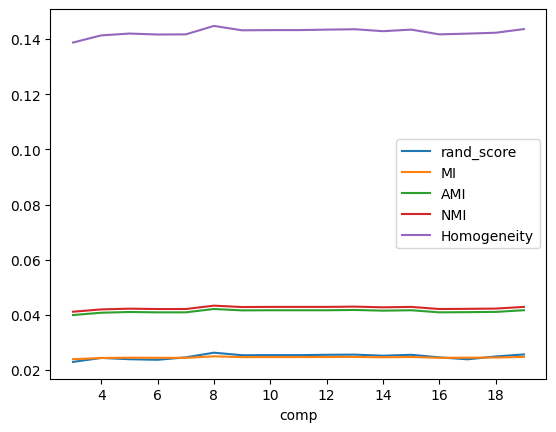

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.decomposition import PCA


scores=defaultdict(list) #create a default dict where the default value for every key is a list
for comp in range (3, 20):
  pca=PCA(n_components=comp)
  X_norm=pca.fit_transform(X)
  km =KMeans(n_clusters=3, n_init=100, random_state=42)
  km.fit(X_norm)
  pred=km.labels_
  df['pred']=pred
  #sns.histplot(data=df, x='pred', hue='oscar_winners')
  scores['comp'].append(comp)
  scores['rand_score'].append(metrics.adjusted_rand_score(pred,y))
  scores['MI'].append(metrics.mutual_info_score(y,pred)) #mutual info score
  scores['AMI'].append(metrics.adjusted_mutual_info_score(y,pred)) #adjuasted mutual info score
  scores['NMI'].append(metrics.normalized_mutual_info_score(y,pred)) #normalized mutual info score
  scores['Homogeneity'].append(metrics.homogeneity_score(y,pred))
result_df=pd.DataFrame(scores)
result_df.plot(x='comp')



From the plot we see that applying k-means with 3 cluster in the dataset with different size of features we do not have better results for clustering

<Axes: xlabel='pred', ylabel='Count'>

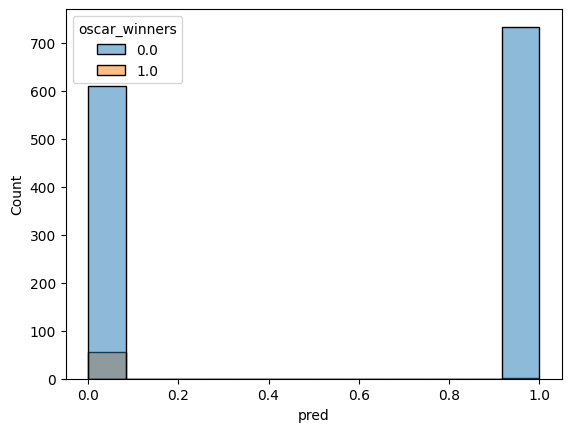

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans

km =KMeans(n_clusters=2, n_init=100, random_state=42)
km.fit(X)
pred=km.labels_
df['pred']=pred
sns.histplot(data=df, x='pred', hue='oscar_winners')

We see that in the cluster 1 belongs all the moovies, that have not received an oscar. In cluster 0 we see that there are some moovies that has won oscar and some non-oscar moovies. So ,probably with 2 clusetrs is not the ideal clustering

More specifically, in the initial dataset we have 58 moovies that have received oscar and in clusetr 0 we have cluster only the 56/58 and rest that has not received an oscar.

In [ ]:
df[pred==0]['oscar_winners'].value_counts() #56 /58 moovies right

0.0    609
1.0     56
Name: oscar_winners, dtype: int64

We see that in cluster 1 we have mostly non-oscar values

In [ ]:
df[pred==1]['oscar_winners'].value_counts()

0.0    733
1.0      2
Name: oscar_winners, dtype: int64

We try to map the results from the clusters in order to compare them with the actual value y .So cluster 1-> all non-oscar moovies,cluster 0->both (non-oscar and osacr moovies)

In [ ]:
from sklearn.metrics import classification_report
class_preds=[1 if c==0 else 0 for c in pred ]
print(classification_report(y,class_preds))

              precision    recall  f1-score   support

         0.0       1.00      0.55      0.71      1342
         1.0       0.08      0.97      0.15        58

    accuracy                           0.56      1400
   macro avg       0.54      0.76      0.43      1400
weighted avg       0.96      0.56      0.68      1400



We see that this clustering has a low accuracy.Presicion for class 0.0 is high indicating that the cluster algorithm can classify all the non-oscar moovies.Recall is lower indicating that the algorithm can not predict the class 0.0 very well. Presision for class 0.0 is low,meaning that the algorithm tries to find the non-oscar moovies,making a lot of mistakes on class 0.0.So, we see that the recall for class 0.0 is low.

We see that the algorithm makes a lot of  mistakes on cluster 1. We try to cluster(again) only the cluster 0

<Axes: xlabel='pred1', ylabel='Count'>

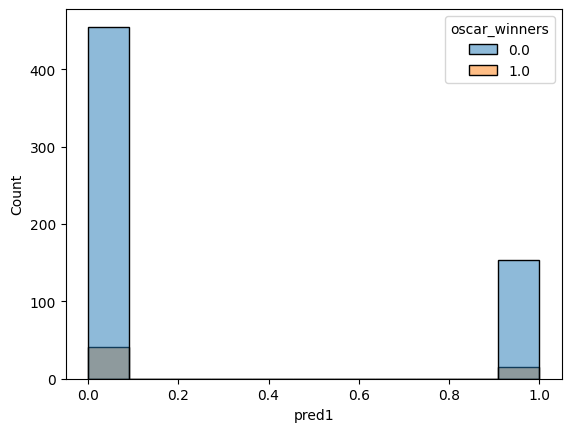

In [ ]:
X1=X[pred==0]
#X1.shape
y1=y[pred==0] #actual classes for data, where the pred==0
df1=df[df['pred']==0].copy() #make a new dataframe with data that belongs only on cluster 0
km1=KMeans(n_clusters=2, n_init=100, random_state=42)
km1.fit(X1)
pred1=km1.labels_
df1['pred1']=pred1
sns.histplot(data=df1, x='pred1', hue='oscar_winners')

We try to map the results from the clusters in order to compare them with the actual value y .So cluster 1-> all non-oscar moovies,cluster 0->both (non-oscar and osacr moovies)

In [ ]:
from operator import length_hint
class_pred1=[0 if c==1 else 1 for c in pred1 ]
length_hint(class_pred1)

665

We try to make a hierarchical clustering
Size of initial data 1400. -->
1rst layer:Kmean(2 clusters).Cluster_0:oscar and non_oscar ,
Cluster_1: mostly non-oscar -->2nd layer:
Kmean(2 clusters) on cluster_0 only. cluster0_0: oscar nad non-oscar, cluster 0_1: non-oscar







In [ ]:
#try to concat pred1 with initial pred
pred_final =np.array([False if c!=0 else 5 for c in pred])#if we are in cluster 1,False , else 5(not True because it interprents it as 1,whicj in this case is wrong )

pred_final[pred_final==5] = class_pred1
print(classification_report(y,pred_final))


              precision    recall  f1-score   support

         0.0       0.98      0.66      0.79      1342
         1.0       0.08      0.71      0.15        58

    accuracy                           0.66      1400
   macro avg       0.53      0.68      0.47      1400
weighted avg       0.94      0.66      0.76      1400



From the classification report we see that we have a better model with higher accuracy

For these clusters we  try to find the correlation with other features

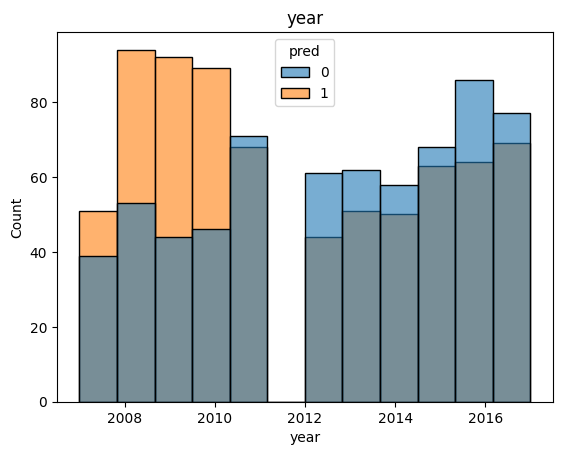

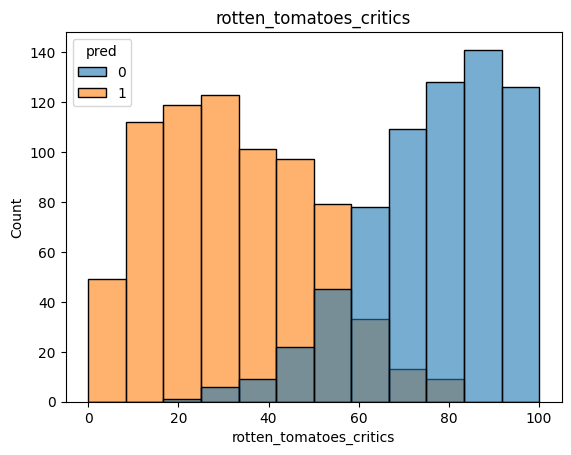

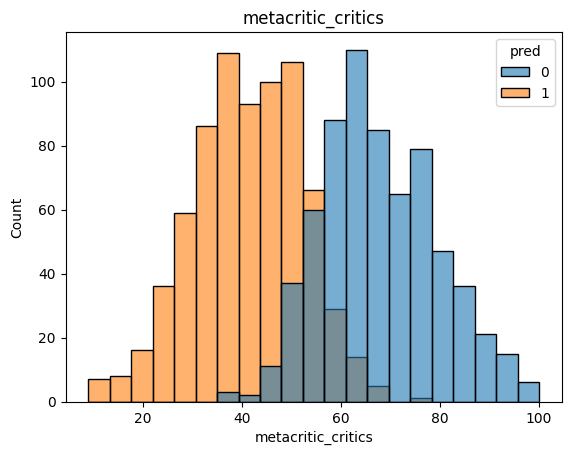

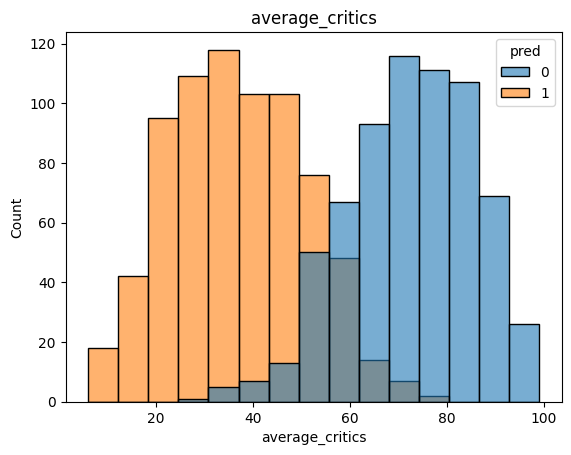

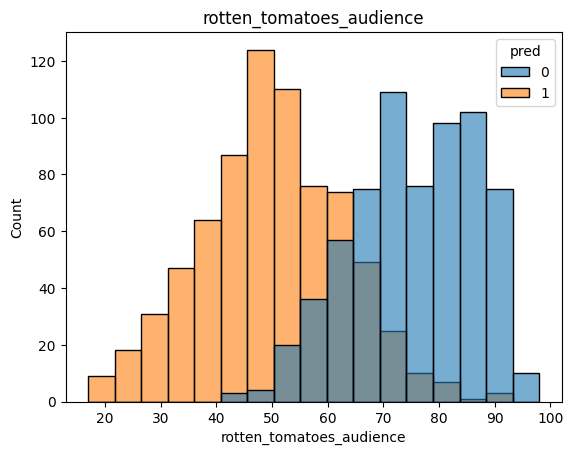

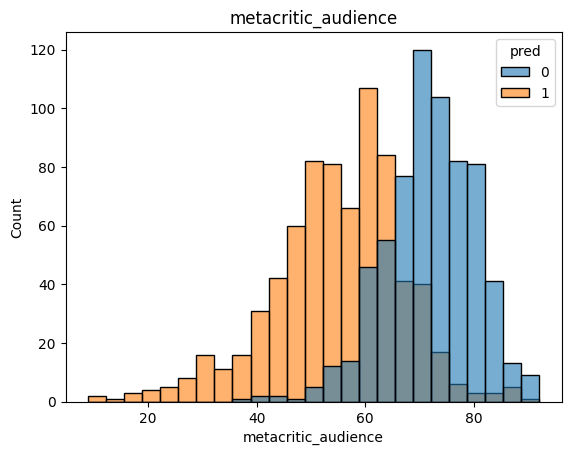

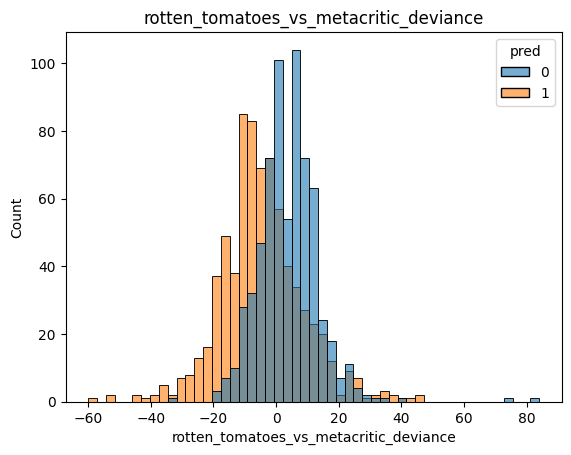

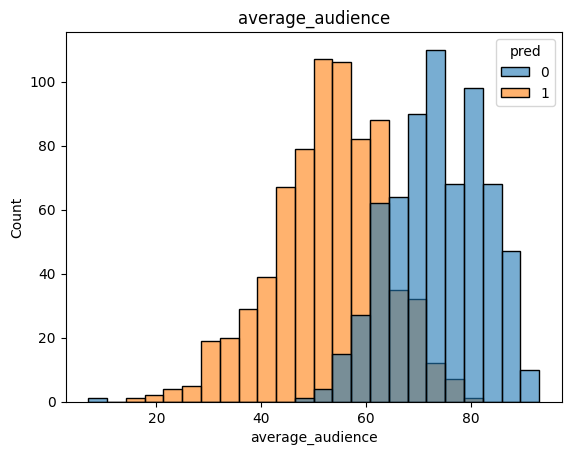

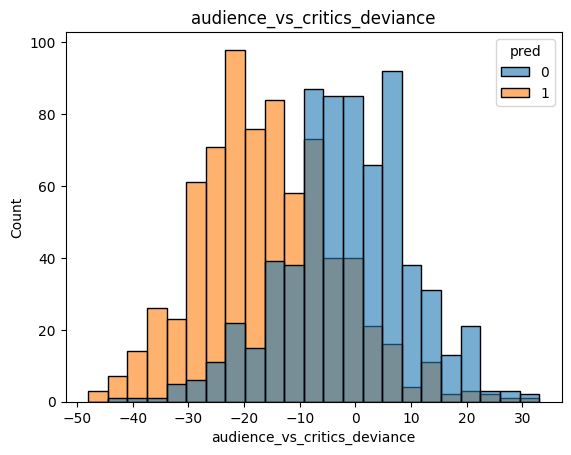

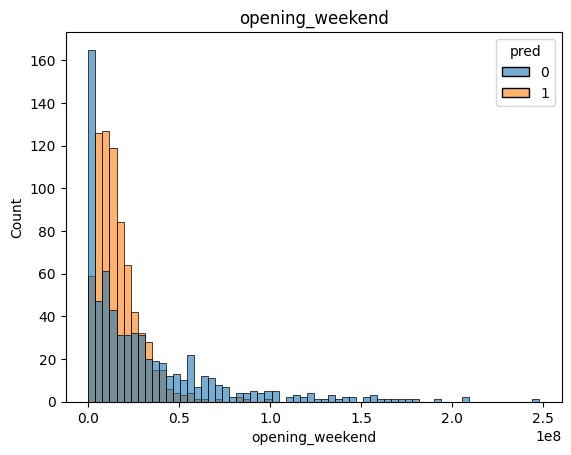

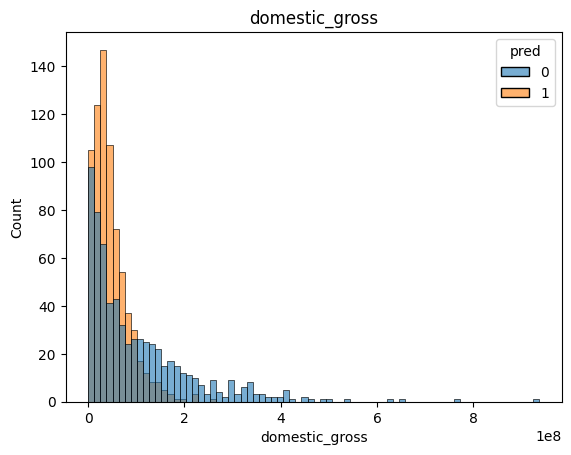

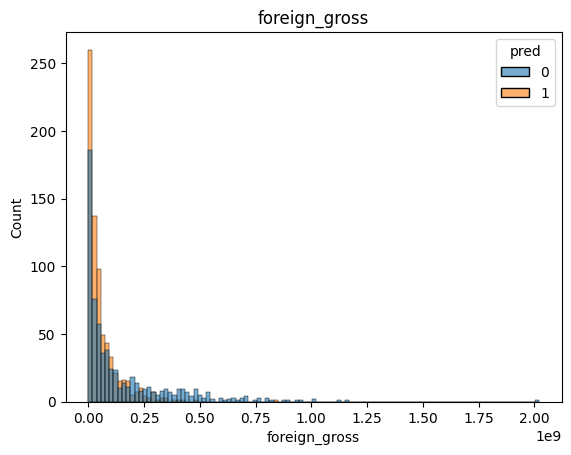

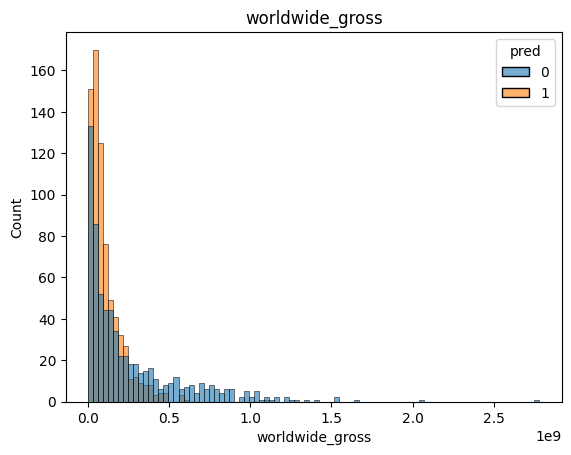

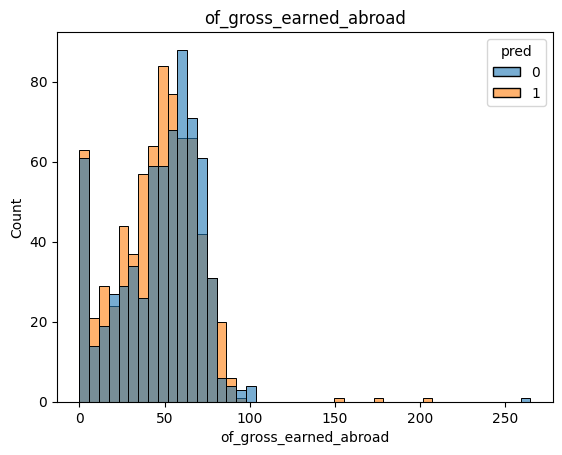

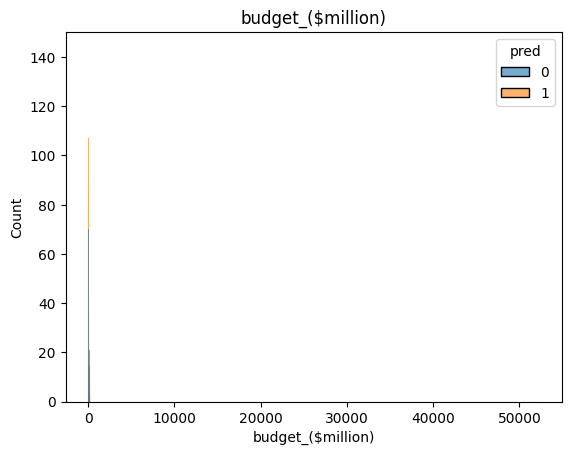

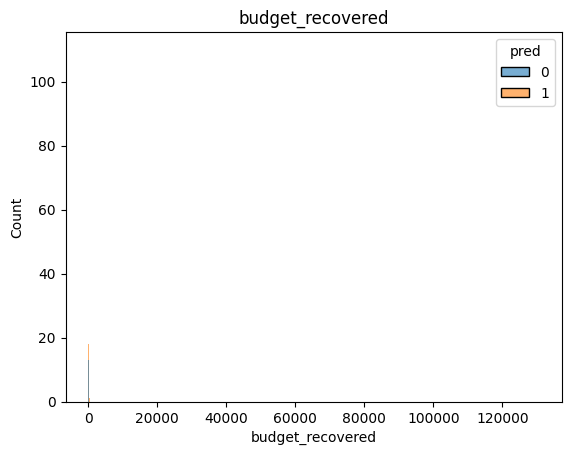

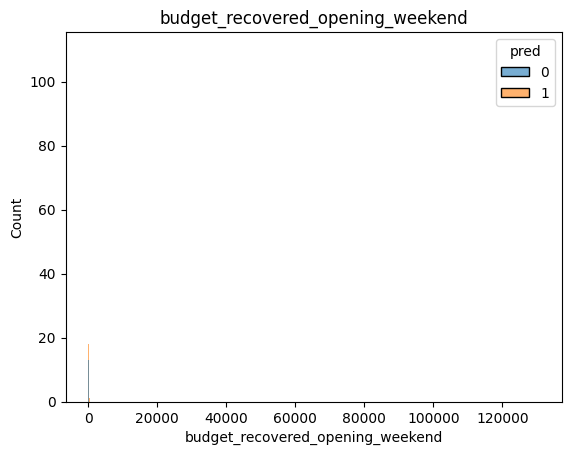

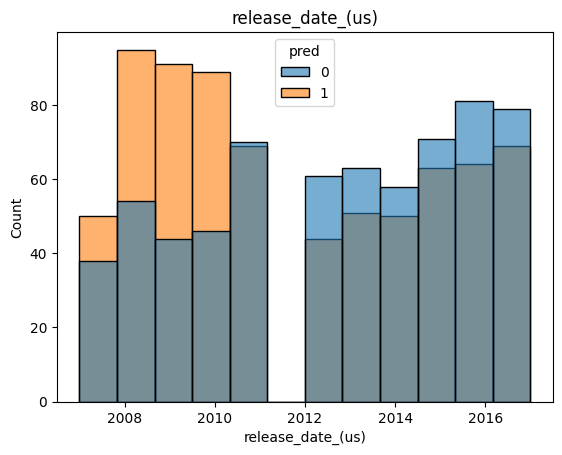

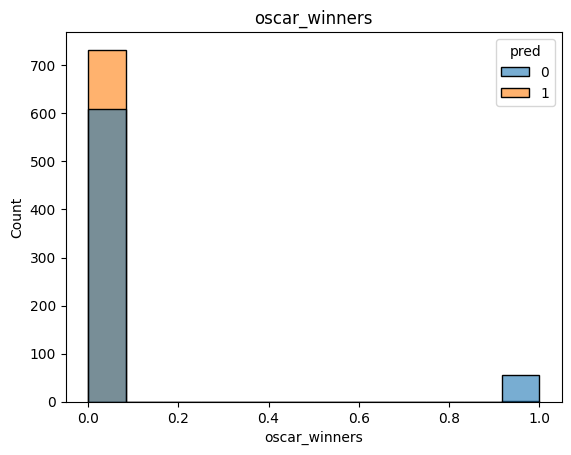

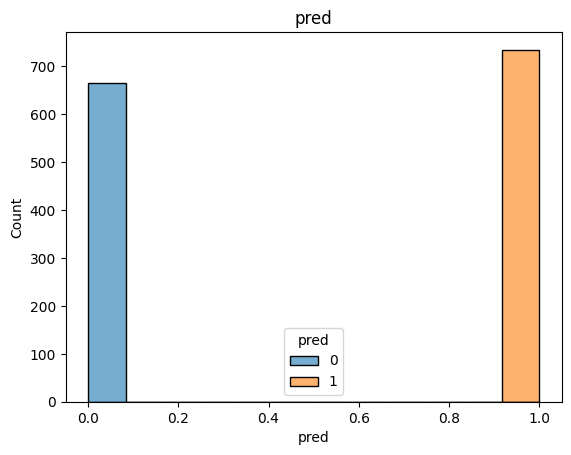

In [ ]:
for col in df.columns:
  sns.histplot(data=df, x=col, hue=df['pred'], alpha=0.6, palette='tab10')
  plt.title(col)
  plt.show()

From the histplots we can see that moovies with no oscars have high rotten_tomatos_critics,metacritic critics,average critics,rotten_tomatoes_audience,metacritic_audience,average_audience,audience_vs_critic_deviance. Moovies with oscar have lower scores for these features.

### Kmeans and gridsearch

We try to improve kmean clustering performance

In [ ]:
from sklearn.metrics import adjusted_rand_score,adjusted_mutual_info_score,mutual_info_score,homogeneity_score,normalized_mutual_info_score,fowlkes_mallows_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

param_grid={
    'kmeans__n_clusters':[2,3,4,5],
    'kmeans__init':['k-means++','random'],
    'kmeans__n_init':[100],
    'kmeans__max_iter':[500]
}
scoring={
    'rand_score':make_scorer(adjusted_rand_score),
    'adjusted_mutual_info_score':make_scorer(adjusted_mutual_info_score),
    'fowlkes_mallows':make_scorer(fowlkes_mallows_score),
    'mutual_info_score':make_scorer(mutual_info_score),
    'homogeneity_score':make_scorer(homogeneity_score),
    'normalized_mutual_score':make_scorer(normalized_mutual_info_score)
}
pipeline=Pipeline([('scaler', StandardScaler()), ('kmeans',KMeans())])
grid_search=GridSearchCV(pipeline, param_grid, scoring=scoring,refit='rand_score',cv=5)
grid_search.fit(X,y)
print('Best Parameters for kmean',grid_search.best_params_)


Best Parameters for kmean {'kmeans__init': 'random', 'kmeans__max_iter': 500, 'kmeans__n_clusters': 4, 'kmeans__n_init': 100}


We see that the grid search algorithm gives as best parameters {'kmeans__init': 'random', 'kmeans__max_iter': 500, 'kmeans__n_clusters': 4, 'kmeans__n_init': 100}. So we make a kmean algorithm to evaluate again the clustering

<Axes: xlabel='pred', ylabel='Count'>

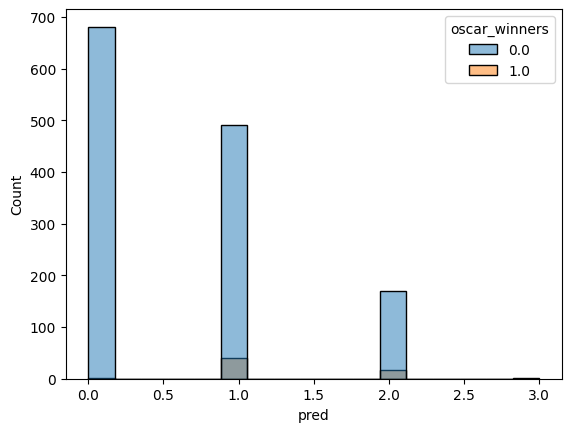

In [ ]:
km =KMeans(n_clusters=4, n_init=100, random_state=42,max_iter=500)
km.fit(X)
pred=km.labels_
df['pred']=pred
sns.histplot(data=df, x='pred', hue='oscar_winners')

Try to map the clusters with the actual values of column oscar_winners

In [ ]:
pred=[1 if (c==1 or c==2 or c==3) else 0 for c in pred ]
print(classification_report(y,pred))

              precision    recall  f1-score   support

         0.0       1.00      0.51      0.67      1342
         1.0       0.08      0.98      0.15        58

    accuracy                           0.53      1400
   macro avg       0.54      0.75      0.41      1400
weighted avg       0.96      0.53      0.65      1400



From the classification report we see that we don't get better results for clustering

## HCA

###Evaluate HCA

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


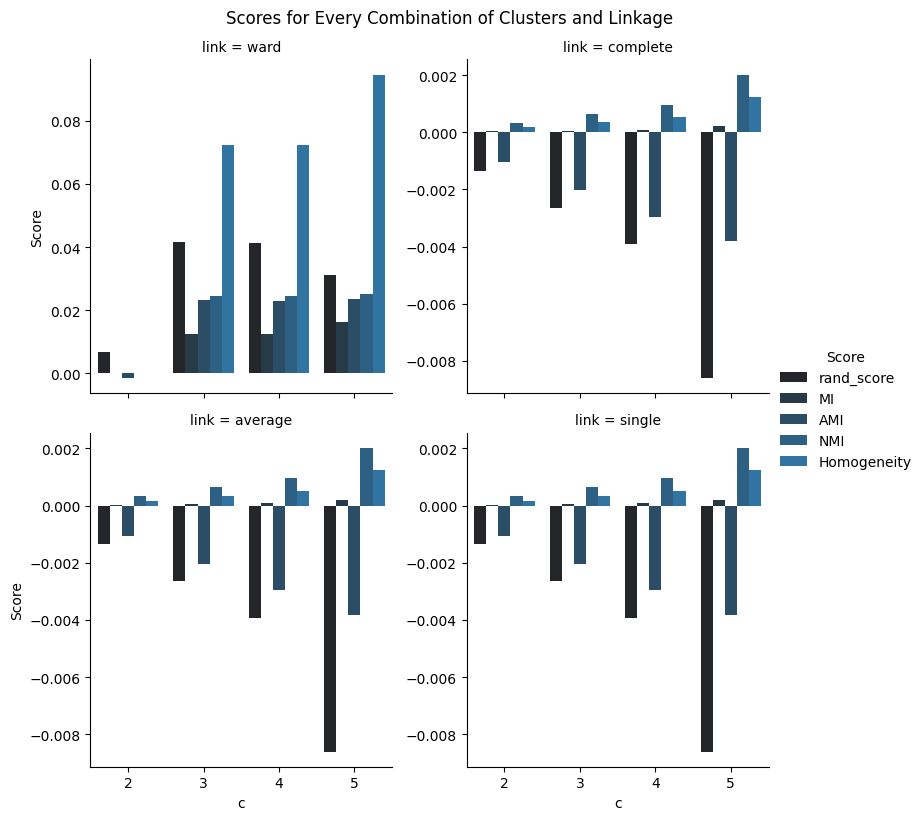

In [511]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score,adjusted_mutual_info_score,mutual_info_score,homogeneity_score,normalized_mutual_info_score
from sklearn import metrics
from collections import defaultdict


scores = defaultdict(list)  # create a default dict where the default value for every key is a list
n_clusters = [2, 3, 4, 5]
linkage = ['ward', 'complete', 'average', 'single']

for c in n_clusters:
    for link in linkage:
        aggl = AgglomerativeClustering(n_clusters=c, linkage=link)
        aggl.fit(X)
        pred = aggl.labels_
        df['pred'] = pred
        scores['c'].append(c)
        scores['link'].append(link)
        scores['rand_score'].append(metrics.adjusted_rand_score(pred, y))
        scores['MI'].append(metrics.mutual_info_score(y, pred))
        scores['AMI'].append(metrics.adjusted_mutual_info_score(y, pred))
        scores['NMI'].append(metrics.normalized_mutual_info_score(y, pred))
        scores['Homogeneity'].append(metrics.homogeneity_score(y, pred))

result_df = pd.DataFrame(scores)

#remake the DataFrame to have a single 'value' column for different scores
result_df1 = pd.melt(result_df, id_vars=['c', 'link'], value_vars=['rand_score', 'MI', 'AMI', 'NMI', 'Homogeneity'], var_name='score')

#plotting facet grid
g = sns.FacetGrid(result_df1, col='link', height=4, col_wrap=2, sharey=False)
g.map(sns.barplot, 'c', 'value', 'score', ci=None)
g.set_axis_labels('c', 'Score')
g.add_legend(title='Score')
plt.suptitle("Scores for Every Combination of Clusters and Linkage", y=1.02)
plt.show()



From the plot we see that the best parameters for agglomerative algorithm are n_clusters=5 and linkage='ward'. So, we make an agglomerative algorithm with these parameters to evaluate the cluster

<Axes: xlabel='pred', ylabel='Count'>

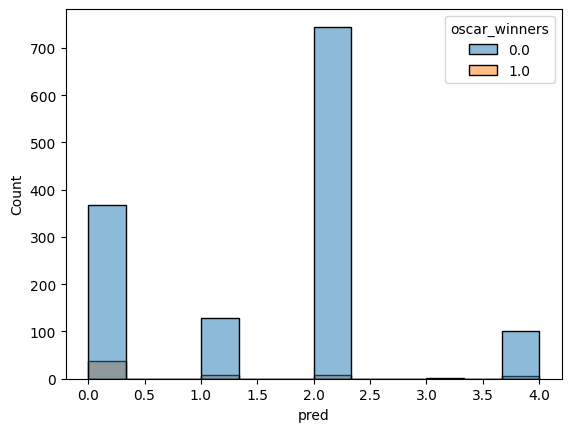

In [ ]:
aggl=AgglomerativeClustering(n_clusters=5,linkage='ward')
pred=aggl.fit_predict(X,y)
df['pred']=pred
sns.histplot(data=df, x='pred', hue='oscar_winners')

We try to map the clusters predictions with the actual labels of the data

In [ ]:
pred = [1 if c!=2 else 0 for c in pred]
print(classification_report(y, pred))

              precision    recall  f1-score   support

         0.0       0.99      0.56      0.71      1342
         1.0       0.08      0.86      0.14        58

    accuracy                           0.57      1400
   macro avg       0.53      0.71      0.43      1400
weighted avg       0.95      0.57      0.69      1400



From the classification report we see the poorness of the clustering algorithm

##DBSCAN

###Evaluate DBSCAN

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


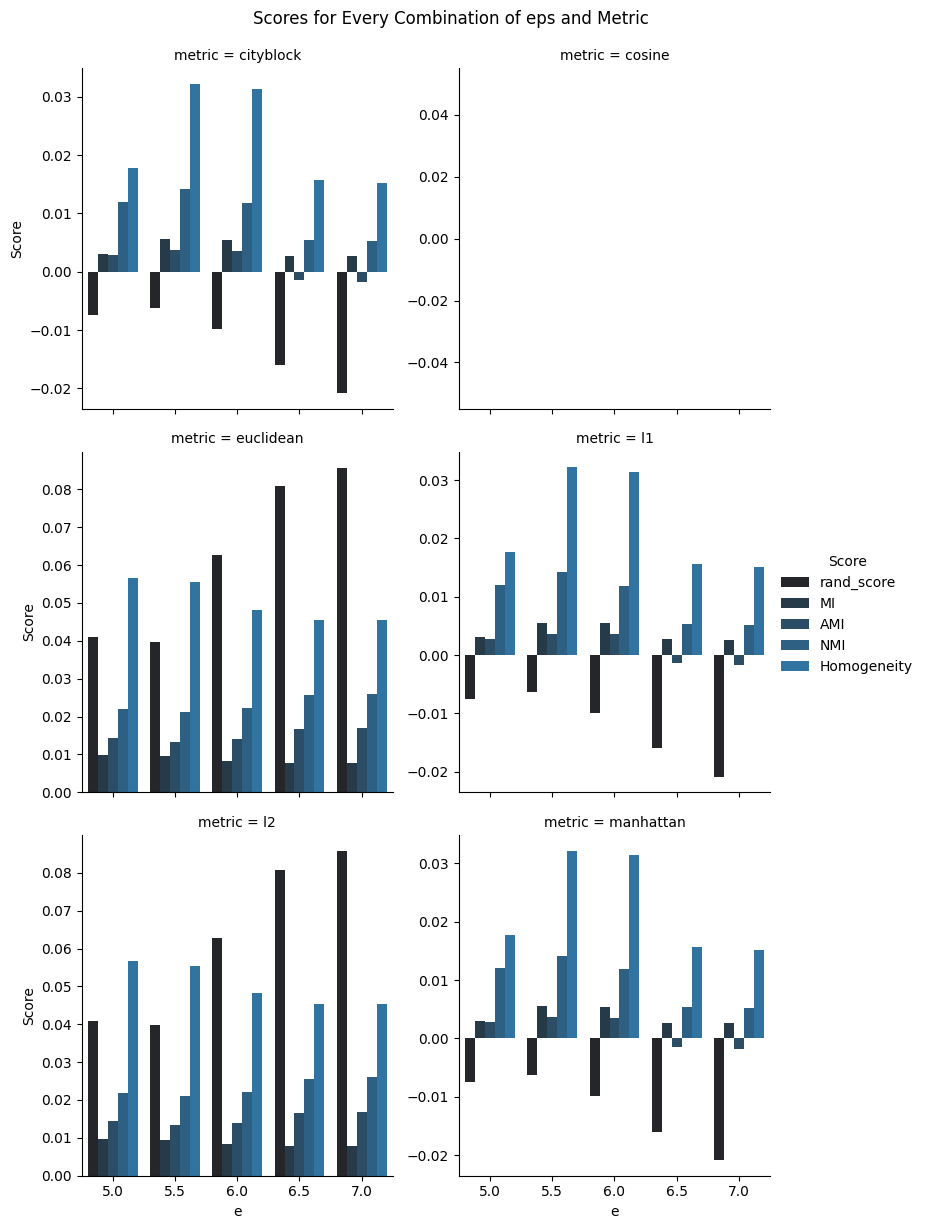

In [503]:
from sklearn.cluster import DBSCAN
from collections import defaultdict
from sklearn.metrics import adjusted_rand_score, mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score, homogeneity_score


min_samples = 5
scores = defaultdict(list)
distances = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']
eps = [5, 5.5, 6, 6.5, 7]

for e in eps:
    for d in distances:
        dbscan = DBSCAN(eps=e, min_samples=min_samples, metric=d)
        dbscan.fit(X)
        pred=dbscan.labels_
        df['pred'] = pred
        scores['e'].append(e)
        scores['metric'].append(d)
        scores['rand_score'].append(adjusted_rand_score(pred, y))
        scores['MI'].append(mutual_info_score(y, pred))
        scores['AMI'].append(adjusted_mutual_info_score(y, pred))
        scores['NMI'].append(normalized_mutual_info_score(y, pred))
        scores['Homogeneity'].append(homogeneity_score(y, pred))

result_df = pd.DataFrame(scores)

#remake the DataFrame to have a single 'value' column for different scores
result_df1 = pd.melt(result_df, id_vars=['e', 'metric'], value_vars=['rand_score', 'MI', 'AMI', 'NMI', 'Homogeneity'], var_name='score')

#Plotting facet grid
g = sns.FacetGrid(result_df1, col='metric', height=4, col_wrap=2, sharey=False)
g.map(sns.barplot, 'e', 'value', 'score', ci=None)
g.set_axis_labels('e', 'Score')
g.add_legend(title='Score')
plt.suptitle("Scores for Every Combination of eps and Metric", y=1.02)
plt.show()


We see that we have the best results for eps=7 and metric='euclidean'. So we make  a DBSCAN  with these parameters.

<Axes: xlabel='pred', ylabel='Count'>

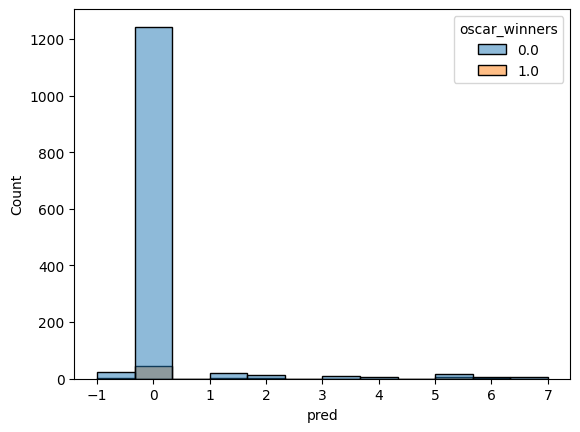

In [504]:
dbscan=DBSCAN(eps=7, min_samples=5, metric='euclidean')
dbscan.fit(X)
pred=dbscan.labels_
df['pred']=pred
sns.histplot(data=df, x='pred', hue='oscar_winners')

From the plot we see the poorness of the clustering

In [506]:
pred=[1 if (c==4 or c==6 or c==7) else 0 for c in pred ]
print(classification_report(y,pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1342
         1.0       0.00      0.00      0.00        58

    accuracy                           0.96      1400
   macro avg       0.48      0.50      0.49      1400
weighted avg       0.92      0.96      0.94      1400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here the high accuracy may affect of the high presicion and recall for class 0.

So we do the clustering using the Kmean algorithm. The result is that moovies with oscar values have lower critics and moovies without oscar values have better critics.